# Project 6: Bank Loan Case Study

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Cleaning and Manipulation of "applications_data" dataset

In [2]:
#loading dataset
app_datai = pd.read_csv(r"C:\Users\suruc\OneDrive\Desktop\application_data.csv")
app_datai.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [3]:
# Dataset properties
shape= app_datai.shape
shape

(307511, 122)

- Number of rows= 307511
- Number of columns= 122

In [4]:
# Calculating column-wise null percentage
null_values = (app_datai.isnull().sum()/shape[0])*100
null_pcnt = dict(null_values)
null_pcnt

{'SK_ID_CURR': 0.0,
 'TARGET': 0.0,
 'NAME_CONTRACT_TYPE': 0.0,
 'CODE_GENDER': 0.0,
 'FLAG_OWN_CAR': 0.0,
 'FLAG_OWN_REALTY': 0.0,
 'CNT_CHILDREN': 0.0,
 'AMT_INCOME_TOTAL': 0.0,
 'AMT_CREDIT': 0.0,
 'AMT_ANNUITY': 0.003902299429939092,
 'AMT_GOODS_PRICE': 0.09040327012692229,
 'NAME_TYPE_SUITE': 0.42014757195677555,
 'NAME_INCOME_TYPE': 0.0,
 'NAME_EDUCATION_TYPE': 0.0,
 'NAME_FAMILY_STATUS': 0.0,
 'NAME_HOUSING_TYPE': 0.0,
 'REGION_POPULATION_RELATIVE': 0.0,
 'DAYS_BIRTH': 0.0,
 'DAYS_EMPLOYED': 0.0,
 'DAYS_REGISTRATION': 0.0,
 'DAYS_ID_PUBLISH': 0.0,
 'OWN_CAR_AGE': 65.9908100848425,
 'FLAG_MOBIL': 0.0,
 'FLAG_EMP_PHONE': 0.0,
 'FLAG_WORK_PHONE': 0.0,
 'FLAG_CONT_MOBILE': 0.0,
 'FLAG_PHONE': 0.0,
 'FLAG_EMAIL': 0.0,
 'OCCUPATION_TYPE': 31.345545362604916,
 'CNT_FAM_MEMBERS': 0.0006503832383231819,
 'REGION_RATING_CLIENT': 0.0,
 'REGION_RATING_CLIENT_W_CITY': 0.0,
 'WEEKDAY_APPR_PROCESS_START': 0.0,
 'HOUR_APPR_PROCESS_START': 0.0,
 'REG_REGION_NOT_LIVE_REGION': 0.0,
 'REG_REGION_NO

In [5]:
# Identifying columns with null percentage > 50%
null_cols_50 = {cols: null for cols, null in null_pcnt.items() if null >= 50}
print('Number of columns with and more than 50% null values :', len(null_cols_50))
null_cols_50

Number of columns with and more than 50% null values : 41


{'OWN_CAR_AGE': 65.9908100848425,
 'EXT_SOURCE_1': 56.381072546998325,
 'APARTMENTS_AVG': 50.74972927797705,
 'BASEMENTAREA_AVG': 58.51595552679416,
 'YEARS_BUILD_AVG': 66.49778381911543,
 'COMMONAREA_AVG': 69.87229725115525,
 'ELEVATORS_AVG': 53.29597965601231,
 'ENTRANCES_AVG': 50.3487680115508,
 'FLOORSMIN_AVG': 67.84862980511267,
 'LANDAREA_AVG': 59.376737742714894,
 'LIVINGAPARTMENTS_AVG': 68.35495315614726,
 'LIVINGAREA_AVG': 50.193326417591564,
 'NONLIVINGAPARTMENTS_AVG': 69.43296337366793,
 'NONLIVINGAREA_AVG': 55.17916432257708,
 'APARTMENTS_MODE': 50.74972927797705,
 'BASEMENTAREA_MODE': 58.51595552679416,
 'YEARS_BUILD_MODE': 66.49778381911543,
 'COMMONAREA_MODE': 69.87229725115525,
 'ELEVATORS_MODE': 53.29597965601231,
 'ENTRANCES_MODE': 50.3487680115508,
 'FLOORSMIN_MODE': 67.84862980511267,
 'LANDAREA_MODE': 59.376737742714894,
 'LIVINGAPARTMENTS_MODE': 68.35495315614726,
 'LIVINGAREA_MODE': 50.193326417591564,
 'NONLIVINGAPARTMENTS_MODE': 69.43296337366793,
 'NONLIVINGAR

- Since more than half of these datapoints are missing, imputing them may result in bias and errors in analysis so it's better to drop these columns.

In [6]:
# Dropping columns with null percent >50%
app_dataf = app_datai.drop(columns = null_cols_50)
app_dataf.shape

(307511, 81)

- There are still a lot of columns with high null percentage so we need to identify the relation of the these columns to the 'TARGET' column and see if they are worth keeping for the analysis, or if we can simply drop them.

In [7]:
# Identifying columns with null percent > 10%
null_cols_10 = {cols: null for cols, null in null_pcnt.items() if null >= 10 and null < 50} 
null_cols_10

{'OCCUPATION_TYPE': 31.345545362604916,
 'EXT_SOURCE_3': 19.825307062186393,
 'YEARS_BEGINEXPLUATATION_AVG': 48.781019215572776,
 'FLOORSMAX_AVG': 49.76082156410665,
 'YEARS_BEGINEXPLUATATION_MODE': 48.781019215572776,
 'FLOORSMAX_MODE': 49.76082156410665,
 'YEARS_BEGINEXPLUATATION_MEDI': 48.781019215572776,
 'FLOORSMAX_MEDI': 49.76082156410665,
 'TOTALAREA_MODE': 48.26851722377411,
 'EMERGENCYSTATE_MODE': 47.39830445089769,
 'AMT_REQ_CREDIT_BUREAU_HOUR': 13.501630835970097,
 'AMT_REQ_CREDIT_BUREAU_DAY': 13.501630835970097,
 'AMT_REQ_CREDIT_BUREAU_WEEK': 13.501630835970097,
 'AMT_REQ_CREDIT_BUREAU_MON': 13.501630835970097,
 'AMT_REQ_CREDIT_BUREAU_QRT': 13.501630835970097,
 'AMT_REQ_CREDIT_BUREAU_YEAR': 13.501630835970097}

- Now that we have all the major null columns, we can check their relationship with the 'Target'.
- Since the 'OCCUPATION_TYPE' tells what is the occupation of the client which can affect their ability to repay loans, we will keep that column.
- Next we need to check if and how 'EXT_SOURCE' columns are related to the 'TARGET'.

In [8]:
# Identifying all the EXT_SOURCE columns
EXT_cols = app_dataf.filter(regex = r'EXT')
EXT_cols

EXT_SOURCE_2  EXT_SOURCE_3
0           0.262949      0.139376
1           0.622246           NaN
2           0.555912      0.729567
3           0.650442           NaN
4           0.322738           NaN
...              ...           ...
307506      0.681632           NaN
307507      0.115992           NaN
307508      0.535722      0.218859
307509      0.514163      0.661024
307510      0.708569      0.113922

[307511 rows x 2 columns]

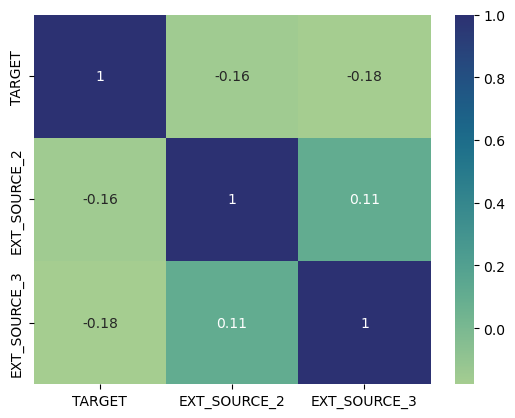

In [9]:
# Identifying the correlation between the EXT_SOURCE and TARGET
sns.heatmap(app_dataf[['TARGET','EXT_SOURCE_2','EXT_SOURCE_3']].corr(), annot= True, cmap = 'crest')
plt.show()

- We know that as the correlation coeffecient approaches approaches 0 the variables are said to be unrelated while strength of their correlation increases as it approaches -1 or 1 and are said to be negatively or positively correlated.
- Here we can see no clear corelation between thw TARGET and EXT_SOURCES which signifies their irrelevance to our analysis, meaning we can drop these columns.

In [10]:
# Dropping EXT_SOURCE columns
app_dataf.drop(columns = EXT_cols, inplace= True)
app_dataf.shape

(307511, 79)

In [11]:
app_dataf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

- Now let's make a list of the columns that are left to be checked for relevance from the null_cols_10 columns and check for correlation with TARGET just like we did previously.

In [12]:
other_cols = [cols for cols, null in null_cols_10.items() 
              if not cols.startswith('AMT') and cols not in ['OCCUPATION_TYPE', 'EXT_SOURCE_3']]
app_dataf[other_cols] = app_dataf[other_cols].apply(lambda x:x.replace({'Yes': 1, 'No': 0}))
app_dataf[other_cols]

YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0                            0.9722         0.0833   
1                            0.9851         0.2917   
2                               NaN            NaN   
3                               NaN            NaN   
4                               NaN            NaN   
...                             ...            ...   
307506                       0.9876         0.6042   
307507                       0.9727         0.0833   
307508                       0.9816         0.1667   
307509                       0.9771         0.0417   
307510                       0.9881         0.3750   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
0                             0.9722          0.0833   
1                             0.9851          0.2917   
2                                NaN             NaN   
3                                NaN             NaN   
4                                NaN             NaN   
...                              ...             ...   
307506                        0.9782          0.4583   
307507                        0.9727          0.0833   
307508                        0.9816          0.1667   
307509                        0.9772          0.0417   
307510                        0.9881          0.3750   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
0                             0.9722          0.0833          0.0149   
1                             0.9851          0.2917          0.0714   
2                                NaN             NaN             NaN   
3                                NaN             NaN             NaN   
4                                NaN             NaN             NaN   
...                              ...             ...             ...   
307506                        0.9876          0.6042          0.2898   
307507                        0.9727          0.0833          0.0214   
307508                        0.9816          0.1667          0.7970   
307509                        0.9771          0.0417          0.0086   
307510                        0.9881          0.3750          0.0718   

        EMERGENCYSTATE_MODE  
0                       0.0  
1                       0.0  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
307506                  0.0  
307507                  0.0  
307508                  0.0  
307509                  0.0  
307510                  0.0  

[307511 rows x 8 columns]

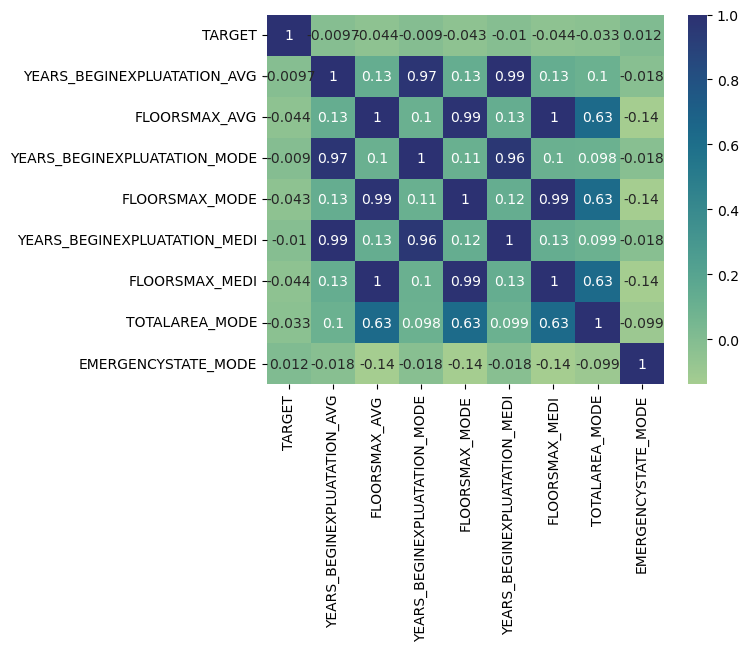

In [13]:
# Visualising correlation between columns
sns.heatmap(app_dataf[['TARGET'] + other_cols].corr(), annot= True, cmap = 'crest')
plt.show()

- We can see that a lot of the columns are correlated to each other by shades of green but none of the columns seem to be even close to correlation with TARGET which means they too are irrelevant for our analysis and can be dropped.

In [14]:
# Dropping irrelevant columns
app_dataf = app_dataf.drop(columns = other_cols)
app_dataf.shape

(307511, 71)

In [15]:
app_dataf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

- We can see a lot of FLAG columns in the dataset with values Y, N and 1, 0 which represents Y(Yes) and N(No) respectively.
- So we can make the data uniform by replacing the 1s and 0s with Ys and Ns and check how they are related to TARGET by making a list of all the FLAG columns

In [16]:
flag_cols = [cols for cols in app_dataf.columns if cols.startswith('FLAG')]
flag_df = app_dataf[flag_cols].apply(lambda y:y.replace({1: 'Y', 0: 'N'}))
flag_df.head()

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0            N               Y          Y              Y               N   
1            N               N          Y              Y               N   
2            Y               Y          Y              Y               Y   
3            N               Y          Y              Y               N   
4            N               Y          Y              Y               N   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  \
0                Y          Y          N               N               Y   
1                Y          Y          N               N               Y   
2                Y          Y          N               N               N   
3                Y          N          N               N               Y   
4                Y          N          N               N               N   

  FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7  \
0               N               N               N               N   
1               N               N               N               N   
2               N               N               N               N   
3               N               N               N               N   
4               N               N               N               N   

  FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11  \
0               N               N                N                N   
1               N               N                N                N   
2               N               N                N                N   
3               N               N                N                N   
4               Y               N                N                N   

  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  
0                N                N  
1                N                N  
2                N                N  
3                N                N  
4                N                N

- The TARGET column has 1 and 0 values which represent client with oayment difficulties i.e. Defaulters and Non-Defaulters repectively.
- Let's change the datapoints into categories for better understanding.
- Now we need to visualize the relationship between the TARGET and all the FLAG columns.

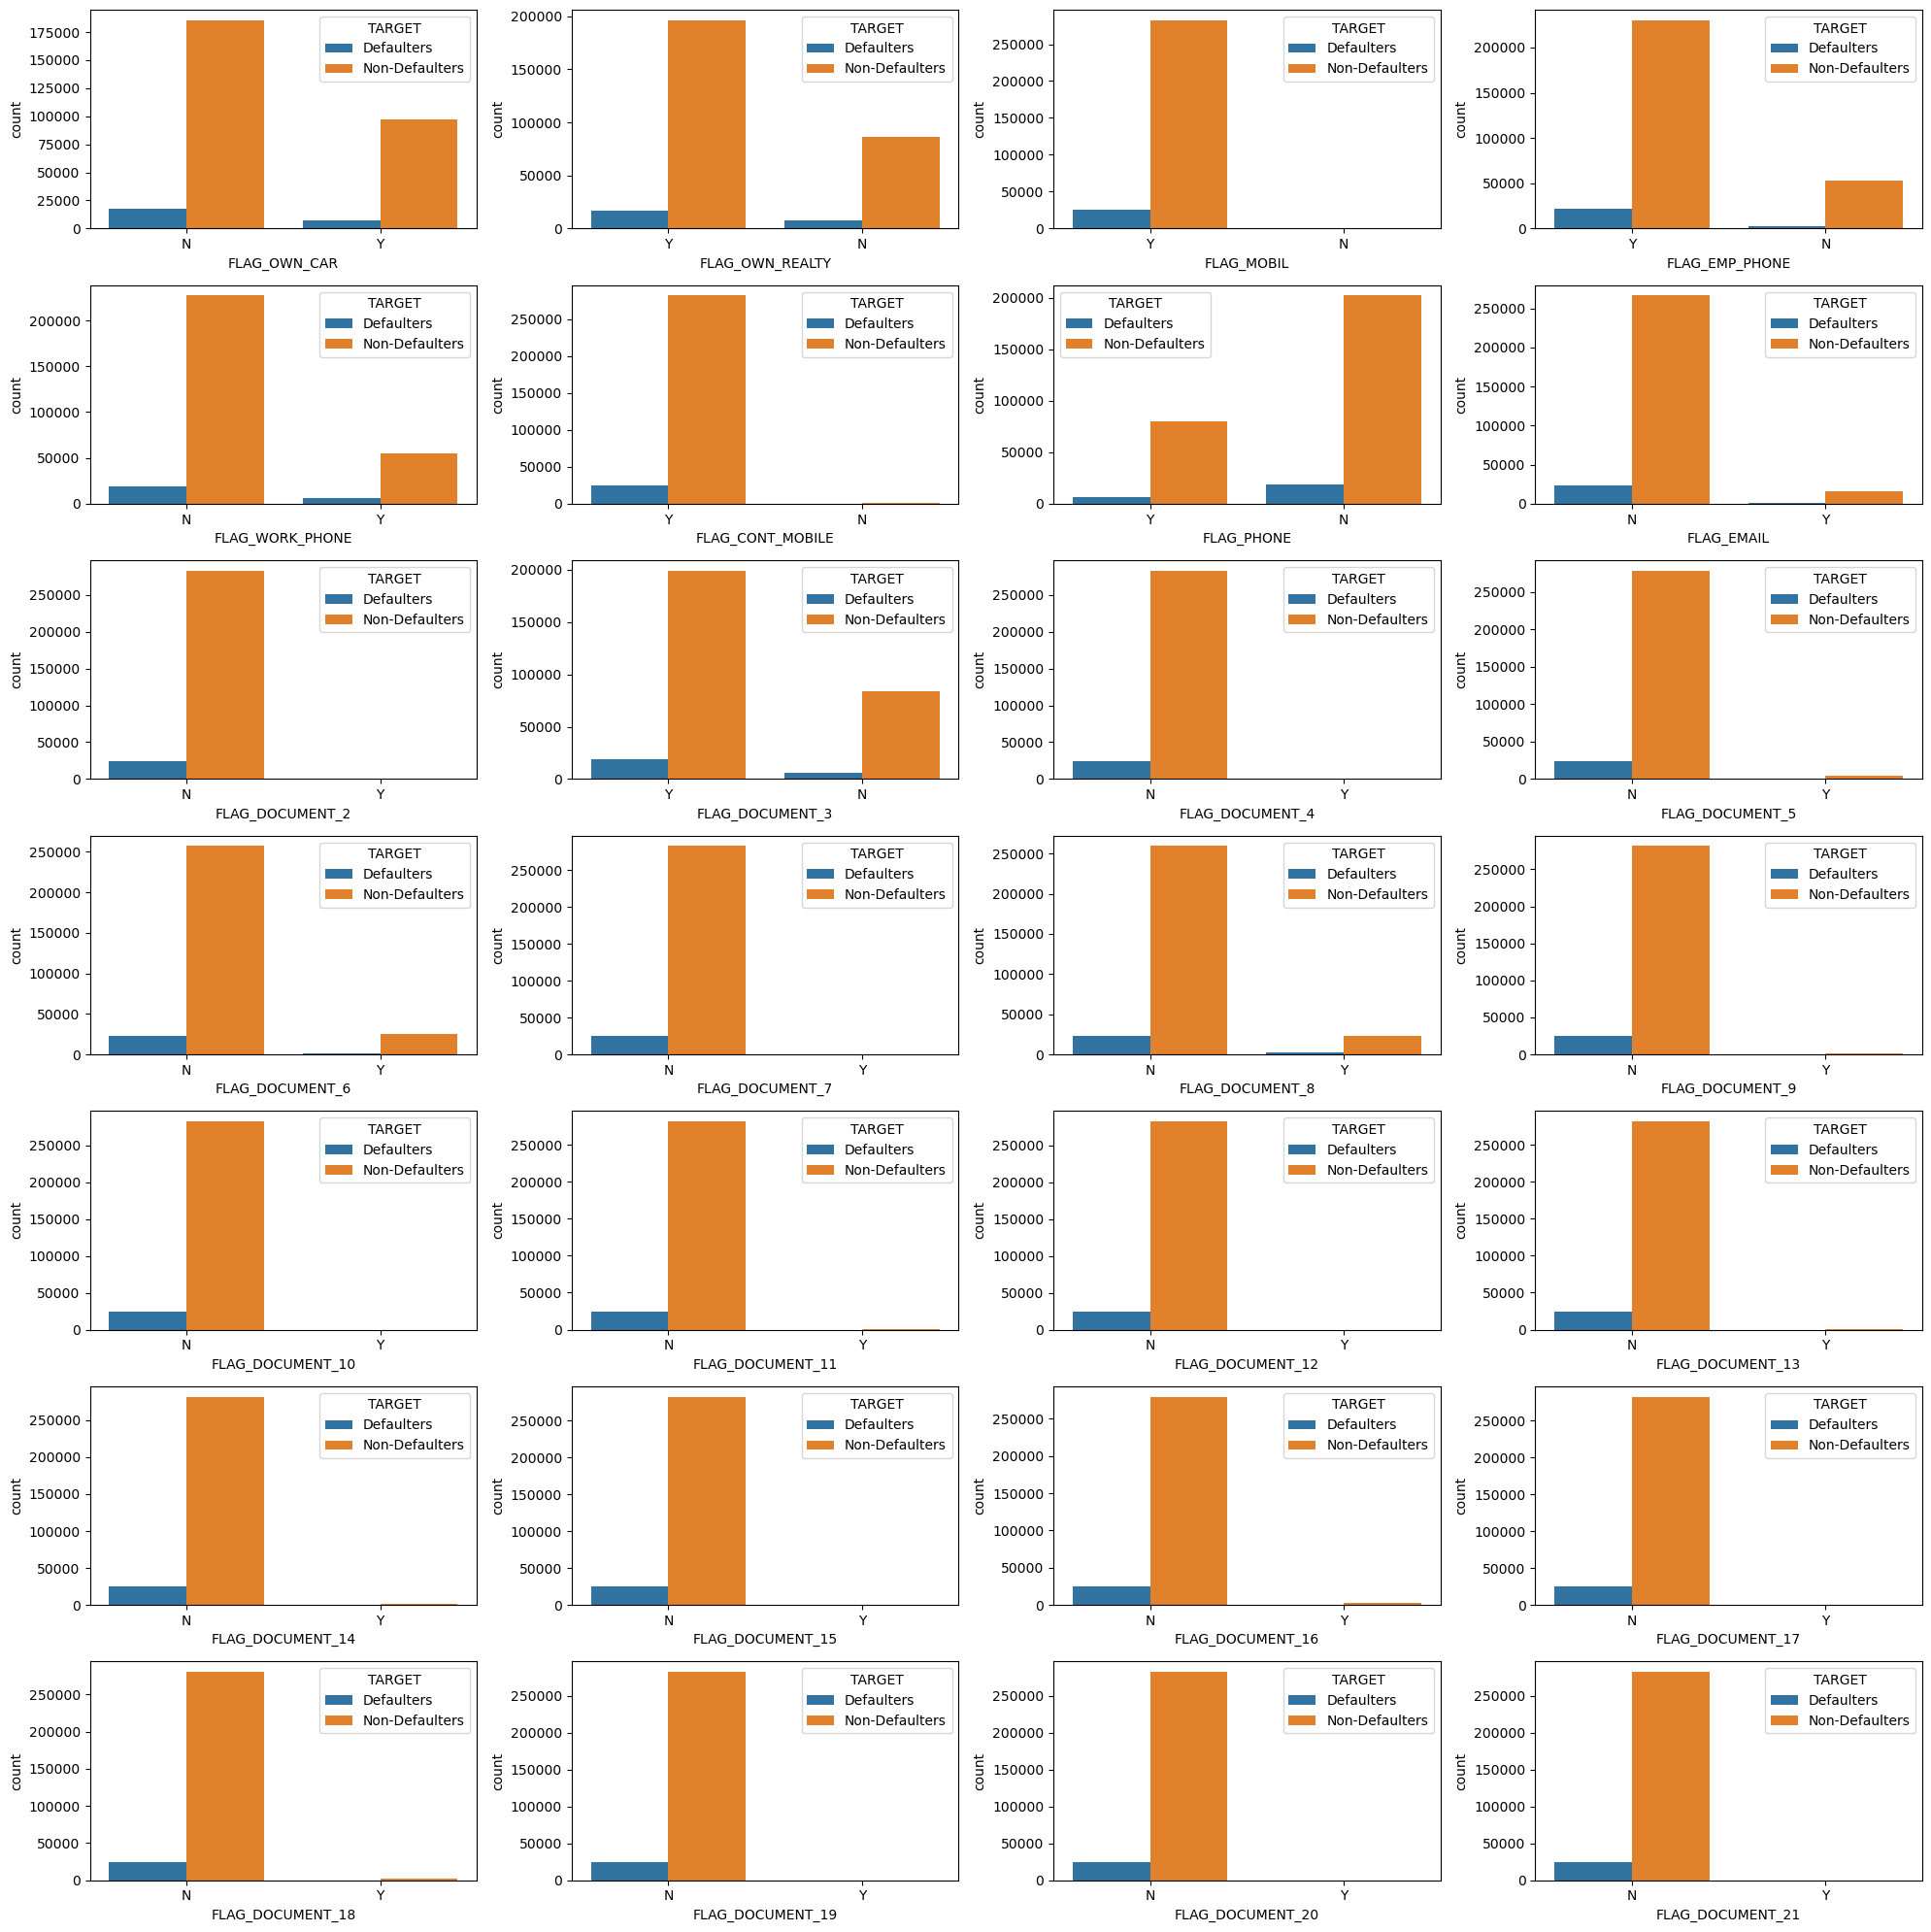

In [17]:
# Visualizing the relationship between TARGET and FLAG columns by plotting countplots
plt.figure(figsize = (20,20))
for i, col in enumerate(flag_df.columns):
    plt.subplot(7 ,4, i+1)
    sns.countplot(app_dataf, x= flag_df[col], hue = app_dataf['TARGET'].apply(lambda x: 'Defaulters' if x==1 else 'Non-Defaulters'))
    plt.tight_layout()
plt.show()

- What we are looking for are the FLAG columns where majority of Non-Defaulters have flags (Yes) against their name, because those columns can help in identifying target clients capable of repaying loans.
- Columns like 'FLAG_OWN_REALTY','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_3' have high number of Non-Defaulters that have flagged 'Yes' which means clients with Yes(s) in these columns are more likely to be non-defaulters and hence these columns are relevant in identifying target client.
- We can drop the rest of the FLAG columns.

In [18]:
# Filtering and dropping the irrelevant FLAG columns
flag_cols= list(filter(lambda cols: cols not in ['FLAG_OWN_REALTY','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_3'], flag_cols))
app_dataf = app_dataf.drop(columns=flag_cols)
app_dataf.shape #final dimensions

(307511, 48)

In [19]:
app_dataf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       -9461           -637            -3648.0            -2120           1   
1      -16765          -1188            -1186.0             -291           1   
2      -19046           -225            -4260.0            -2531           1   
3      -19005          -3039            -9833.0            -2437           1   
4      -19932          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               1                 1        Laborers              1.0   
1               1                 1      Core staff              2.0   
2               1                 1        Laborers              1.0   
3               1                 1        Laborers              2.0   
4               1                 1      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0            

# Imputing missing values

- When it comes to imputing values in place of null values the most common approach is to use the central tendencies- Mean, Median, Mode, to fill in the missing datapoints in order to keep the data normally distributed.
- But in cases where it doesn't make sense to use any of the central measures, we may use some other value like 'Unknown', 'Missing', 0 to categorise the null values separately.

In [20]:
# Computing the total null values in each column
app_dataf.isnull().sum().sort_values(ascending  = False).head(20)

OCCUPATION_TYPE               96391
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
REGION_POPULATION_RELATIVE        0
REG_CITY_NOT_LIVE_CITY            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
dtype: int64

In [21]:
# Dealing with null values in OCCUPATION_TYPE column
app_dataf['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

- Since this column has information regarding the occupation of the client, it may have a significant effect on the client's ability to repay a loan and hence imputing a central measure like mode may cause bias in the distribution.
- Instead we will impute 'Unknown' for the null values.

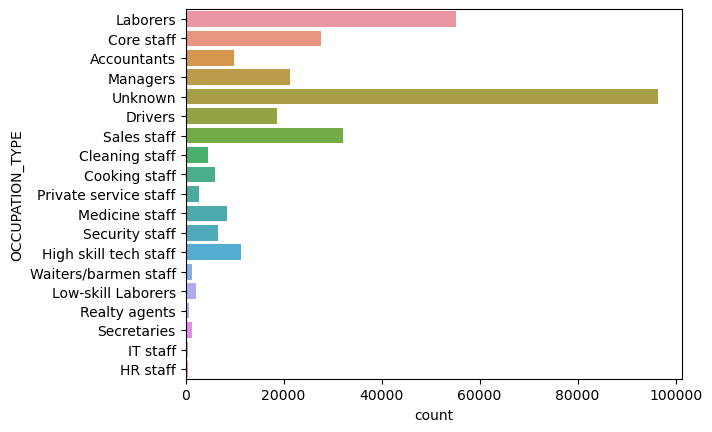

In [22]:
# Imputing null values
app_dataf['OCCUPATION_TYPE']= app_dataf['OCCUPATION_TYPE'].fillna('Unknown')
sns.countplot(app_dataf, y=app_dataf['OCCUPATION_TYPE'])
plt.show()

- There are a bunch of AMT columns with similar null values among the null columns, so it'll be more efficient to analyse those columns together so we will make a list of all the AMT columns.

In [23]:
# Listing all the AMT columns together
amt_cols= [cols for cols, null in null_cols_10.items() if cols.startswith('AMT')]
app_dataf[amt_cols].head()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0

In [24]:
# Descriptive statistics of the AMT columns
app_dataf[amt_cols].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

- The AMT columns have discrete datapoints (0,1,2 etc.) whereas their means are continuous numbers so it would make more sense to use the median of the columns for imputing the values of nulls.

In [25]:
# Imputing null values
for col in app_dataf[amt_cols]:
    app_dataf[col]= app_dataf[col].fillna(app_dataf[col].median())
app_dataf.isnull().sum().sort_values(ascending  = False).head(10)

NAME_TYPE_SUITE             1292
DEF_60_CNT_SOCIAL_CIRCLE    1021
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
AMT_GOODS_PRICE              278
AMT_ANNUITY                   12
CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
FLAG_DOCUMENT_3                0
dtype: int64

In [26]:
# Understanding the datapoints of NAME_TYPE_SUITE column
app_dataf['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

- Here as well we should not use the mode to impute the null values to avoid bias, instead we will designate the null values 'Missing'.

In [27]:
# Imputing missing values
app_dataf['NAME_TYPE_SUITE']= app_dataf['NAME_TYPE_SUITE'].fillna('Missing')
(app_dataf['NAME_TYPE_SUITE'].value_counts()/app_dataf.shape[0])*100

Unaccompanied      80.818572
Family             13.056118
Spouse, partner     3.697429
Children            1.062401
Other_B             0.575589
Missing             0.420148
Other_A             0.281616
Group of people     0.088127
Name: NAME_TYPE_SUITE, dtype: float64

- 80% of the clients were recorded to be unaccompanied during application for loan.

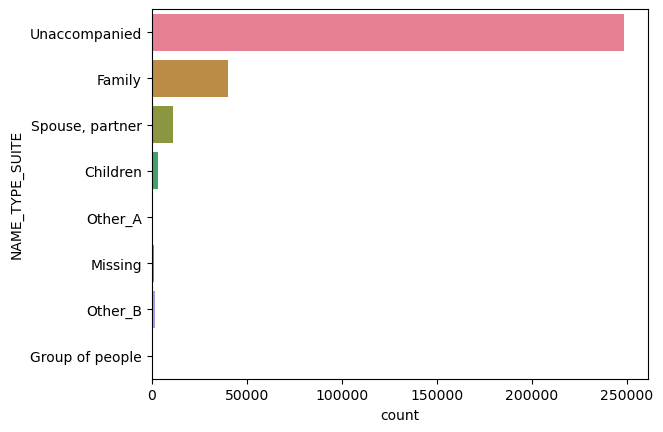

In [28]:
# Visualizing the distribution with a countplot
sns.countplot(app_dataf, y=app_dataf['NAME_TYPE_SUITE'], palette= 'husl')
plt.show()

- Most of the clients were 'Unaccompanied' during applying for a loan.

In [29]:
app_dataf.isnull().sum().sort_values(ascending  = False).head(10)

OBS_60_CNT_SOCIAL_CIRCLE    1021
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
AMT_GOODS_PRICE              278
AMT_ANNUITY                   12
CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
FLAG_DOCUMENT_3                0
REG_CITY_NOT_WORK_CITY         0
dtype: int64

In [30]:
# Understanding the AMT_GOODS_PRICE column
app_dataf['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

- There is a large difference between the middle point (median) and the maximum datapoint which doesn't make sense since the difference between median and the 75th percentile is much lesser. This implies an non-uniform distribution of the data.
- Plotting a distribution graph can help visualize better.

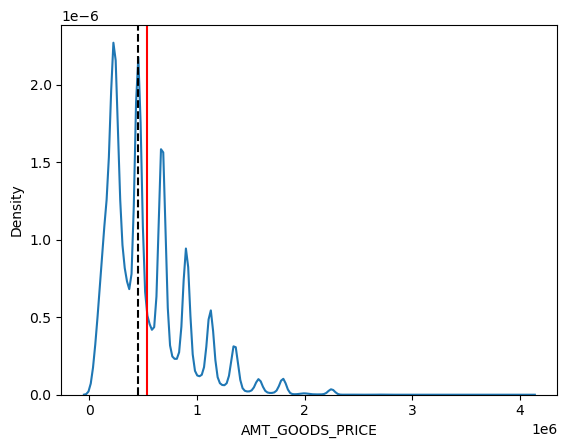

In [31]:
# Visualizing the distribution with a kdeplot
sns.kdeplot(app_dataf['AMT_GOODS_PRICE'])
plt.axvline(app_dataf['AMT_GOODS_PRICE'].mean(), color= 'r') # Mean
plt.axvline(app_dataf['AMT_GOODS_PRICE'].median(), color= 'black', linestyle='--') # Median
plt.show()

- We can see that the data is right skewed which implies that the mean will be higher than the median as we can visualize on the graph as well where mean is the red line and median is the dotted black line.
- This means that it will be safer to impute the median in place of the null values instead of mean.

In [32]:
# Imputing the null values
app_dataf['AMT_GOODS_PRICE']= app_dataf['AMT_GOODS_PRICE'].fillna(app_dataf['AMT_GOODS_PRICE'].median())
app_dataf['AMT_GOODS_PRICE'].isnull().sum()

0

In [33]:
# Undertanding the AMT_ANNUITY column
app_dataf['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

- The max datapoint is quite larger than the median and 75th percentile of the data, which implies that the data is not normally distributed
- Let's visualise the distribution for better understanding

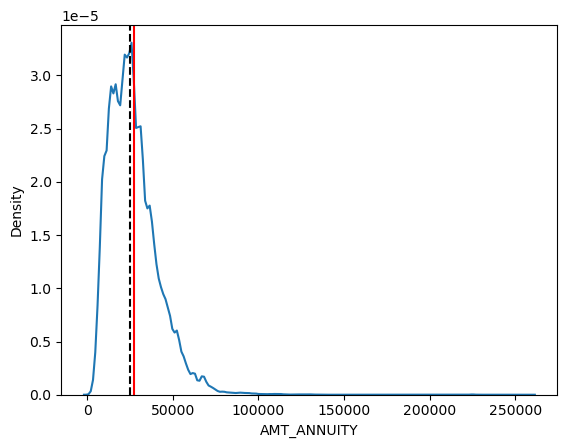

In [34]:
# Visualizing the distribution with a kdeplot
sns.kdeplot(app_dataf['AMT_ANNUITY'])
plt.axvline(app_dataf['AMT_ANNUITY'].mean(), color= 'r')
plt.axvline(app_dataf['AMT_ANNUITY'].median(), color= 'black', linestyle='--')
plt.show()

- Although the data is a bit skewed to the right, the mean and median seems very close so we can go with the mean here for imputing in place of the null values.

In [35]:
# Imputing the null values
app_dataf['AMT_ANNUITY']= app_dataf['AMT_ANNUITY'].fillna(app_dataf['AMT_ANNUITY'].mean())
app_dataf['AMT_ANNUITY'].isnull().sum()

0

In [36]:
# Understanding the CNT_FAM_MEMBERS column
app_dataf['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

- This column also has discrete datapoints so we can't use the mean to impute the null values
- Although the differnce between the max and median is quite large compared to that of min and median (although it should be same), the median is closer to the 75th percentile of the data, which implies that the max datapoint could possibly be an outlier, hence we can go with median for imputing null values

In [37]:
# Imputing null values
app_dataf['CNT_FAM_MEMBERS']= app_dataf['CNT_FAM_MEMBERS'].fillna(app_dataf['CNT_FAM_MEMBERS'].median())
app_dataf['CNT_FAM_MEMBERS'].isnull().sum()

0

In [38]:
app_dataf.isnull().sum().sort_values(ascending  = False).head(10)

OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
LIVE_CITY_NOT_WORK_CITY           0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
dtype: int64

In [39]:
# Listing all the CIRCLE colmns and understanding their data
circle_cols = [cols for cols in app_dataf.columns if 'CIRCLE' in cols]
app_dataf[circle_cols].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

- All the columns seems to have similar stats- the max value appear to be way higher than the 75th percentile, so there is likely skewness in the data which can be better understood with distribution graphs.

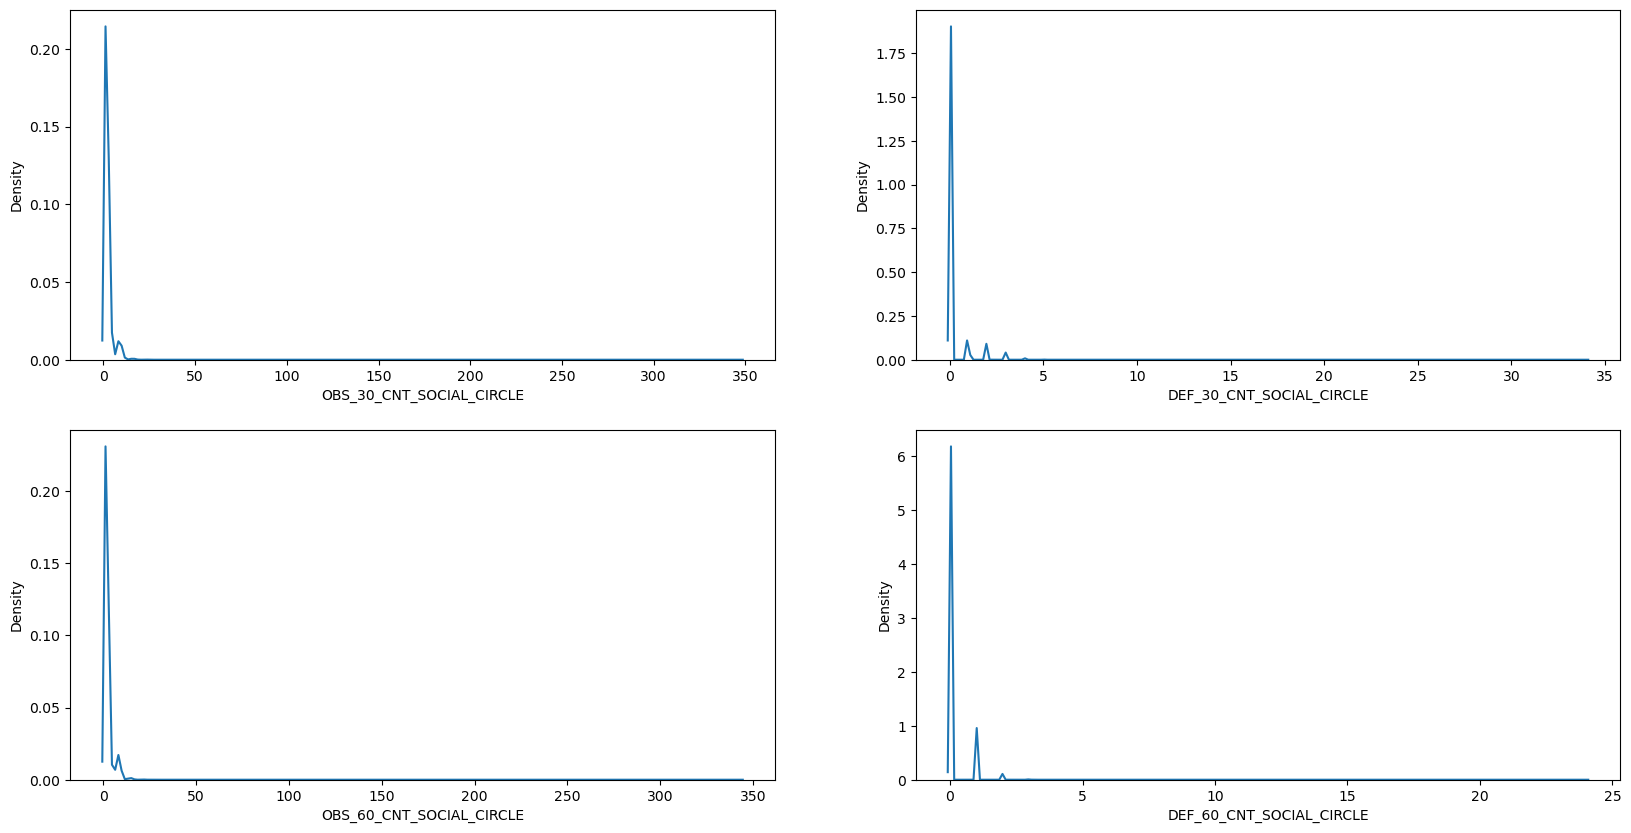

In [40]:
# Visualizing the distribution with kdeplots
plt.figure(figsize =(20,10))
for i, cols in enumerate(app_dataf[circle_cols]):
    plt.subplot(2,2,i+1)
    sns.kdeplot(app_dataf[cols])
plt.show()

- All the columns have positively skewed distribution. Also the values in these columns are discrete whereas the means are not, which means that the best approach to replace the null values would be using their medians. 

In [41]:
# Imputing null values
for cols in app_dataf[circle_cols]:
    app_dataf[cols]= app_dataf[cols].fillna(app_dataf[cols].median())
app_dataf[circle_cols].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [42]:
# All the null values are taken care of
(app_dataf.isnull().sum()/shape[0])*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_CONT_MOBILE               0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000000


# Modification of Data

- The data in 'DAYS' columns are negative values which need to be changed to positive.

In [43]:
#Identifying all the 'DAYS' columns
days_cols = [col for col in app_dataf.columns if col.startswith('DAYS')]
app_dataf[days_cols]= abs(app_dataf[days_cols])
app_dataf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0        9461            637             3648.0             2120           1   
1       16765           1188             1186.0              291           1   
2       19046            225             4260.0             2531           1   
3       19005           3039             9833.0             2437           1   
4       19932           3038             4311.0             3458           1   

   FLAG_EMP_PHONE  FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               1                 1        Laborers              1.0   
1               1                 1      Core staff              2.0   
2               1                 1        Laborers              1.0   
3               1                 1        Laborers              2.0   
4               1                 1      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0            

# Outlier Detection

- One of the best method to detect outliers by visualising a dataset is to plot a boxplot.
- Before plotting, we need to identify the relevant columns for outlier detection.

In [44]:
# Understanding the differnece between the maximum datapoint and the 75th percentile of the columns
app_dataf.describe().loc[['75%','max']]  

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
75%    367142.5     0.0           1.0          202500.0    808650.0   
max    456255.0     1.0          19.0       117000000.0   4050000.0   

     AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
75%      34596.0         679500.0                    0.028663     19682.0   
max     258025.5        4050000.0                    0.072508     25229.0   

     DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
75%         5707.0             7479.5           4299.0         1.0   
max       365243.0            24672.0           7197.0         1.0   

     FLAG_EMP_PHONE  FLAG_CONT_MOBILE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
75%             1.0               1.0              3.0                   2.0   
max             1.0               1.0             20.0                   3.0   

     REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
75%                          2.0                     14.0   
max                          3.0                     23.0   

     REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
75%                         0.0                         0.0   
max                         1.0                         1.0   

     LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
75%                          0.0                     0.0   
max                          1.0                     1.0   

     REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
75%                     0.0                      0.0   
max                     1.0                      1.0   

     OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
75%                       2.0                       0.0   
max                     348.0                      34.0   

     OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
75%                       2.0                       0.0   
max                     344.0                      24.0   

     DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
75%                  1570.0              1.0                         0.0   
max                  4292.0              1.0                         4.0   

     AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
75%                        0.0                         0.0   
max                        9.0                         8.0   

     AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
75%                        0.0                        0.0   
max                       27.0                      261.0   

     AMT_REQ_CREDIT_BUREAU_YEAR  
75%                         3.0  
max                        25.0

- Columns with large difference between the maximum datapoint and the 75th percentile of the datapoints can be considered to possibly have outliers, so we can choose such columns for outlier detection such as-  CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_EMPLOYED, DAYS_REGISTRATION, CNT_FAM_MEMBERS

In [45]:
relevant_cols= ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS']

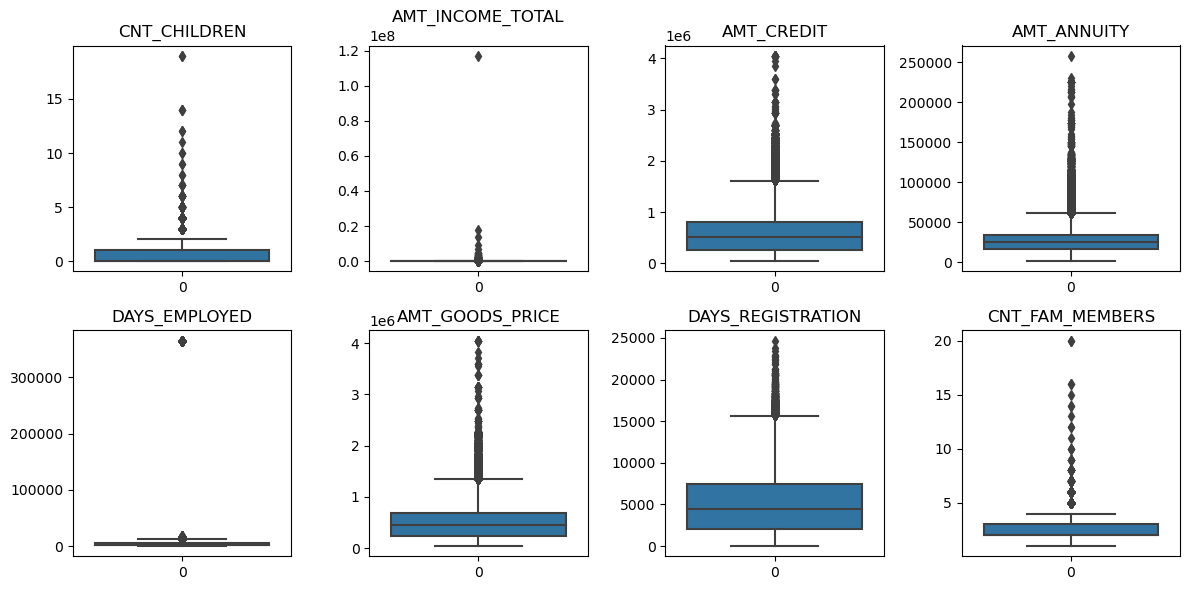

In [46]:
plt.figure(figsize = (12,6))
for i, cols in enumerate(app_dataf[relevant_cols]):
    plt.subplot(2 ,4, i+1)
    sns.boxplot(app_dataf[cols])
    plt.tight_layout()
    plt.title(cols)
    
plt.show()

-  'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS' appear to have a large number of outliers in the data which are all beyond the upper limit.
- 'AMT_INCOME_TOTAL' has a bunch of outliers closer to the upper limit but one outlier seems to be very far away.
- 'DAYS_EMPLOYED' seems to have only one outlier.

# Data Bining for Analysis

- Among all the data we need to select the columns that could be binned which could be done by finding out the number of unique data points in each column.

In [47]:
#Find the number of unique datapoints in each column
app_dataf.nunique().sort_values(ascending = False)

SK_ID_CURR                     307511
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13673
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PROCESS_START            24
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
NAME_INCOME_TYPE                    8
NAME_TYPE_SU

- The columns with lower number of unique entries don't require any binning so we need to select the columns worth binning.
- The columns worth binning for our analysis are DAYS_BIRTH, DAYS_EMPLOYED, AMT_CREDIT, AMT_INCOME_TOTAL, AMT_GOODS_PRICE 

In [48]:
app_dataf['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [49]:
# Converting number of days in DAYS_BIRTH into years
app_dataf['AGE'] = round(app_dataf['DAYS_BIRTH']/365)
app_dataf['AGE'].describe() 

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

- During binning we need to make sure that all are data points are included within the range so the minimum datapoint should be the lower limit and the upper limit should be the maximum datapoint unless there are outliers.

In [50]:
#Binning the DAYS_BIRTH column
bins = [20,25,30,35, 40,45, 50,55, 60,65,70]
group = ['20-25','25-30', '30-35','35-40', '40-45','45-50', '50-55','55-60', '60-65','65-70']
app_dataf['AGE_GRP'] = pd.cut(app_dataf['AGE'], bins= bins, labels= group)
app_dataf.groupby(['AGE_GRP']).size()

AGE_GRP
20-25    14213
25-30    34656
30-35    39473
35-40    43297
40-45    40585
45-50    34924
50-55    34910
55-60    33045
60-65    25965
65-70     6443
dtype: int64

In [51]:
#Binning DAYS_EMPLOYED column
app_dataf['YEARS_EMPLOYED'] = app_dataf['DAYS_EMPLOYED']/365
app_dataf['YEARS_EMPLOYED'].agg(['min','max'])

min       0.000000
max    1000.665753
Name: YEARS_EMPLOYED, dtype: float64

- The maximum number of employment years seems to be 1001 which is unrealistic. Its most likely outlier so we need to find the second largest value in the column and see if that is more realistic.
- And since the min value is 0, we will need to include those datapoints in the bins as well.

In [52]:
# Finding the second largest datapoint
max_value = app_dataf['YEARS_EMPLOYED'].max()
second_max = app_dataf['YEARS_EMPLOYED'][app_dataf['YEARS_EMPLOYED'] < max_value].max()
second_max

49.07397260273972

- 49 years appears to be the second largest value and is much more realistic so we'll utilise that to determine the upper limit of the groups

In [53]:
# Binning data
bins = [0,5,10,15,20,25,30,35,40,45,50, 1001]
group = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y','50Y above']
app_dataf['EMPLOYMENT_YEARS']= pd.cut(app_dataf['YEARS_EMPLOYED'], bins= bins, labels= group, right=False)
app_dataf.groupby(['EMPLOYMENT_YEARS']).size()

EMPLOYMENT_YEARS
0-5Y         136267
5Y-10Y        64890
10Y-15Y       27567
15Y-20Y       10855
20Y-25Y        6244
25Y-30Y        3308
30Y-35Y        1940
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
50Y above     55374
dtype: int64

In [54]:
# Binning the AMT_CREDIT column
print(app_dataf['AMT_CREDIT'].agg(['max', 'min']))
bins = [0, 400000, 800000, 1200000, 1600000, 2000000, 2400000, 2800000, 3200000, 3600000, 4000000,4050000]
groups = ['0-4L', '4L-8L', '8L-12L', '12L-16L', '16L-20L', '20L-24L', '24L-28L', '28L-32L', '32L-36L', '36L-40L', '40L above']
app_dataf['CREDIT_RANGE']= pd.cut(app_dataf['AMT_CREDIT'], bins=bins, labels= groups)
app_dataf.groupby(['CREDIT_RANGE']).size()

max    4050000.0
min      45000.0
Name: AMT_CREDIT, dtype: float64


CREDIT_RANGE
0-4L         117295
4L-8L        109512
8L-12L        52845
12L-16L       21161
16L-20L        4669
20L-24L        1552
24L-28L         434
28L-32L          23
32L-36L           8
36L-40L           2
40L above        10
dtype: int64

In [55]:
# Binning the AMT_INCOME_TOTAL column
print(app_dataf['AMT_INCOME_TOTAL'].agg(['max', 'min']))
app_dataf['AMT_INCOME_TOTAL'].sort_values(ascending = False).head(10)

max    117000000.0
min        25650.0
Name: AMT_INCOME_TOTAL, dtype: float64


12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
103006      4500000.0
204564      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
Name: AMT_INCOME_TOTAL, dtype: float64

- There is a significant difference between the maximum and the second largest datapoint in this column implying that the maximum value could be an outlier so we'll be considering the second larget value for grouping.

In [56]:
bins = [0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000, 2000000, 117000000 ]
groups = ['0-2L', '2L-4L', '4L-6L', '6L-8L', '8L-10L','10L-12L', '12L-14L', '14L-16L', '16L-18L', '18L-20L', '20L above']
app_dataf['INCOME_RANGE']= pd.cut(app_dataf['AMT_INCOME_TOTAL'], bins=bins, labels= groups)
app_dataf.groupby(['INCOME_RANGE']).size()

INCOME_RANGE
0-2L         219596
2L-4L         79852
4L-6L          6456
6L-8L          1031
8L-10L          326
10L-12L          92
12L-14L          71
14L-16L          22
16L-18L          16
18L-20L           5
20L above        44
dtype: int64

In [57]:
# Binning the AMT_GOODS_PRICE column
print(app_dataf['AMT_GOODS_PRICE'].agg(['max', 'min']))
app_dataf['AMT_GOODS_PRICE'].sort_values(ascending = False).head(10)
bins = [0, 400000, 800000, 1200000, 1600000, 2000000, 2400000, 2800000, 3200000, 3600000, 4000000,4050000]
groups = ['0-4L', '4L-8L', '8L-12L', '12L-16L', '16L-20L', '20L-24L', '24L-28L', '28L-32L', '32L-36L', '36L-40L', '40L above']
app_dataf['PRICE_RANGE']= pd.cut(app_dataf['AMT_GOODS_PRICE'], bins=bins, labels= groups)
app_dataf.groupby(['PRICE_RANGE']).size()

max    4050000.0
min      40500.0
Name: AMT_GOODS_PRICE, dtype: float64


PRICE_RANGE
0-4L         125645
4L-8L        118502
8L-12L        45762
12L-16L       13200
16L-20L        3309
20L-24L        1028
24L-28L          30
28L-32L          17
32L-36L           8
36L-40L           2
40L above         8
dtype: int64

In [58]:
app_dataf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0        9461            637             3648.0             2120           1   
1       16765           1188             1186.0              291           1   
2       19046            225             4260.0             2531           1   
3       19005           3039             9833.0             2437           1   
4       19932           3038             4311.0             3458           1   

   FLAG_EMP_PHONE  FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               1                 1        Laborers              1.0   
1               1                 1      Core staff              2.0   
2               1                 1        Laborers              1.0   
3               1                 1        Laborers              2.0   
4               1                 1      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0            

# Identifying Categorical and Numerical Columns

In [59]:
app_dataf.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_CONT_MOBILE                  int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64


In [60]:
app_dataf.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHA

- There are four types of data in our dataset - int, float and object and category.
- We would need to identify the categorical and numerical data.
- If a column is 'object' datatype and columns with small number of unique datapoints can be categorised easily and therefore, such columns can be called categorical columns. 
- So next step will be find such columns and designate them as 'category' datatype.

In [61]:
# Identifying and resetting the category columns
obj_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN','CNT_FAM_MEMBERS',
            'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
            'NAME_HOUSING_TYPE','FLAG_OWN_REALTY','FLAG_MOBIL', 'FLAG_EMP_PHONE',
            'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_3', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
            'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
            'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
            'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'] 

app_dataf[obj_cols]= app_dataf[obj_cols].astype('category')
cat_cols= [cols for cols in app_dataf.columns if app_dataf[cols].dtype=='category']
cat_df = app_dataf[cat_cols]
cat_df.head()


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY CNT_CHILDREN NAME_TYPE_SUITE  \
0         Cash loans           M               Y            0   Unaccompanied   
1         Cash loans           F               N            0          Family   
2    Revolving loans           M               Y            0   Unaccompanied   
3         Cash loans           F               Y            0   Unaccompanied   
4         Cash loans           M               Y            0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE FLAG_MOBIL FLAG_EMP_PHONE FLAG_CONT_MOBILE  \
0  House / apartment          1              1                1   
1  House / apartment          1              1                1   
2  House / apartment          1              1                1   
3  House / apartment          1              1                1   
4  House / apartment          1              1                1   

  OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0        Laborers             1.0                    2   
1      Core staff             2.0                    1   
2        Laborers             1.0                    2   
3        Laborers             2.0                    2   
4      Core staff             1.0                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                           2                  WEDNESDAY   
1                           1                     MONDAY   
2                           2                     MONDAY   
3                           2                  WEDNESDAY   
4                           2                   THURSDAY   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      1   

  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE FLAG_DOCUMENT_3 AGE_GRP  \
0                       0  Business Entity Type 3               1   25-30   
1                       0                  School               1   45-50   
2                       0              Government               0   50-55   
3                       0  Business Entity Type 3               1   50-55   
4                       1                Religion               0   50-55   

  EMPLOYMENT_YEARS CREDIT_RANGE INCOME_RANGE PRICE_RANGE  
0             0-5Y        4L-8L        2L-4L        0-4L  
1             0-5Y      12L-16L        2L-4L      8L-12L  
2             0-5Y         0-4L         0-2L        0-4L  
3           5Y-10Y         0-4L         0-2L        0-4L  
4           5Y-10Y        4L-8L         0-2L       4L-8L

- The rest of the columns are numerical so let's create a dataframe of numerical columns

In [62]:
# Identifying the numeric columns
num_cols = [cols for cols in app_dataf if app_dataf[cols].dtype != 'category']
num_df = app_dataf[num_cols]

num_df['TARGET'] = num_df['TARGET'].apply(lambda x: 'Defaulters' if x==1 else 'Non_defaulters')
num_df.head()

SK_ID_CURR          TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002      Defaulters          202500.0    406597.5      24700.5   
1      100003  Non_defaulters          270000.0   1293502.5      35698.5   
2      100004  Non_defaulters           67500.0    135000.0       6750.0   
3      100006  Non_defaulters          135000.0    312682.5      29686.5   
4      100007  Non_defaulters          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801        9461            637   
1        1129500.0                    0.003541       16765           1188   
2         135000.0                    0.010032       19046            225   
3         297000.0                    0.008019       19005           3039   
4         513000.0                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
0             3648.0             2120                       10   
1             1186.0              291                       11   
2             4260.0             2531                        9   
3             9833.0             2437                       17   
4             4311.0             3458                       11   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                  1134.0   
1                       1.0                       0.0                   828.0   
2                       0.0                       0.0                   815.0   
3                       2.0                       0.0                   617.0   
4                       0.0                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR   AGE  YEARS_EMPLOYED  
0                        0.0                         1.0  26.0        1.745205  
1                        0.0                         0.0  46.0        3.254795  
2                        0.0                         0.0  52.0        0.616438  
3                        0.0                         1.0  52.0        8.326027  
4                        0.0                         0.0  55.0        8.323288

# Cleaning and Manipulation of "previous_applications" dataset

In [63]:
# Loading the dataset
prev_appi = pd.read_csv(r"C:\Users\suruc\OneDrive\Desktop\previous_application.csv")
prev_appi.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [64]:
# Dataset properties
SHAPE = prev_appi.shape
SHAPE

(1670214, 37)

- Number of rows = 1670214
- Number of columns = 37

In [65]:
prev_appi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

- Before further processing, we need to drop the columns that are irrelevant to our analysis.

In [66]:
# Dropping unnecssary columns
columns = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']
prev_appf= prev_appi.drop(columns= columns)
prev_appf.shape

(1670214, 33)

- We need to make all the negative values positive

In [67]:
# Making negative values positive
DAYS_COLS = [cols for cols in prev_appi.columns if 'DAYS' in cols]
prev_appf[DAYS_COLS]= abs(prev_appi[DAYS_COLS])
prev_appf[DAYS_COLS].head()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0             73            365243.0            42.0   
1            164            365243.0           134.0   
2            301            365243.0           271.0   
3            512            365243.0           482.0   
4            781                 NaN             NaN   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
0                      300.0           42.0              37.0  
1                      916.0       365243.0          365243.0  
2                       59.0       365243.0          365243.0  
3                      152.0          182.0             177.0  
4                        NaN            NaN               NaN

# Computing and Dealing with Null values

In [68]:
prev_appf.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                   372235
AMT_APPLICATION                    0
AMT_CREDIT                         1
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE                  0
CODE_REJECT_REASON                 0
NAME_TYPE_SUITE               820405
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_PORTFOLIO                     0
NAME_PRODUCT_TYPE                  0
CHANNEL_TYPE                       0
SELLERPLACE_AREA                   0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                   372230
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION              346
D

In [69]:
# Computing overall null percentage for all columns
NULL_VALUES = (prev_appf.isnull().sum()/prev_appf.shape[0])*100
NULL_PCNT = dict(NULL_VALUES)
NULL_PCNT

{'SK_ID_PREV': 0.0,
 'SK_ID_CURR': 0.0,
 'NAME_CONTRACT_TYPE': 0.0,
 'AMT_ANNUITY': 22.286665062081866,
 'AMT_APPLICATION': 0.0,
 'AMT_CREDIT': 5.9872567227912114e-05,
 'AMT_DOWN_PAYMENT': 53.636480115721696,
 'AMT_GOODS_PRICE': 23.08177275486854,
 'RATE_DOWN_PAYMENT': 53.636480115721696,
 'RATE_INTEREST_PRIMARY': 99.6436983524267,
 'RATE_INTEREST_PRIVILEGED': 99.6436983524267,
 'NAME_CASH_LOAN_PURPOSE': 0.0,
 'NAME_CONTRACT_STATUS': 0.0,
 'DAYS_DECISION': 0.0,
 'NAME_PAYMENT_TYPE': 0.0,
 'CODE_REJECT_REASON': 0.0,
 'NAME_TYPE_SUITE': 49.11975351661524,
 'NAME_CLIENT_TYPE': 0.0,
 'NAME_GOODS_CATEGORY': 0.0,
 'NAME_PORTFOLIO': 0.0,
 'NAME_PRODUCT_TYPE': 0.0,
 'CHANNEL_TYPE': 0.0,
 'SELLERPLACE_AREA': 0.0,
 'NAME_SELLER_INDUSTRY': 0.0,
 'CNT_PAYMENT': 22.286365699245724,
 'NAME_YIELD_GROUP': 0.0,
 'PRODUCT_COMBINATION': 0.02071590826085759,
 'DAYS_FIRST_DRAWING': 40.29812946125467,
 'DAYS_FIRST_DUE': 40.29812946125467,
 'DAYS_LAST_DUE_1ST_VERSION': 40.29812946125467,
 'DAYS_LAST_DUE': 40

In [70]:
# Selecting columns with null percentage > 40%
NULL_COLS_40 = {cols: null for cols, null in NULL_PCNT.items() if null >=  40}
NULL_COLS_40

{'AMT_DOWN_PAYMENT': 53.636480115721696,
 'RATE_DOWN_PAYMENT': 53.636480115721696,
 'RATE_INTEREST_PRIMARY': 99.6436983524267,
 'RATE_INTEREST_PRIVILEGED': 99.6436983524267,
 'NAME_TYPE_SUITE': 49.11975351661524,
 'DAYS_FIRST_DRAWING': 40.29812946125467,
 'DAYS_FIRST_DUE': 40.29812946125467,
 'DAYS_LAST_DUE_1ST_VERSION': 40.29812946125467,
 'DAYS_LAST_DUE': 40.29812946125467,
 'DAYS_TERMINATION': 40.29812946125467,
 'NFLAG_INSURED_ON_APPROVAL': 40.29812946125467}

- Technically these columns could be important for analysis but as majority of data is absent, generalising the datapoints could give falty results and cause biased analysis. So we should drop these.

In [71]:
# Dropping columns with null percent > 40%
prev_appf.drop(columns = NULL_COLS_40, inplace= True)
prev_appf.shape

(1670214, 22)

In [72]:
# Identifying rest of the null columns
NULL_COLS = {cols: null for cols, null in NULL_PCNT.items() if null < 40 and null > 0}
NULL_COLS

{'AMT_ANNUITY': 22.286665062081866,
 'AMT_CREDIT': 5.9872567227912114e-05,
 'AMT_GOODS_PRICE': 23.08177275486854,
 'CNT_PAYMENT': 22.286365699245724,
 'PRODUCT_COMBINATION': 0.02071590826085759}

In [73]:
prev_appf[NULL_COLS].head()

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  CNT_PAYMENT  \
0     1730.430     17145.0          17145.0         12.0   
1    25188.615    679671.0         607500.0         36.0   
2    15060.735    136444.5         112500.0         12.0   
3    47041.335    470790.0         450000.0         12.0   
4    31924.395    404055.0         337500.0         24.0   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

In [74]:
((prev_appf[NULL_COLS].isnull().sum()/SHAPE[0])*100).sort_values(ascending= False)

AMT_GOODS_PRICE        23.081773
AMT_ANNUITY            22.286665
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
AMT_CREDIT              0.000060
dtype: float64

In [75]:
# Dealing with null values in AMT_GOODS_PRICE column
prev_appf['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

- The maximum datapoint is very large comprared to the median and 75th percentile implying that the data is skewed.
- To understand and confirm we should take a look at the distribution

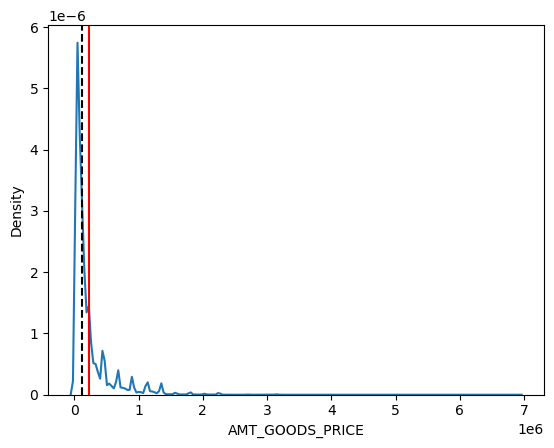

In [76]:
# Visualising the distribution
sns.kdeplot(prev_appf['AMT_GOODS_PRICE'])
plt.axvline(prev_appf['AMT_GOODS_PRICE'].mean(), color= 'r') # Mean
plt.axvline(prev_appf['AMT_GOODS_PRICE'].median(), color= 'black', linestyle='--') # Median
plt.show()

- The data is skewed to the right so instead of mean we should choose the median to impute in place of null values.

In [77]:
# Imputing the null values
prev_appf['AMT_GOODS_PRICE'].fillna(prev_appf['AMT_GOODS_PRICE'].median(), inplace=True)
prev_appf['AMT_GOODS_PRICE'].isnull().sum()

0

In [78]:
# Dealing with null values in AMT_ANNUITY column
prev_appf['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

- Judging by the differnce between the 75th percentile and the maximum datapoint, this data appears to be skewed as well.
- Let's visualise the data for clear understanding.

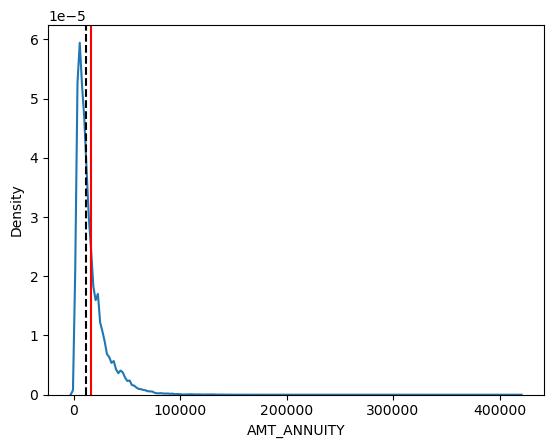

In [79]:
# Visualising the distribution
sns.kdeplot(prev_appf['AMT_ANNUITY'])
plt.axvline(prev_appf['AMT_ANNUITY'].mean(), color= 'r') # Mean
plt.axvline(prev_appf['AMT_ANNUITY'].median(), color= 'black', linestyle='--') # Median
plt.show()

- Since the data is right skewed, imputing mean in for null values would not be the right approach, instead we will impute the median.

In [80]:
# Imputing null values
prev_appf['AMT_ANNUITY'].fillna(prev_appf['AMT_ANNUITY'].median(), inplace=True)
prev_appf['AMT_ANNUITY'].isnull().sum()

0

In [81]:
# We'll fill in the null values in CNT_PAYMENT column with 0 
prev_appf['CNT_PAYMENT'].fillna(0, inplace=True)
prev_appf['CNT_PAYMENT'].isnull().sum()

0

In [82]:
# Dealing with null values in PRODUCT_COMBINATION column
prev_appf['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

- As we can't use any of the central measures to fill in the data to avoid bias, we will impute the nulls with 'unknown'.

In [83]:
# Imputing null values
prev_appf['PRODUCT_COMBINATION'].fillna('Unknown', inplace=True)
prev_appf['PRODUCT_COMBINATION'].isnull().sum()

0

In [84]:
# We have taken care of all the null values in the dataset
(prev_appf.isnull().sum()/SHAPE[0])*100

SK_ID_PREV                0.00000
SK_ID_CURR                0.00000
NAME_CONTRACT_TYPE        0.00000
AMT_ANNUITY               0.00000
AMT_APPLICATION           0.00000
AMT_CREDIT                0.00006
AMT_GOODS_PRICE           0.00000
NAME_CASH_LOAN_PURPOSE    0.00000
NAME_CONTRACT_STATUS      0.00000
DAYS_DECISION             0.00000
NAME_PAYMENT_TYPE         0.00000
CODE_REJECT_REASON        0.00000
NAME_CLIENT_TYPE          0.00000
NAME_GOODS_CATEGORY       0.00000
NAME_PORTFOLIO            0.00000
NAME_PRODUCT_TYPE         0.00000
CHANNEL_TYPE              0.00000
SELLERPLACE_AREA          0.00000
NAME_SELLER_INDUSTRY      0.00000
CNT_PAYMENT               0.00000
NAME_YIELD_GROUP          0.00000
PRODUCT_COMBINATION       0.00000
dtype: float64

# Identification of Categorical and Numeric columns

In [85]:
prev_appf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1670214 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1670214 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [86]:
# Identifying and filtering the numerical columns
NUM_COLS = [cols for cols in prev_appf.columns if prev_appf[cols].dtype != 'object']
NUM_DF= prev_appf[NUM_COLS]
NUM_DF.nunique()

SK_ID_PREV          1670214
SK_ID_CURR           338857
AMT_ANNUITY          357959
AMT_APPLICATION       93885
AMT_CREDIT            86803
AMT_GOODS_PRICE       93885
DAYS_DECISION          2922
SELLERPLACE_AREA       2097
CNT_PAYMENT              49
dtype: int64

- All the numeric columns have unique entries large enough that they can't be categorised. So all the rest i.e. 'object' type columns are our categorical columns

In [87]:
# Identifying and filtering categorical columns
CAT_COLS = [cols for cols in prev_appf.columns if prev_appf[cols].dtype == 'object']
CAT_DF = prev_appf[CAT_COLS]
CAT_DF.head()

NAME_CONTRACT_TYPE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     Consumer loans                    XAP             Approved   
1         Cash loans                    XNA             Approved   
2         Cash loans                    XNA             Approved   
3         Cash loans                    XNA             Approved   
4         Cash loans                Repairs              Refused   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  Cash through the bank                XAP         Repeater   
1                    XNA                XAP         Repeater   
2  Cash through the bank                XAP         Repeater   
3  Cash through the bank                XAP         Repeater   
4  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  \
0             Country-wide         Connectivity           middle   
1           Contact center                  XNA       low_action   
2  Credit and cash offices                  XNA             high   
3  Credit and cash offices                  XNA           middle   
4  Credit and cash offices                  XNA             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

- Let's change the datatype of 'object' columns to 'category'.

In [88]:
# Resetting the object columns to category
prev_appf[CAT_COLS] = prev_appf[CAT_COLS].astype('category')
prev_appf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

# Outlier Detection

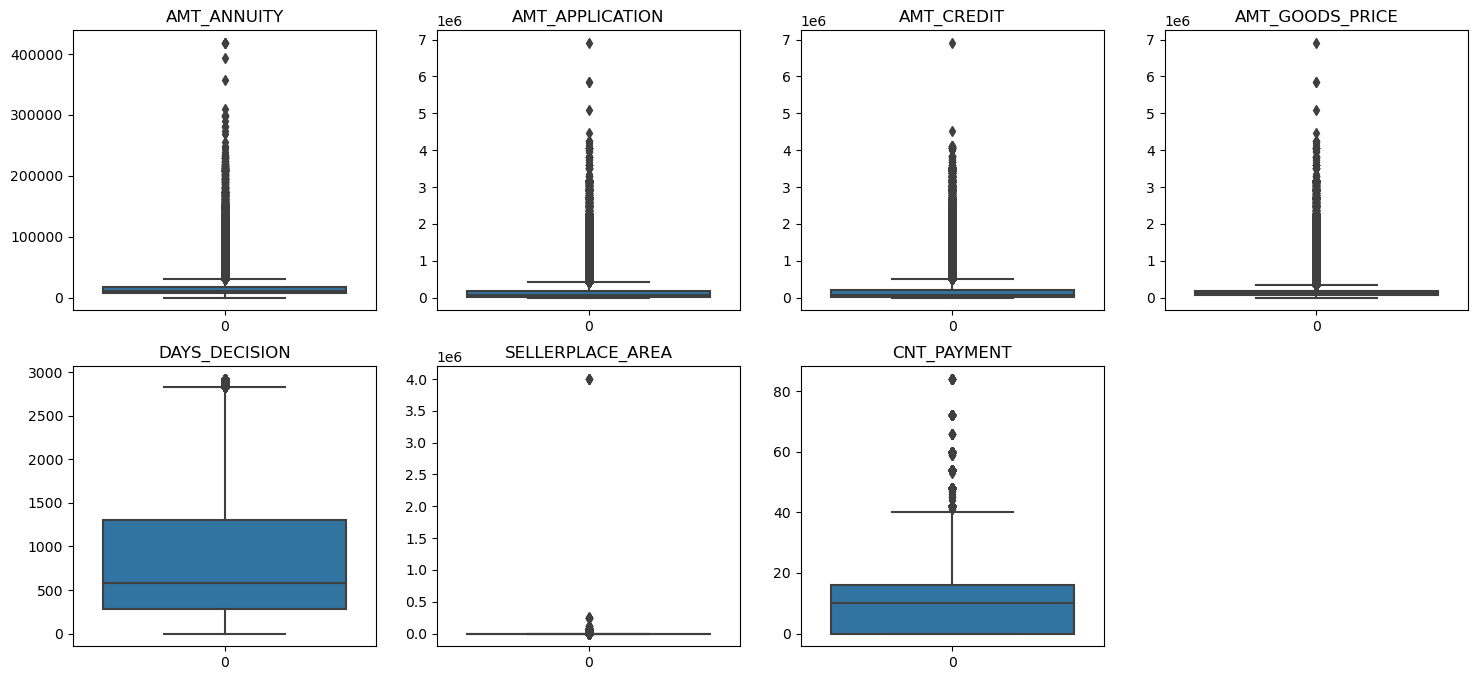

In [89]:
# Visulaising outliers for all the numeric columns
plt.figure(figsize=(18,8))
for i, cols in enumerate(NUM_DF.columns[2:]):
    plt.subplot(2,4,i+1)
    sns.boxplot(prev_appf[cols])
    plt.title(cols)
plt.show()

- Since the SK_ID_PREV, SK_ID_CURR columns are client IDs we will not check for outliers in them.
- All the rest of the numeric columns seem to have outliers.
- DAYS_DECISION have very few outliers which are very close to the upper limit.
- CNT_PAYMENT also have quite a few ouliers beyond the upper limit.
- SELLERPLACE_AREA seems to have few outliers closer to the upper limit and one way beyond the upper limit.
- AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE columns appear to have large amount of outliers

# DATA ANALYSIS ON CLEANED DATASETS

# 1. Checking for Data Imbalance

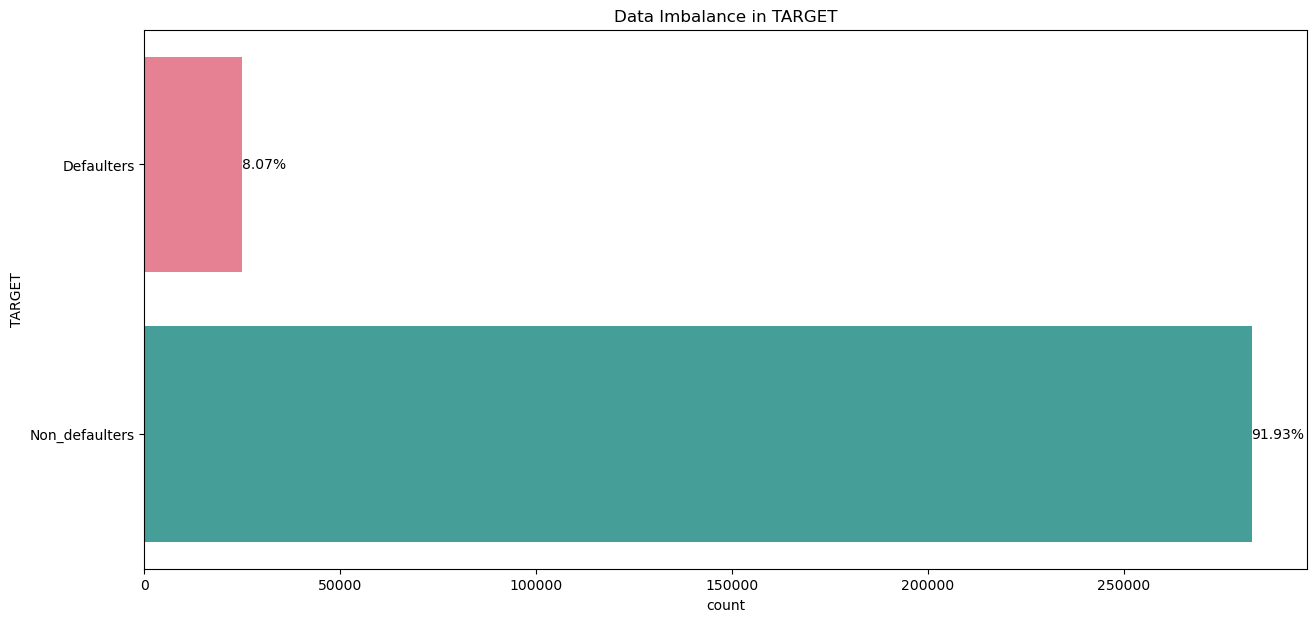

In [90]:
#Checking for data imbalance in TARGET column
plt.figure(figsize=(15,7))
ax = sns.countplot(data=num_df, y='TARGET', palette= 'husl')
plt.title('Data Imbalance in TARGET')
total = len(cat_df)
for p in ax.patches:
    count = p.get_width()
    percentage = count / total * 100
    text = f'{percentage:.2f}%'
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(text, (x, y), ha='left', va='center')
    
plt.show()

In [91]:
print('Ratio of data imbalance: ', round(num_df['TARGET'].value_counts()[0]/num_df['TARGET'].value_counts()[1],2),':1')

Ratio of data imbalance:  11.39 :1


- The data distribution between Defaluters and Non_defaulters is highly imbalanced with almost 92% of the data being for Non-defaulters and only 8% of total data for Defaulters.
- This may result in incorrect prediction of potential Defaulters because we don't have enough data for understanding the relationships and trends between different factors affecting the default.

# 2. Univariate Analysis

Univariate Analysis of categorical columns 
--

In [92]:
def univar_analysis(df, var):
    fig, axs = plt.subplots(2, 1, figsize=(12,10))

    # Countplot showing count of variables against each category of TARGET- Deafulters, Non_defaulters
    ax = axs[0]
    sns.countplot(data=df, x=var, hue=num_df['TARGET'], palette='husl', ax=ax)
    ax.set_title(var)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = count
        ax.annotate(str(count), (x, y), va='bottom', ha='center')
        ax.set_yscale('log')
        ax.set_ylabel('Count(log)')

    # Barplot showing percentage of variables against Defaulters
    ax = axs[1]
    cnt = pd.crosstab(df[var], num_df['TARGET'])
    percent = cnt.div(cnt.sum(axis=1), axis=0) * 100
    percent.reset_index(inplace=True)
    bx = sns.barplot(data=percent, x=var, y='Defaulters', palette='husl', ax=ax)
    ax.set_title('Percent of Defaulters in '+var)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for r in bx.patches:
        percent = r.get_height()
        x = r.get_x() + r.get_width() / 2
        y = percent
        bx.annotate(f'{percent:.2f}%', (x, y), va='bottom', ha='center')

    plt.tight_layout()
    return plt.show()

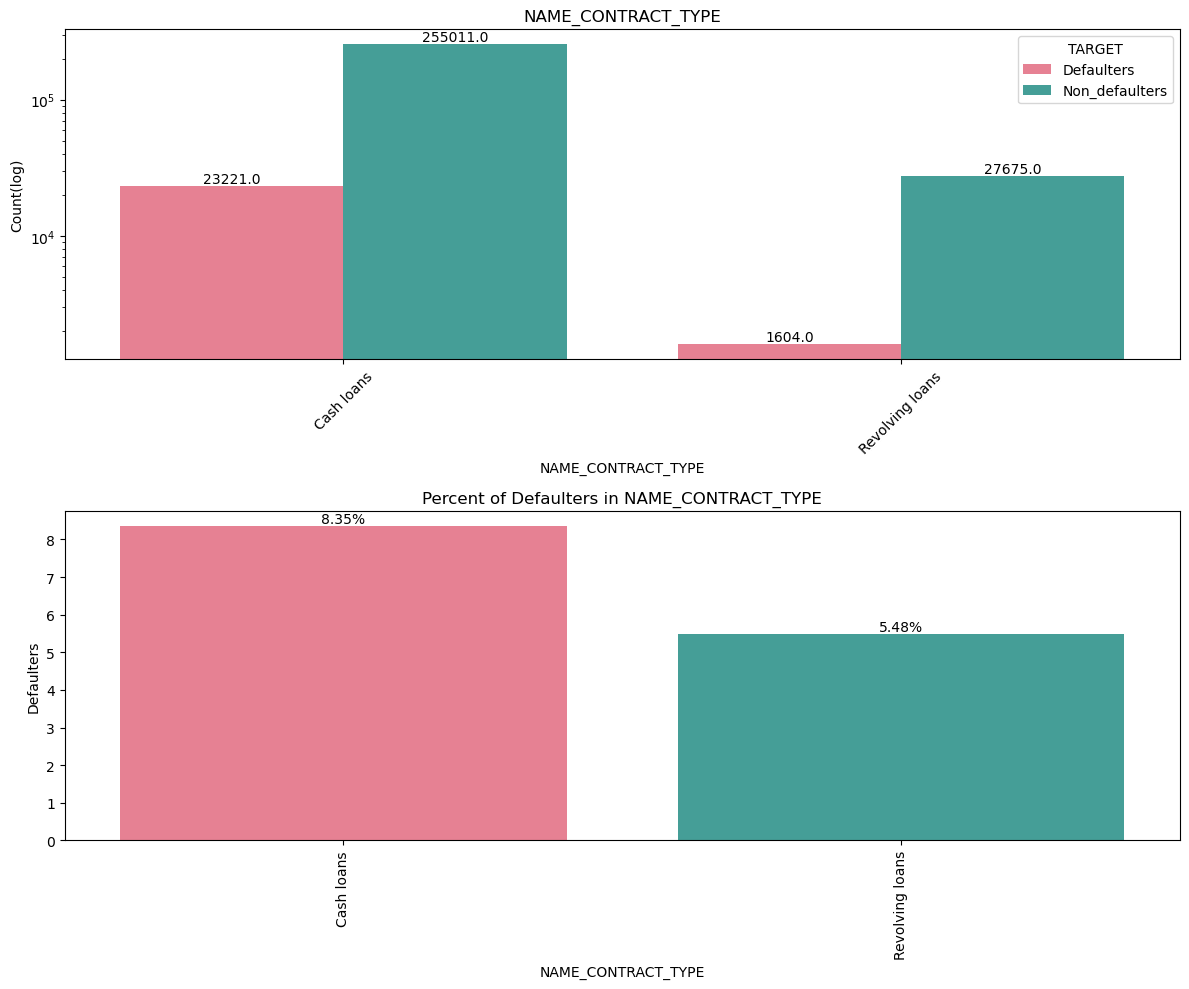

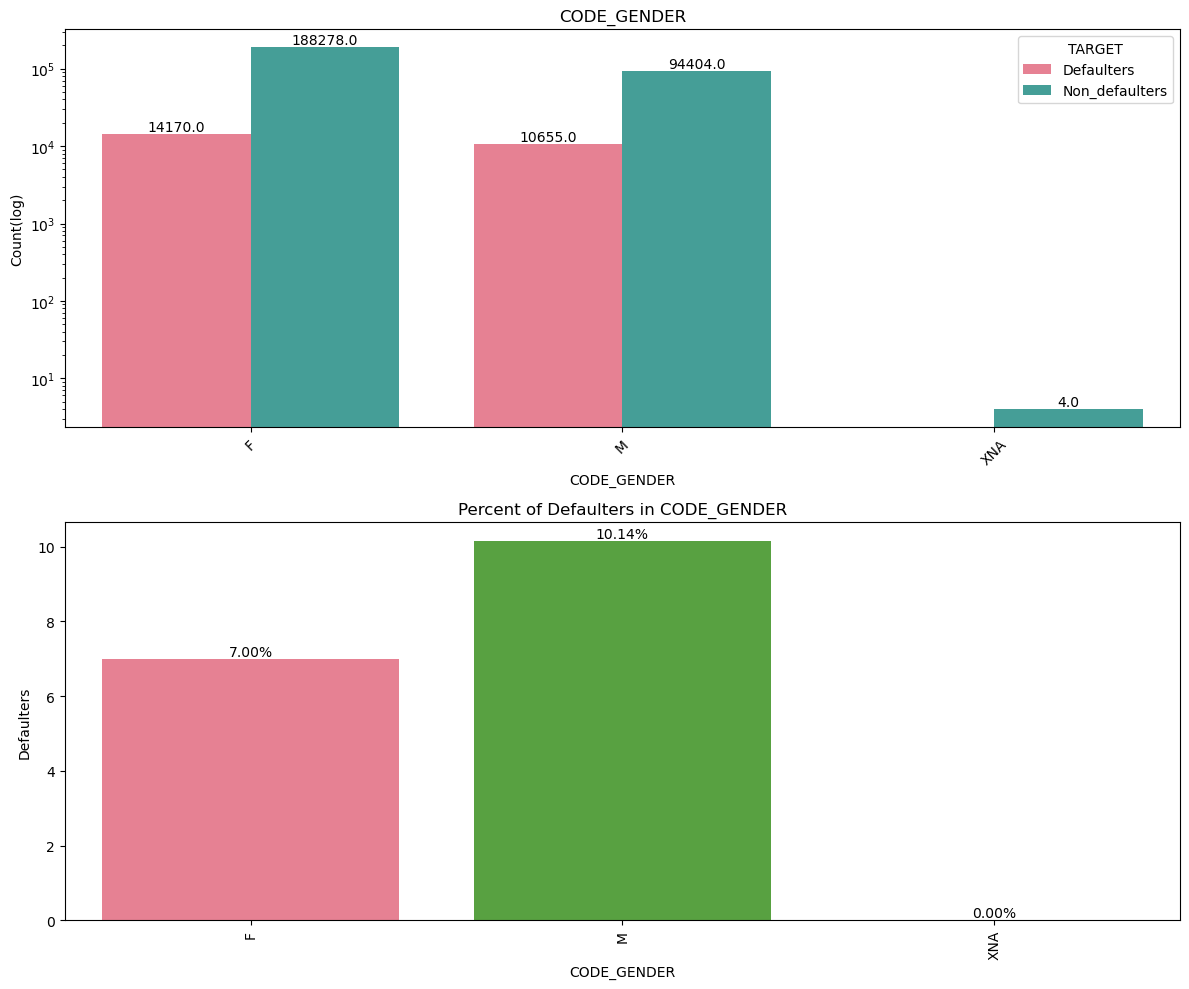

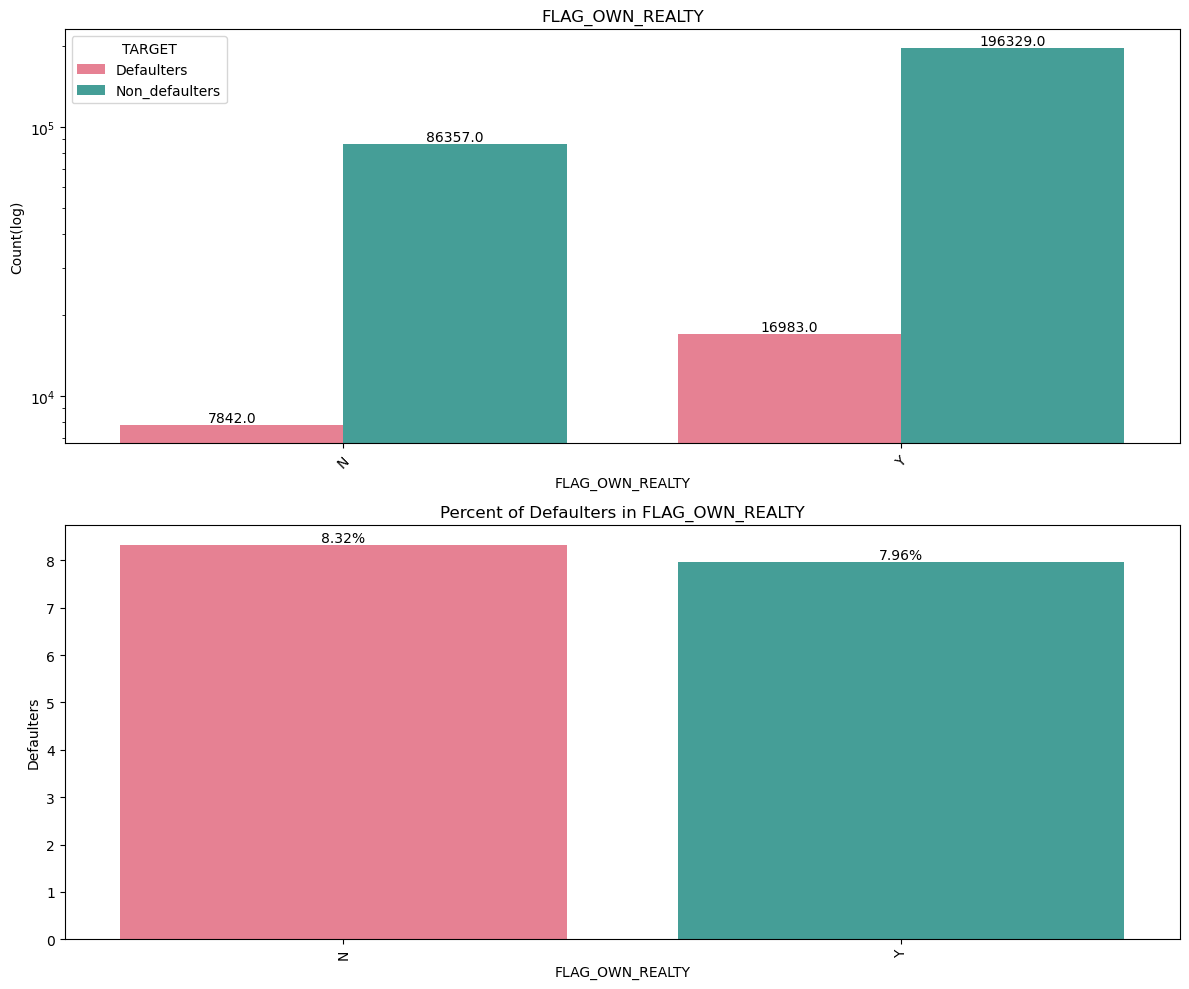

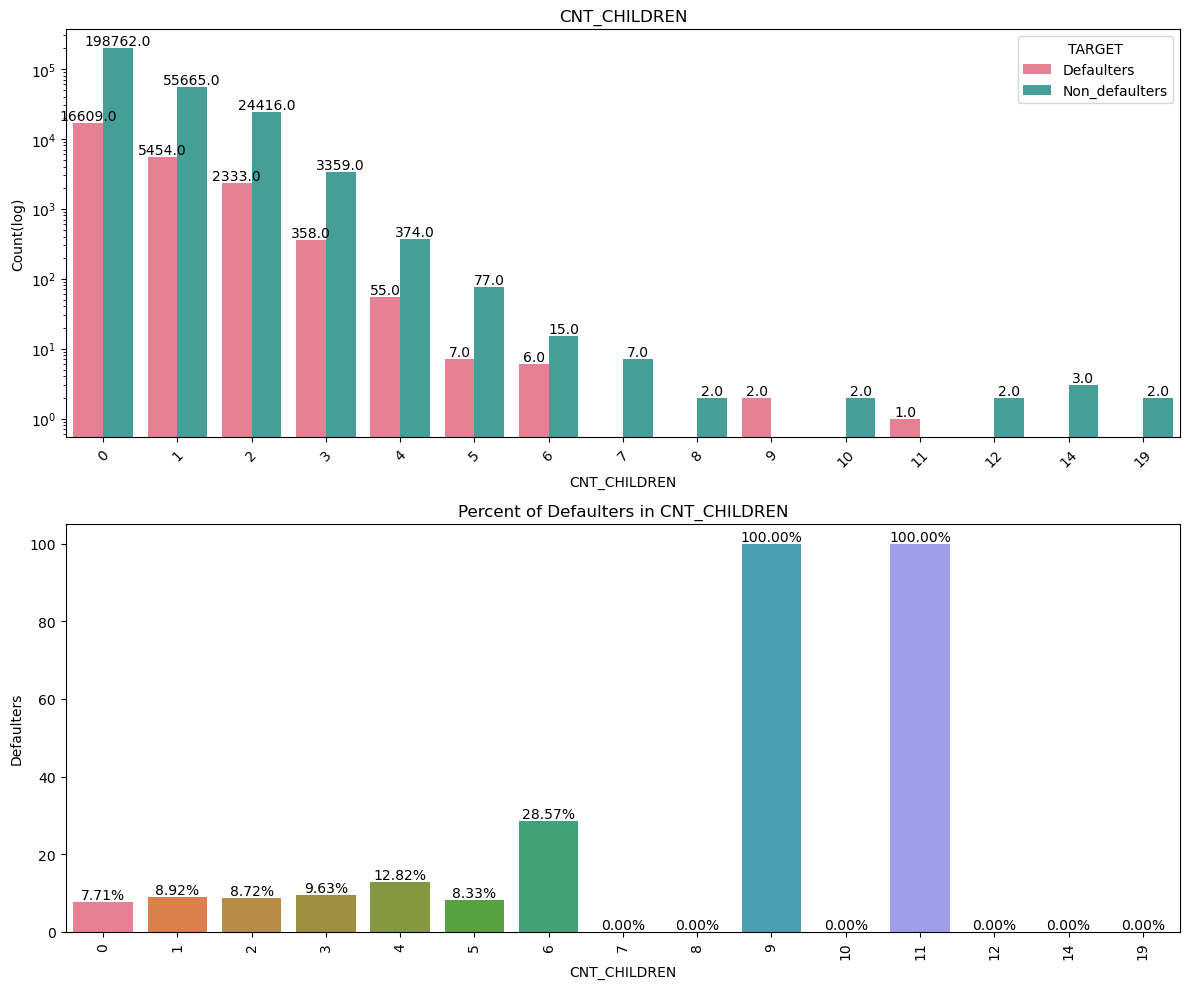

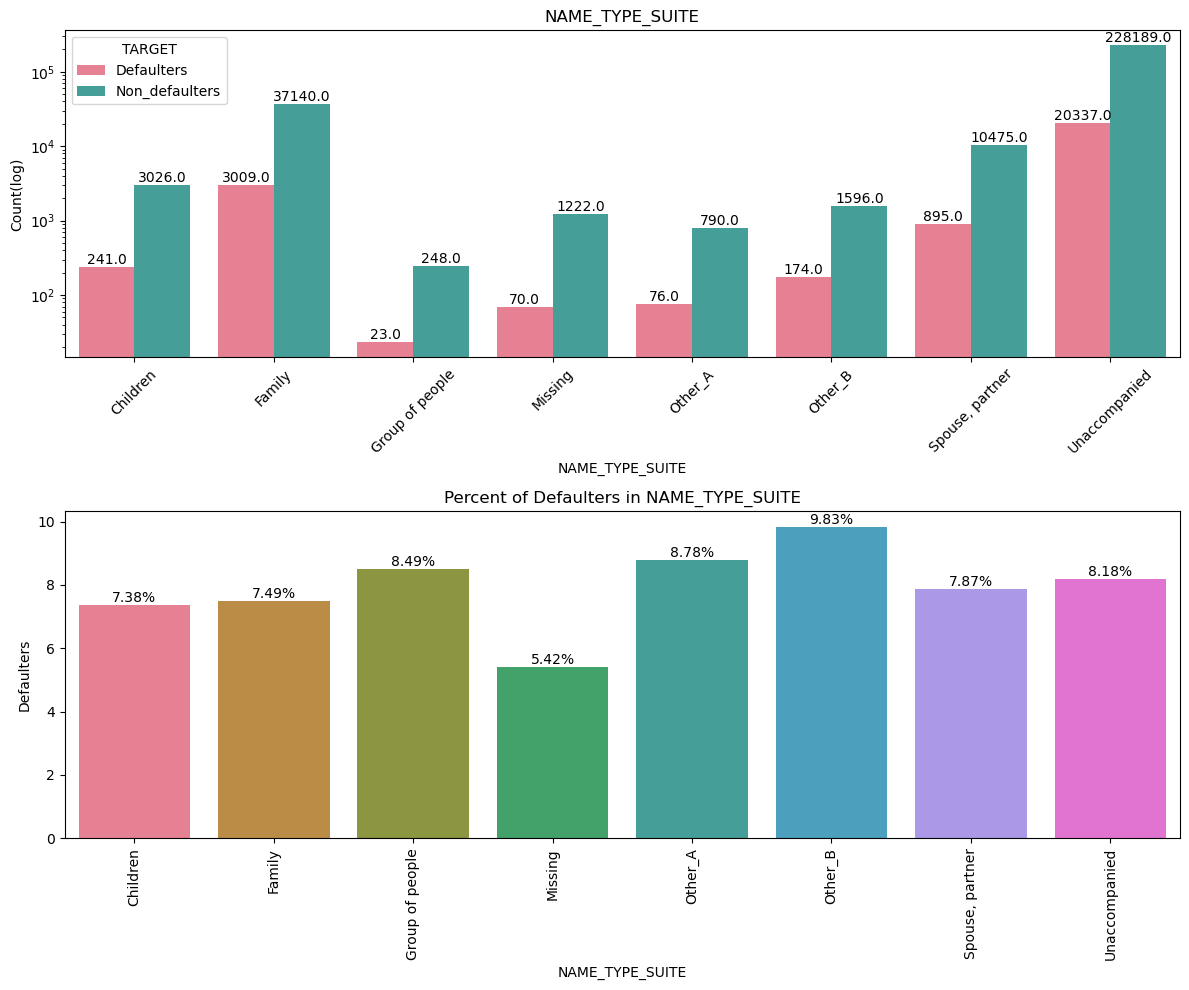

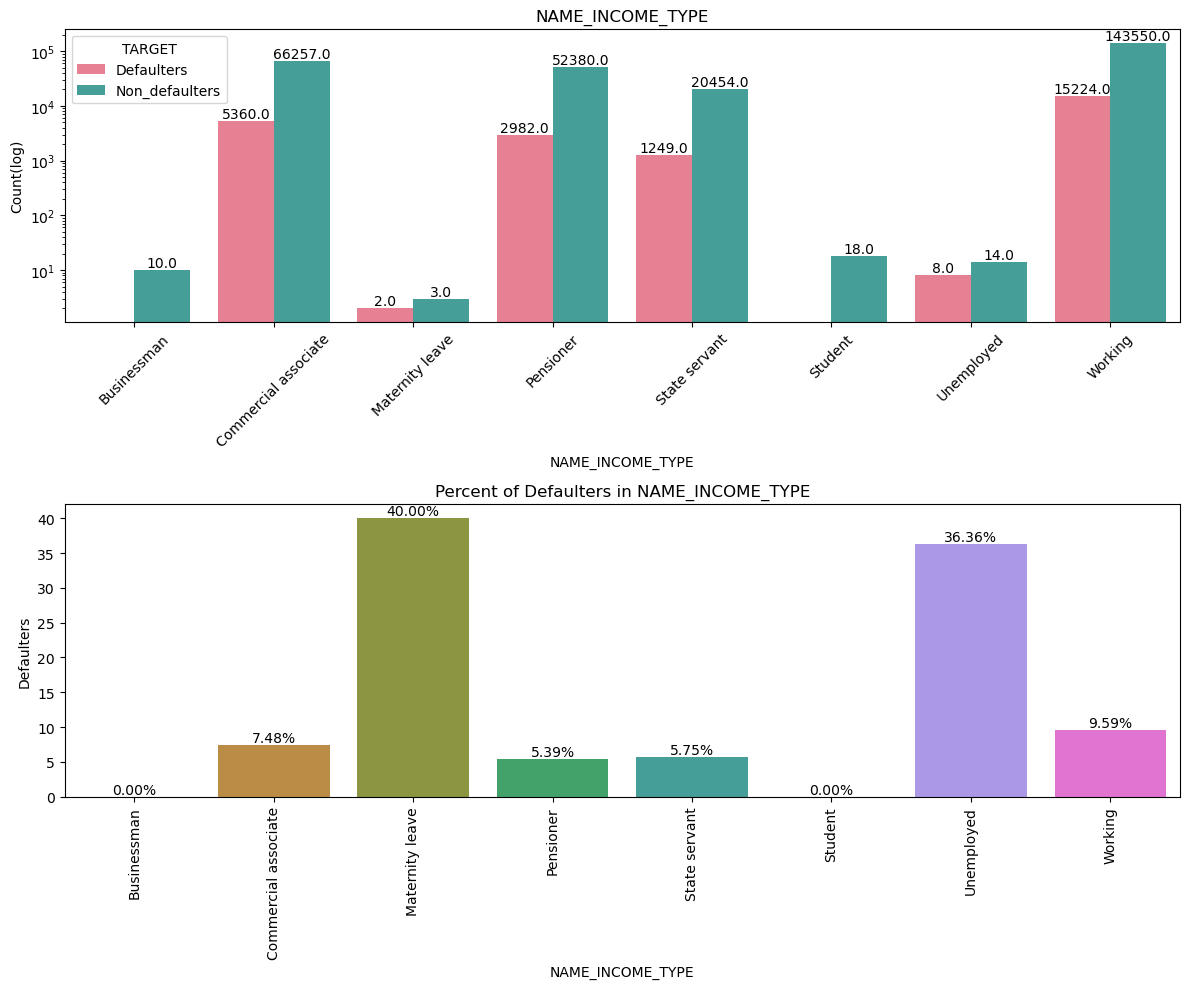

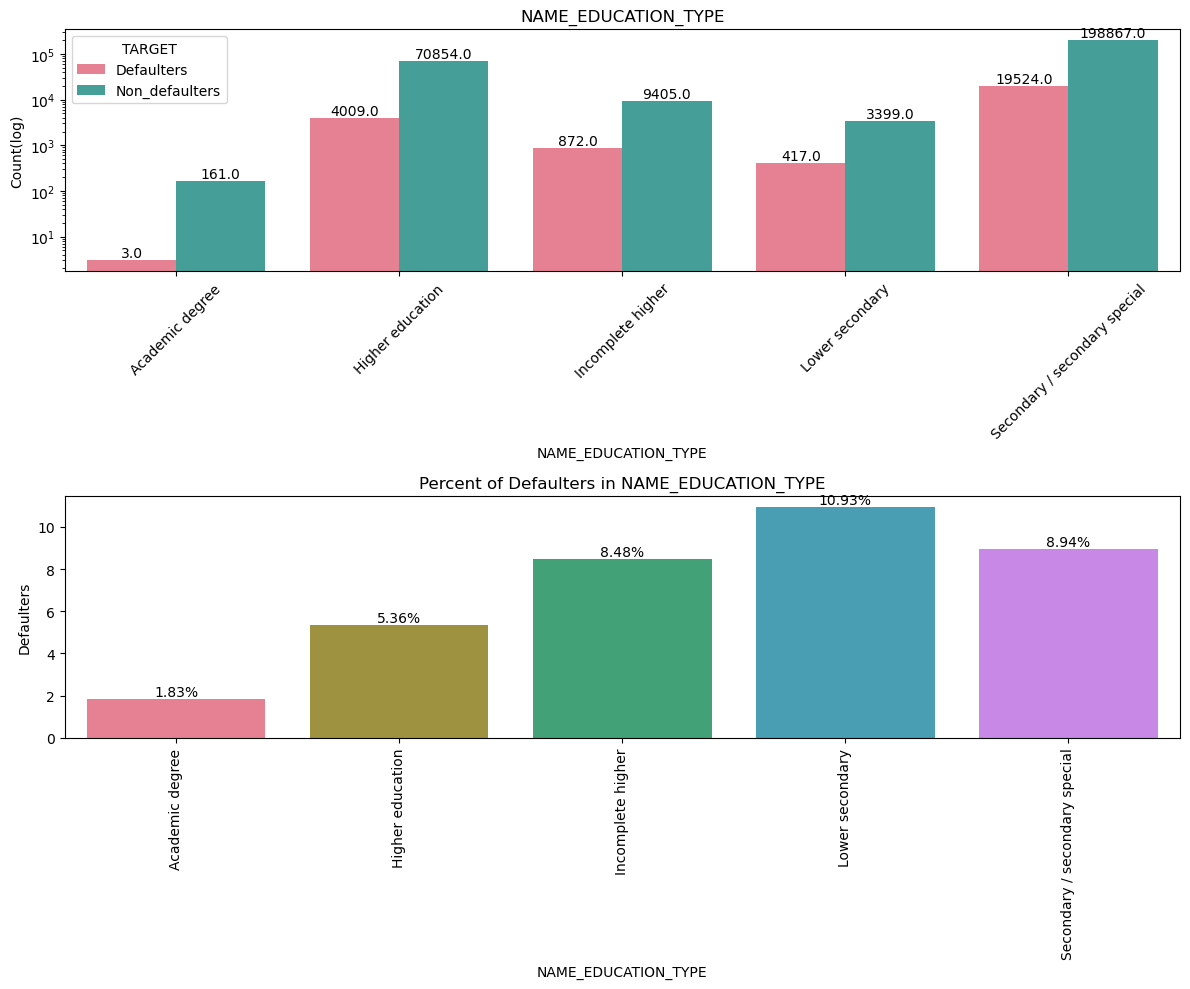

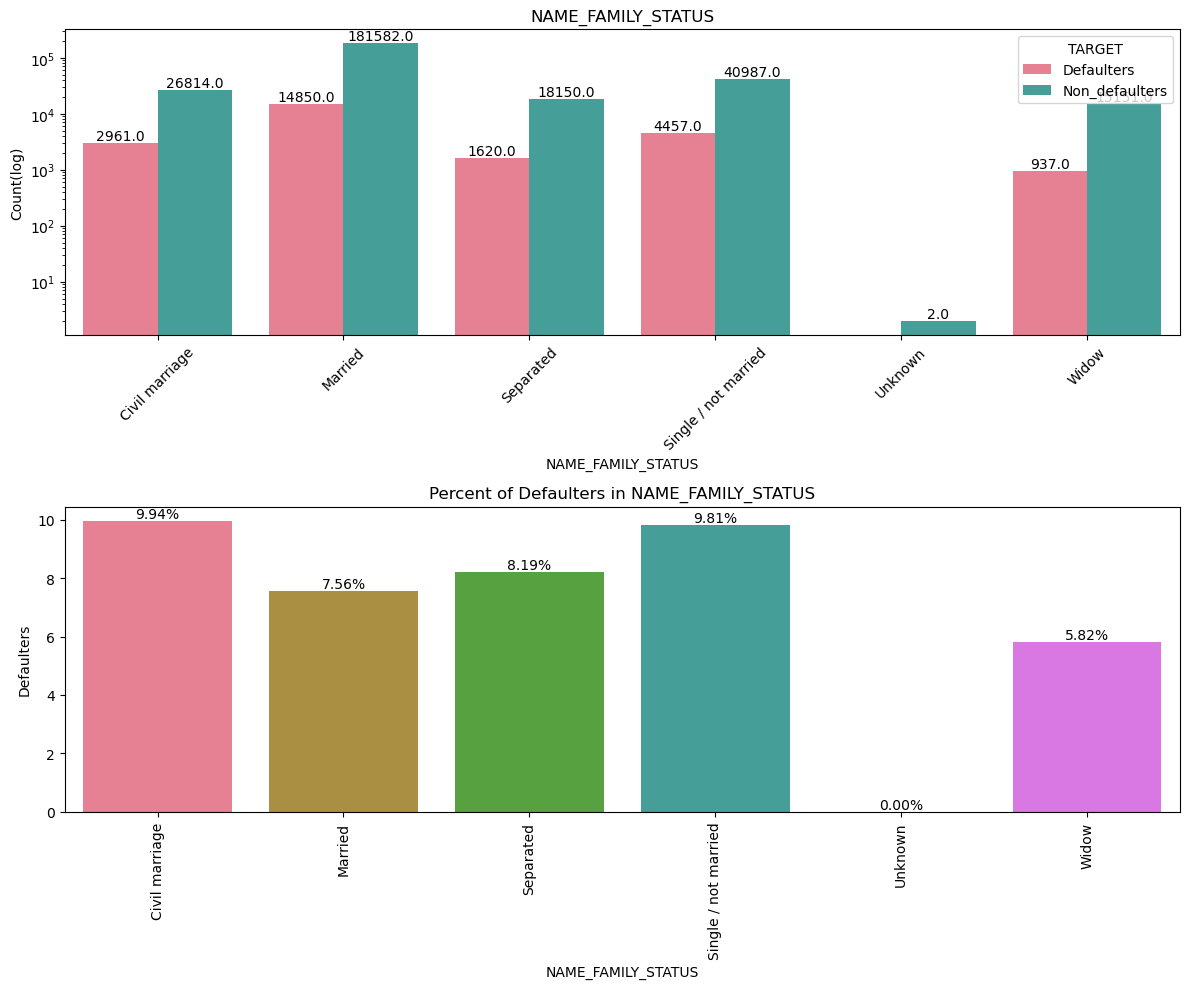

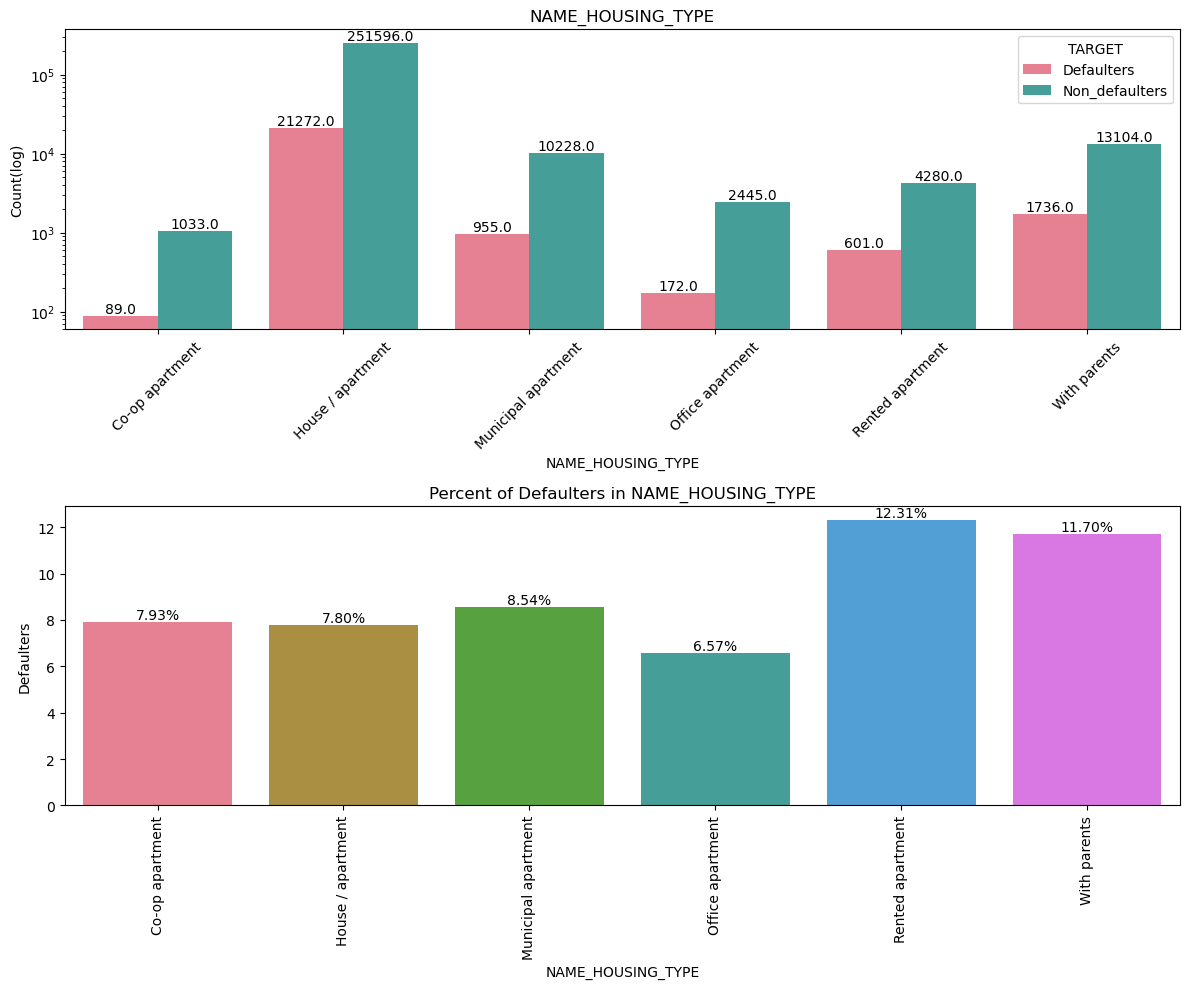

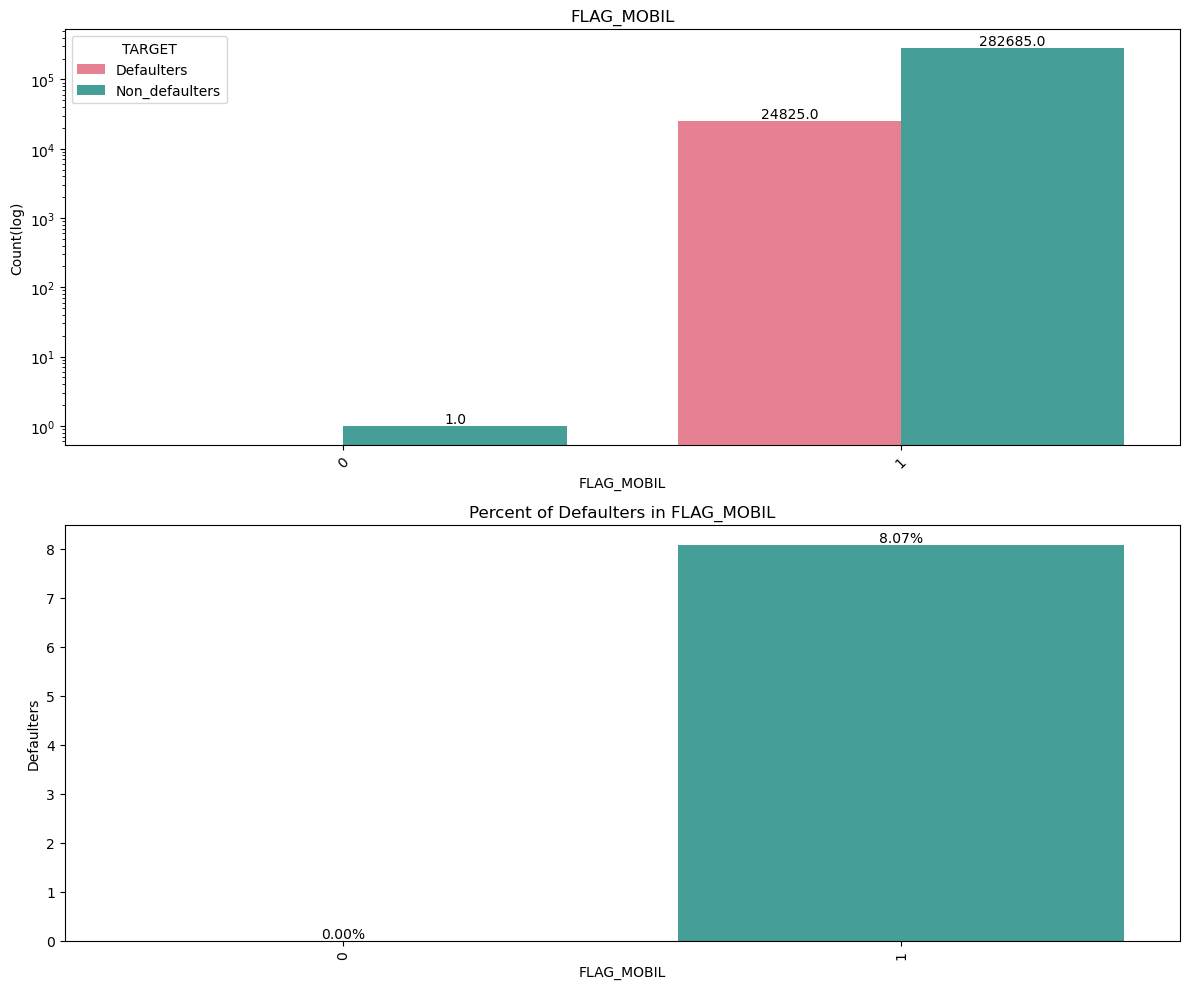

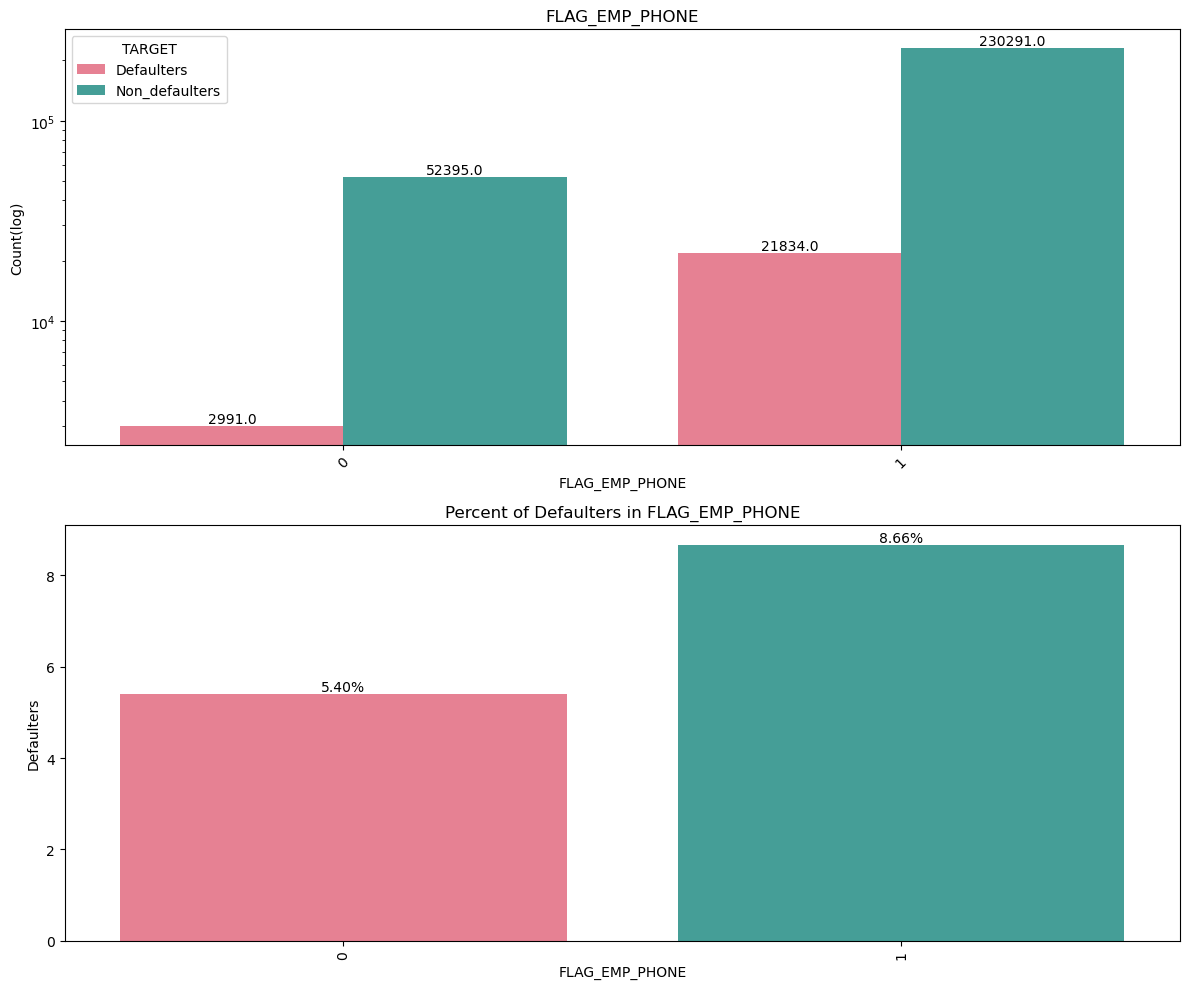

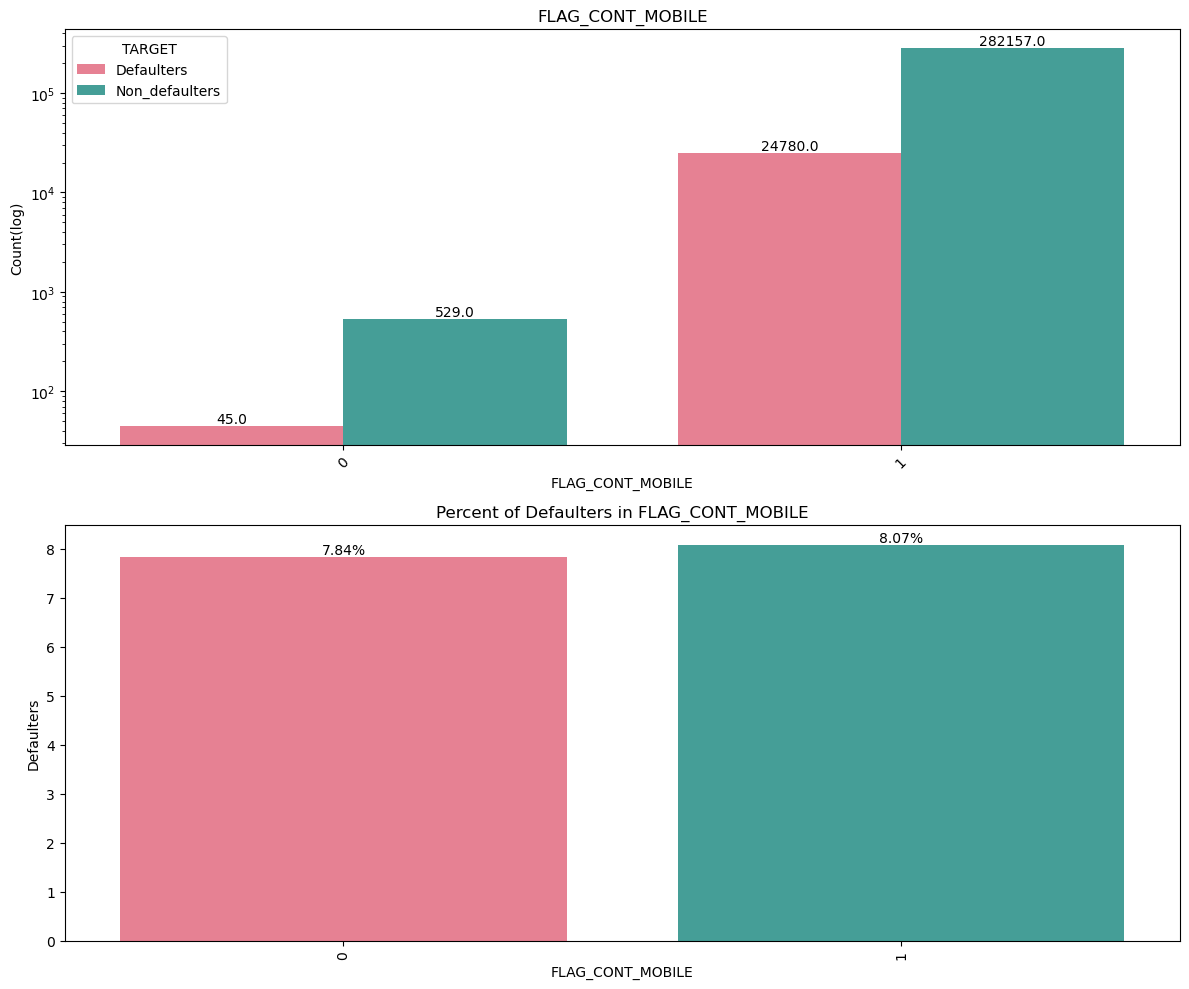

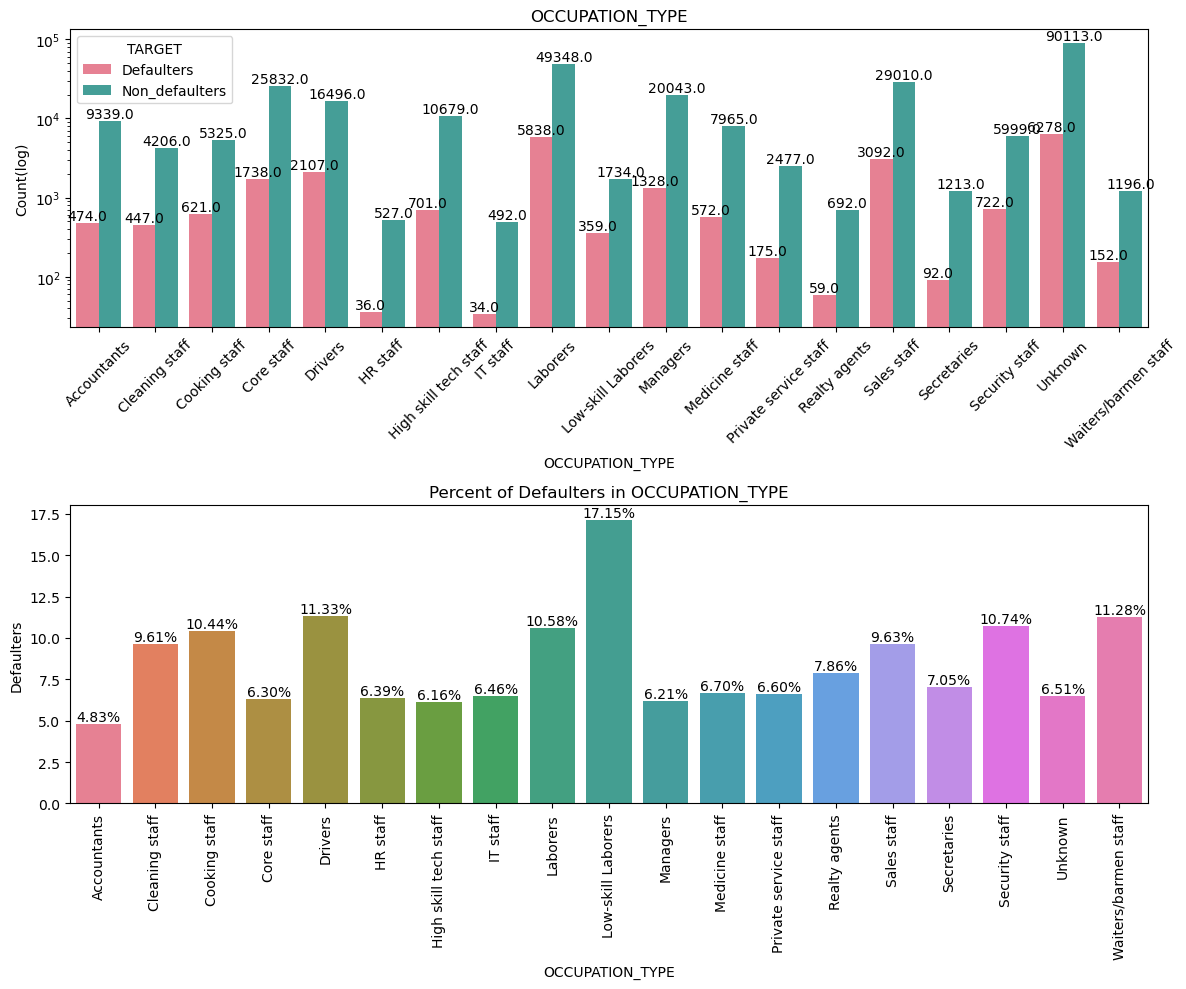

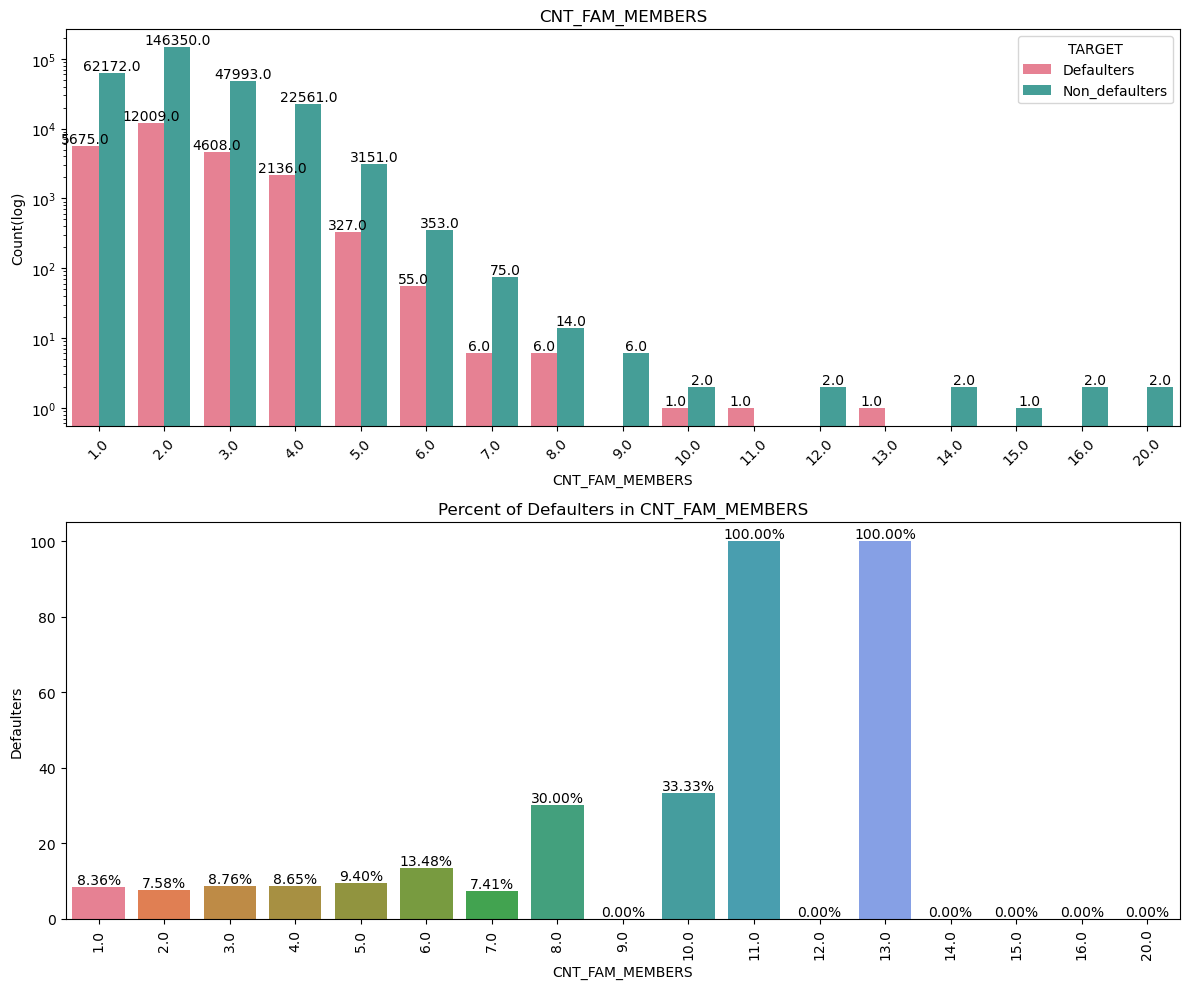

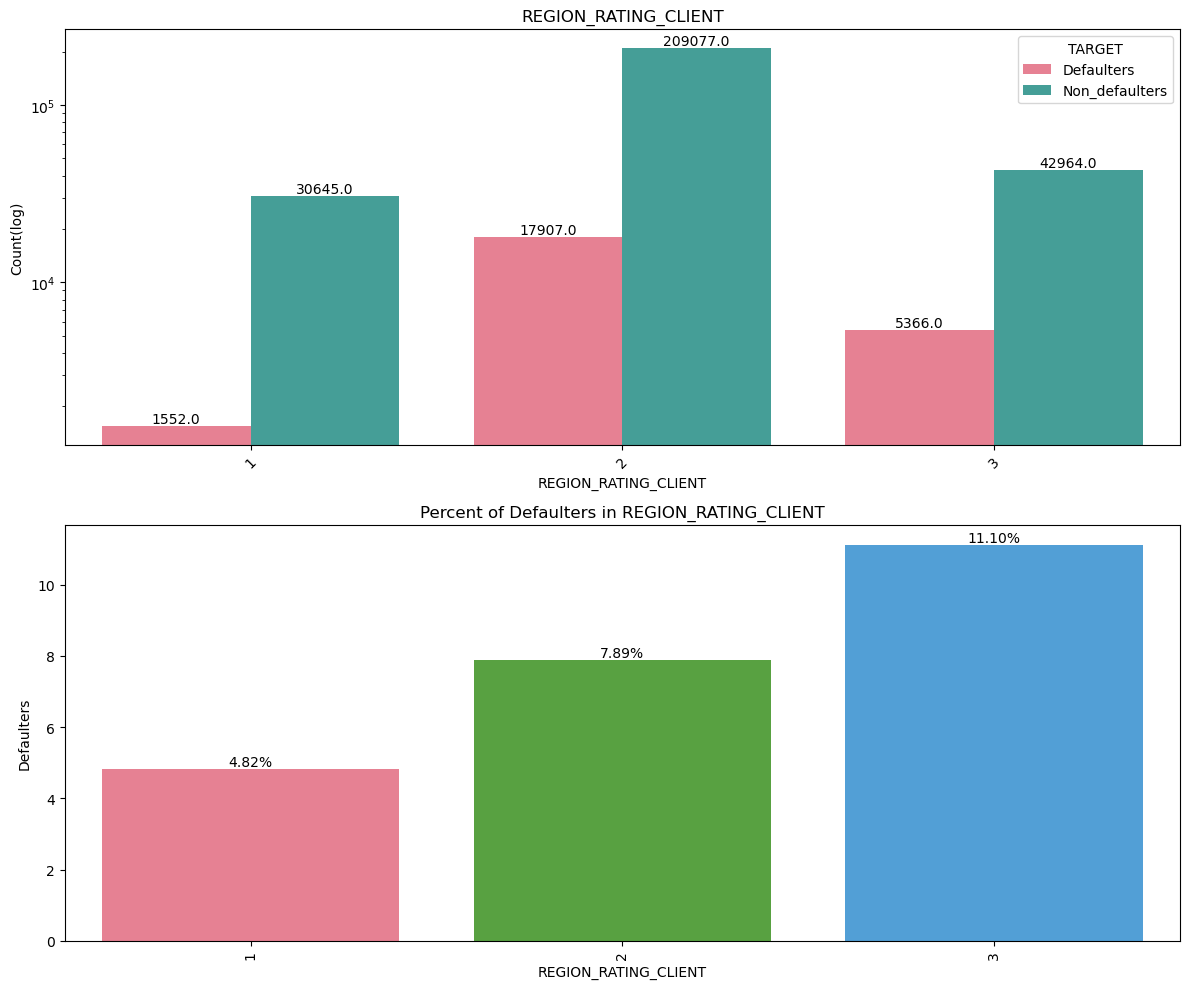

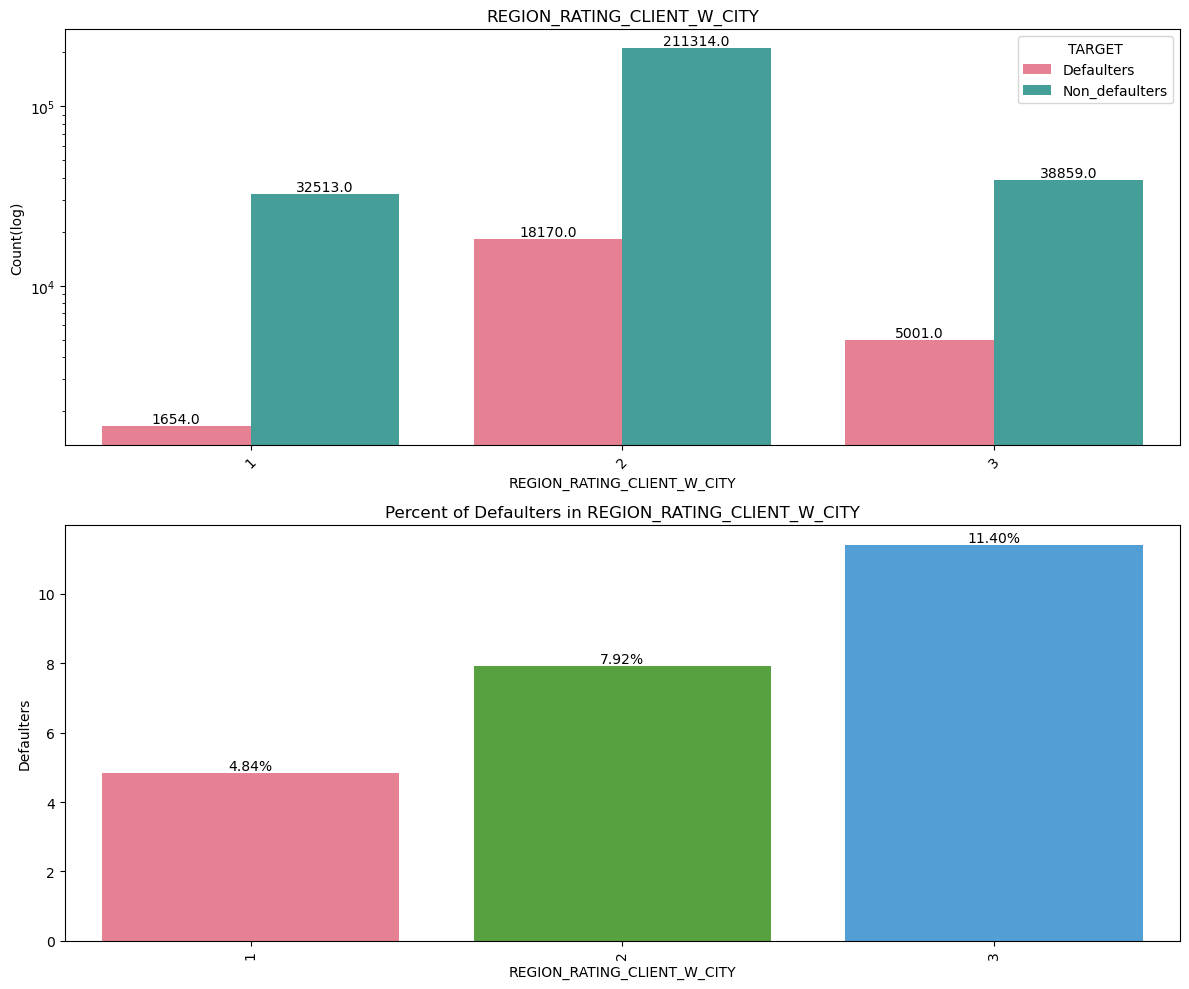

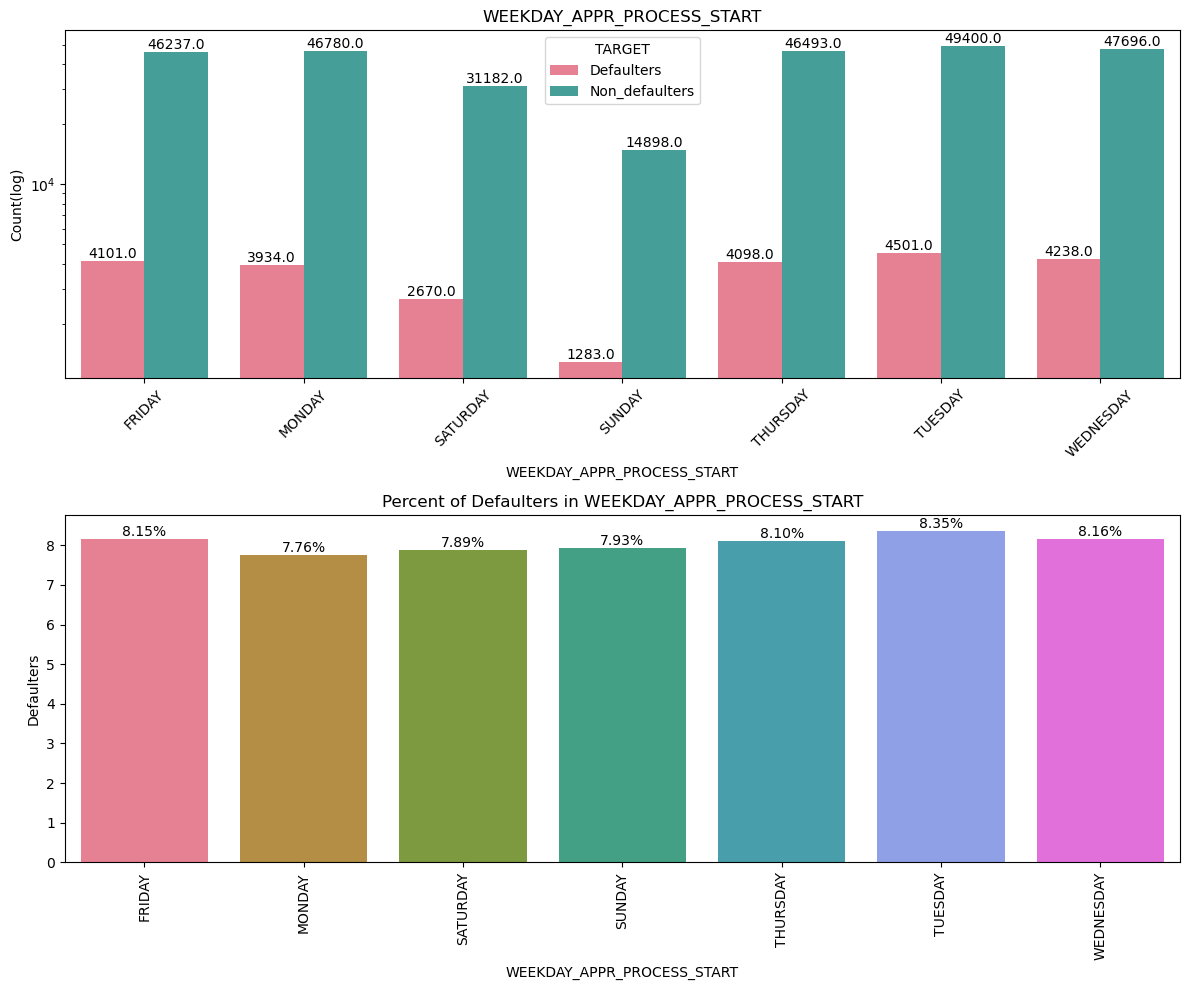

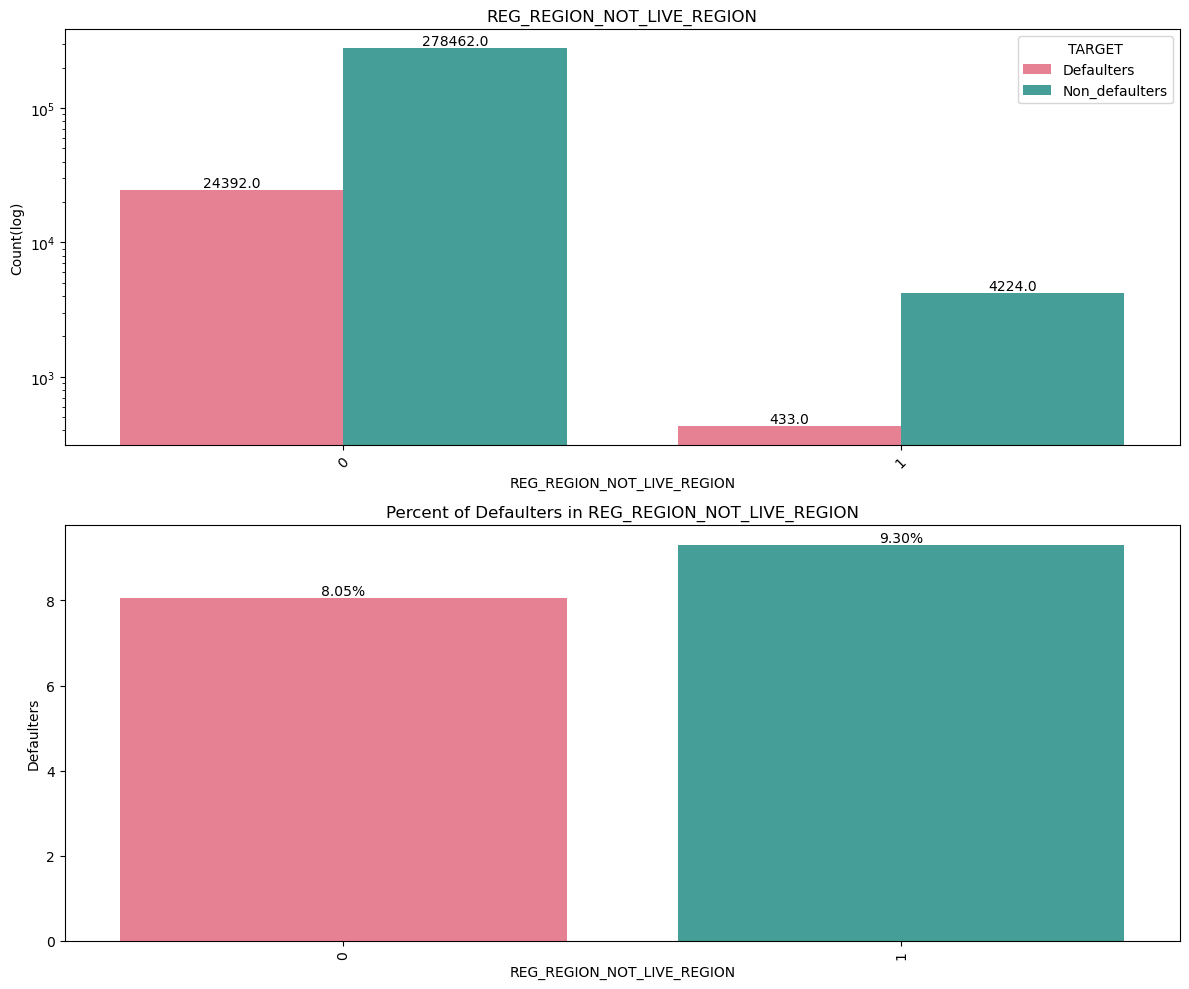

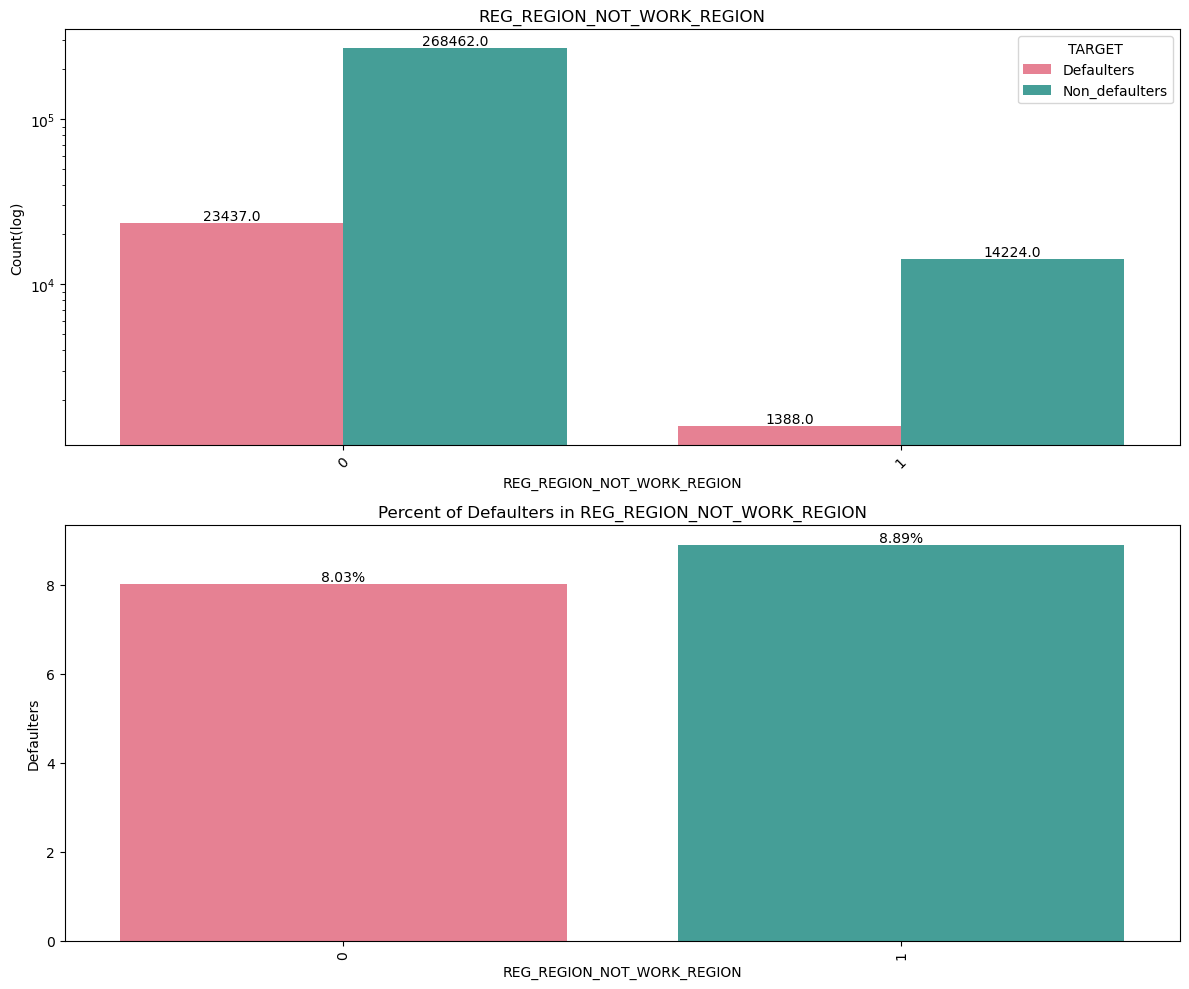

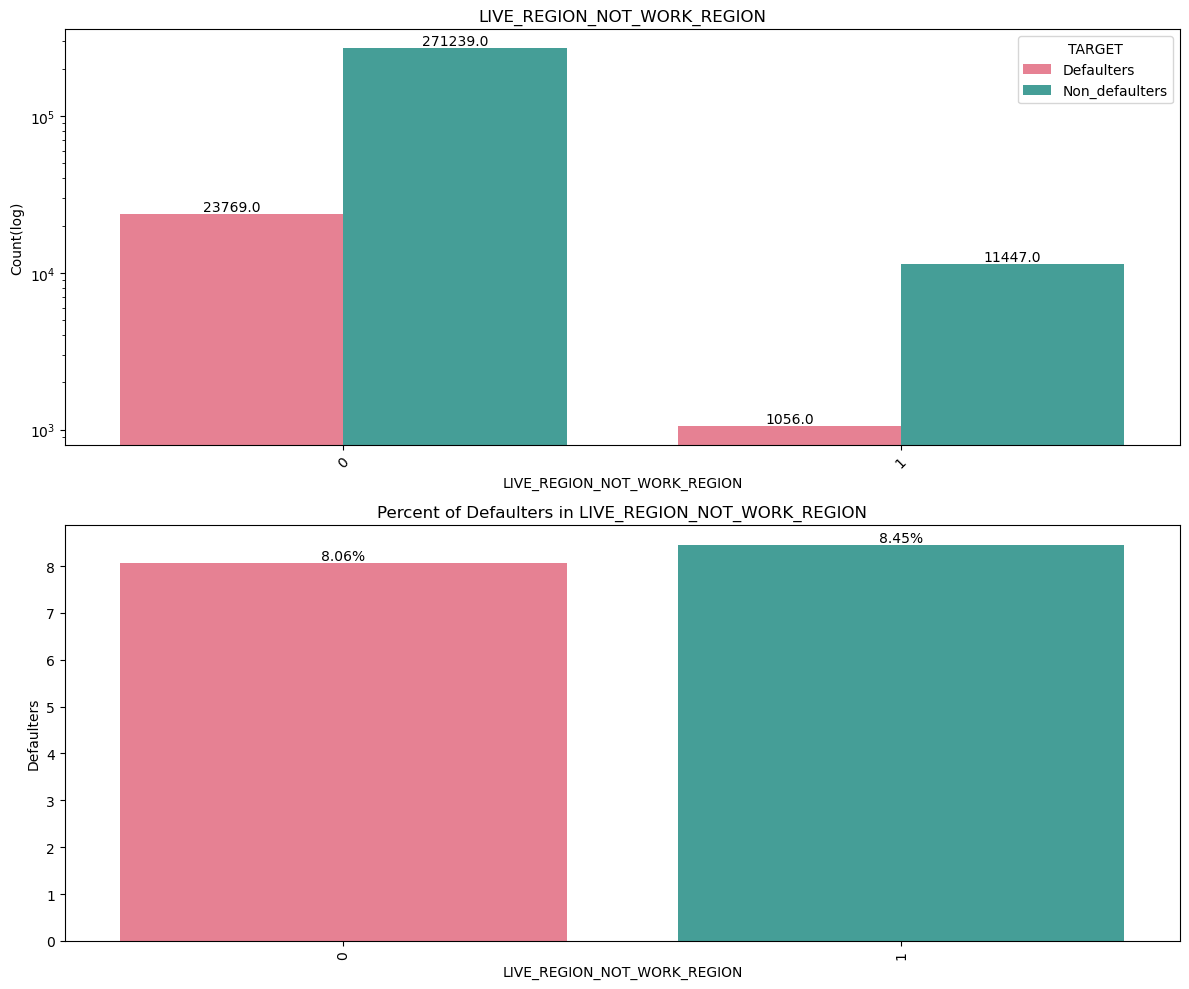

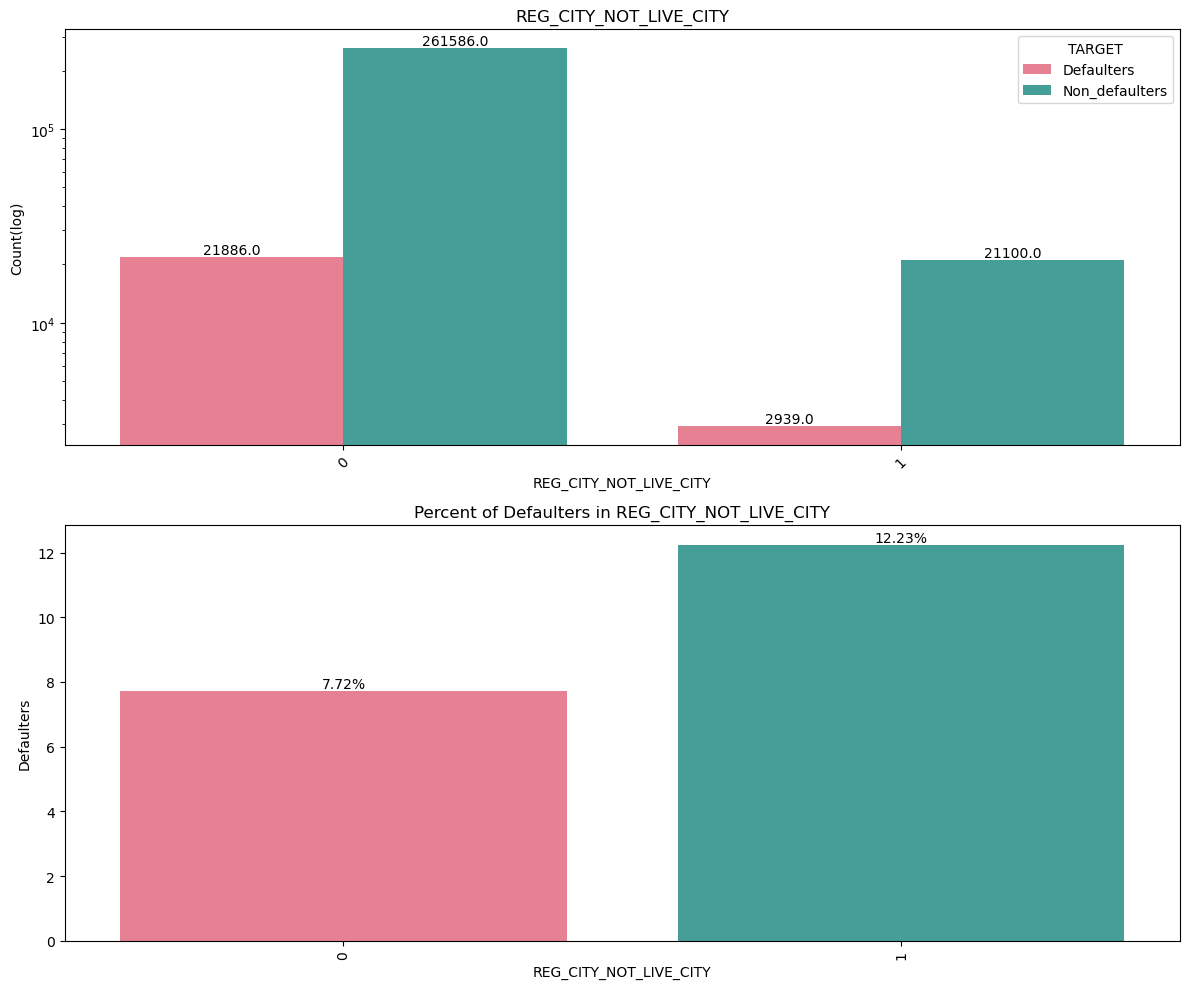

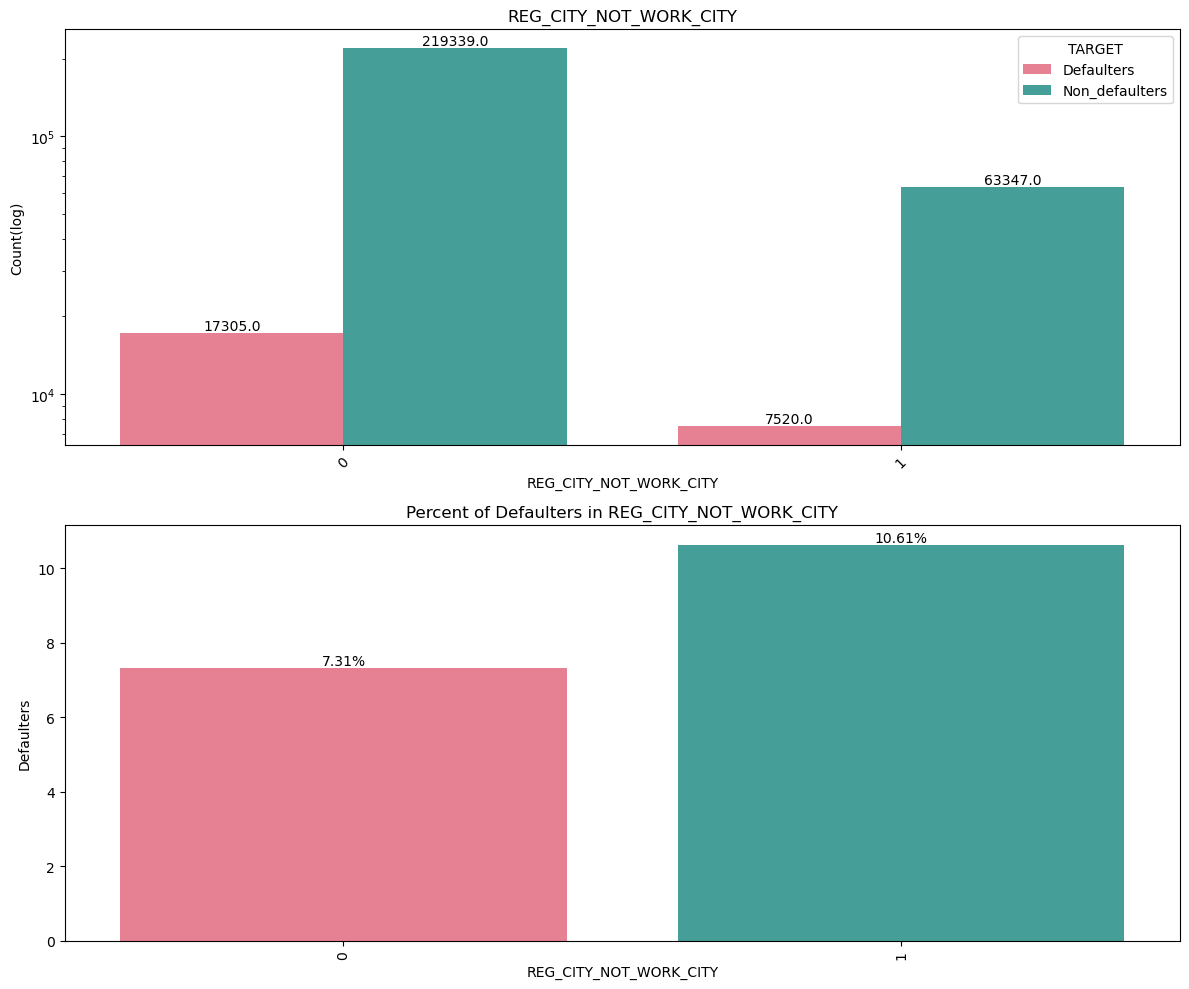

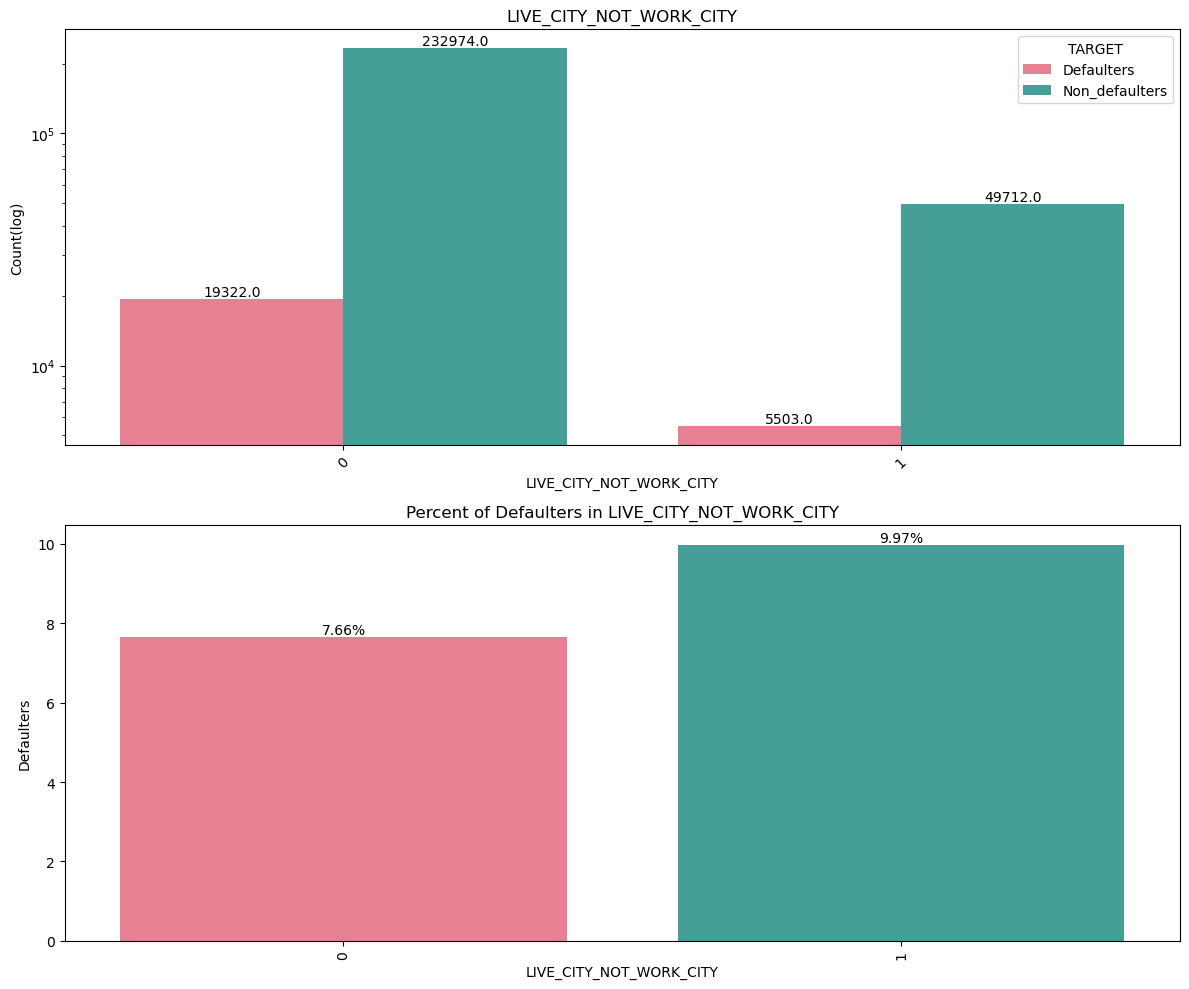

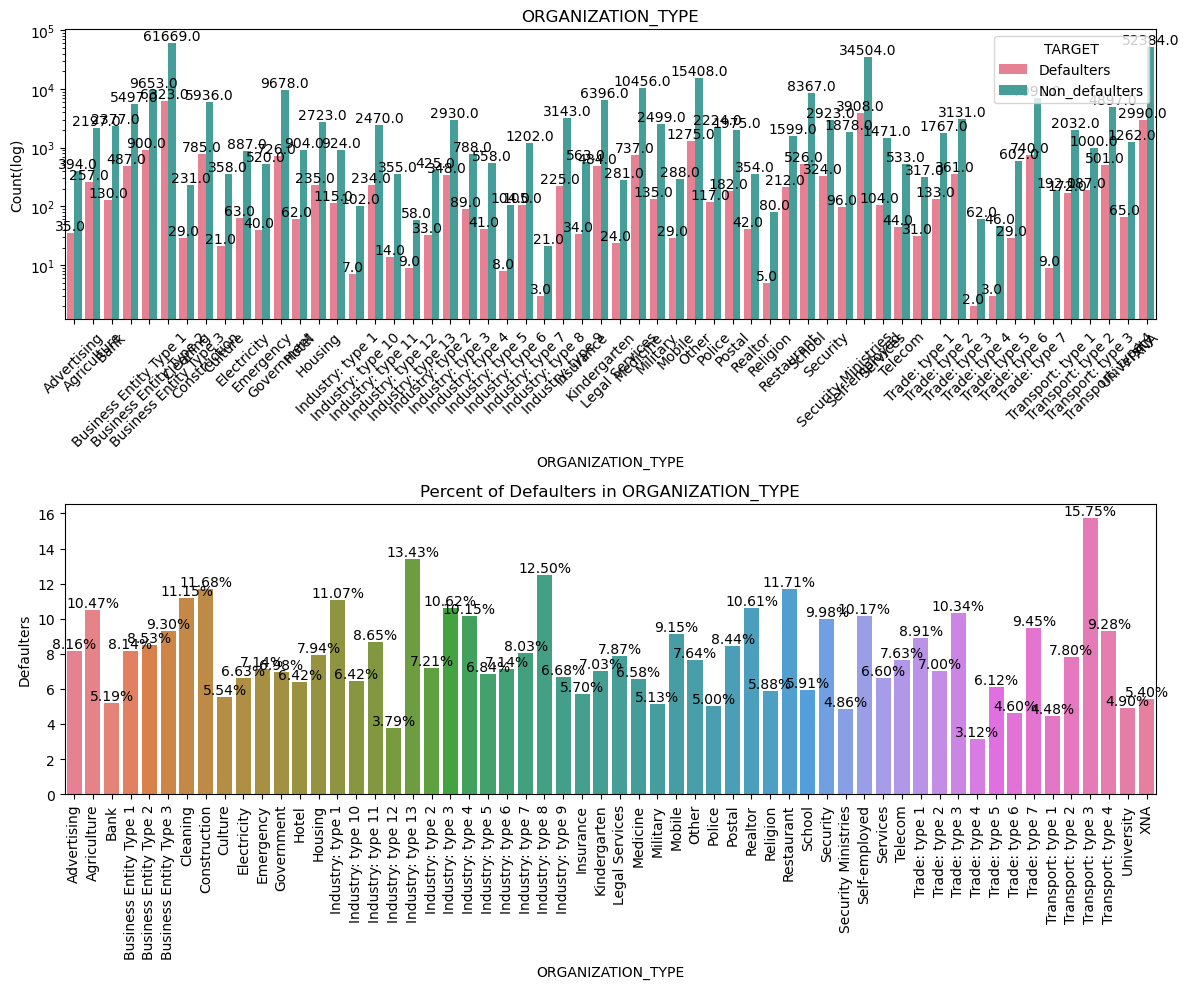

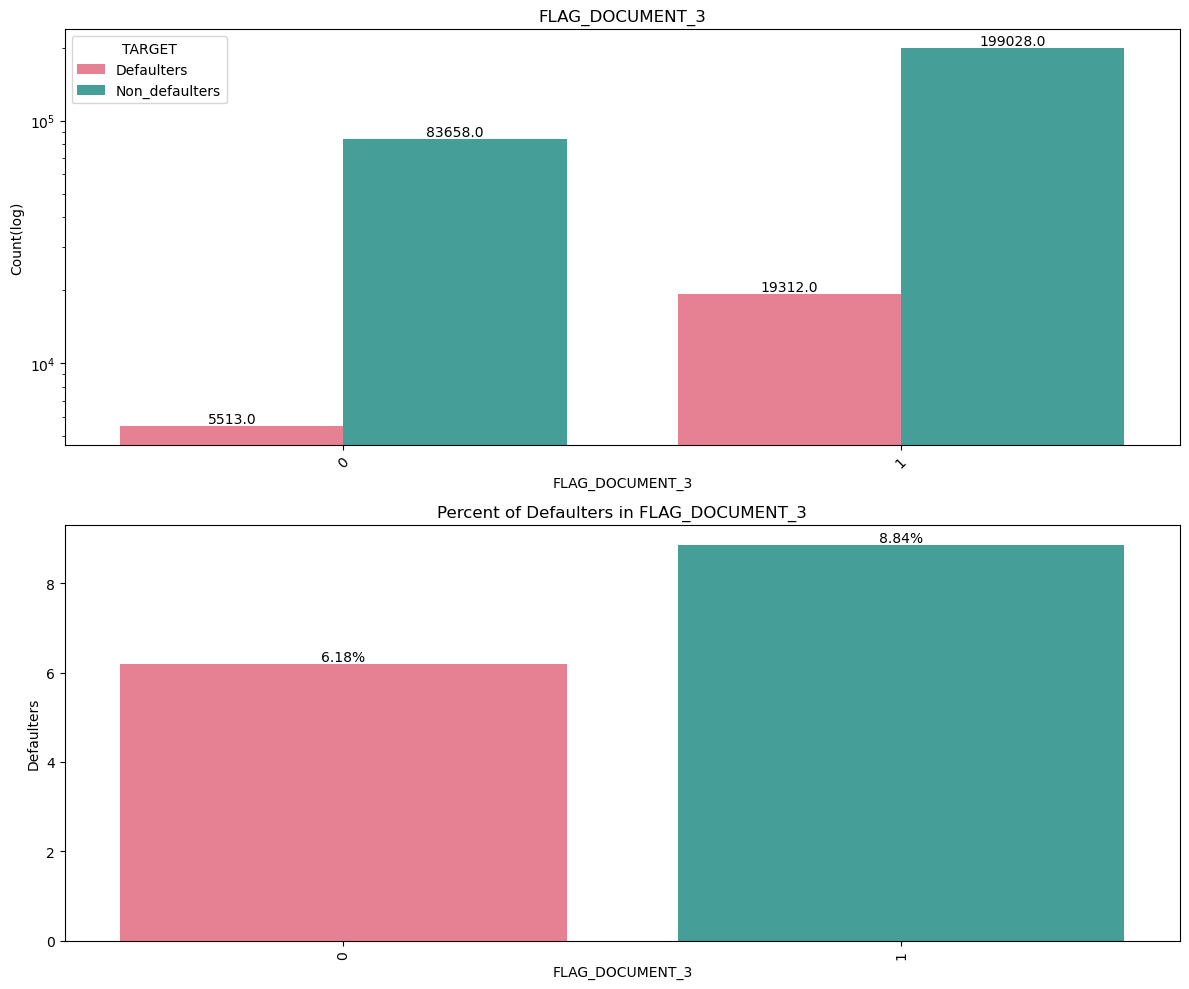

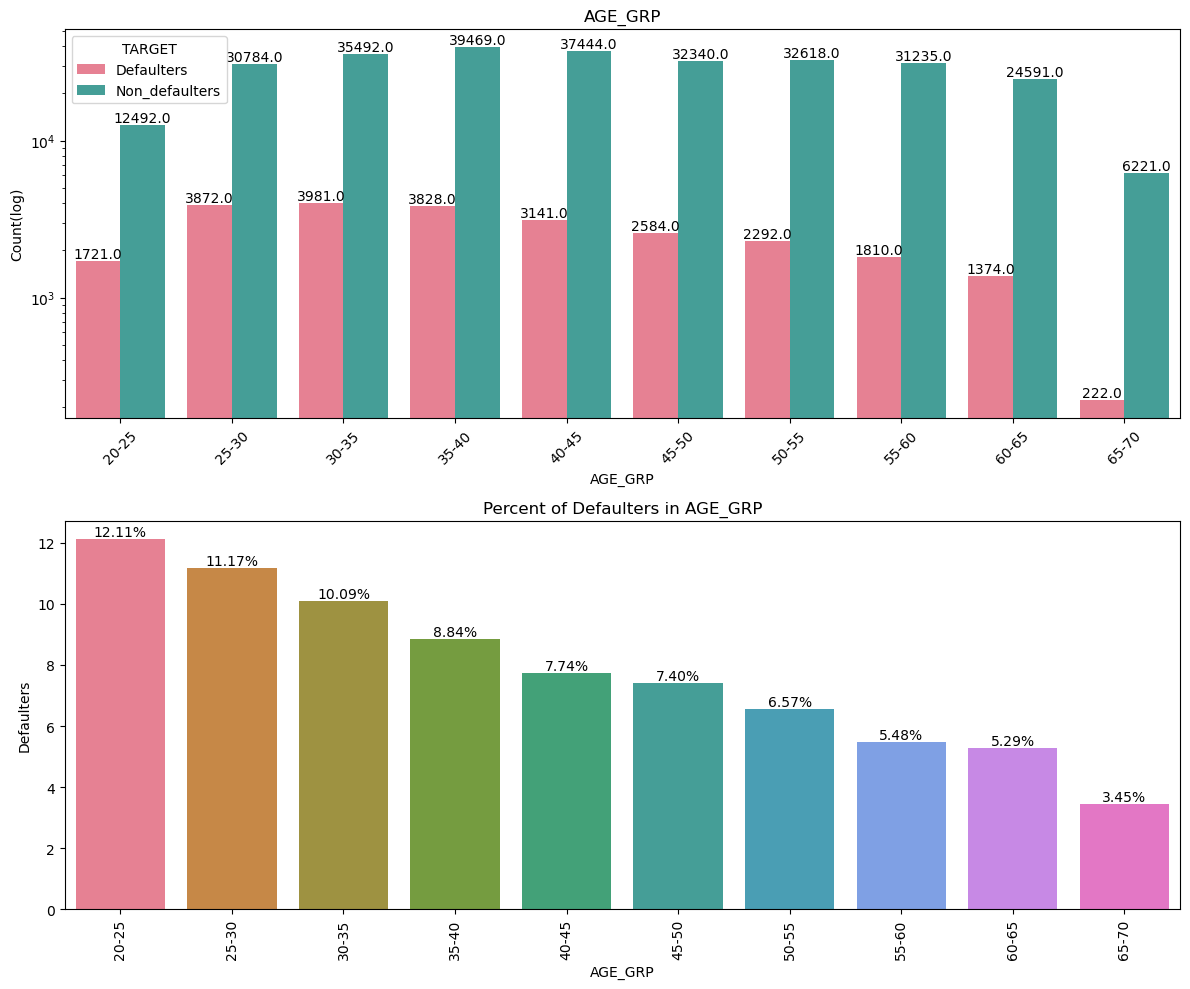

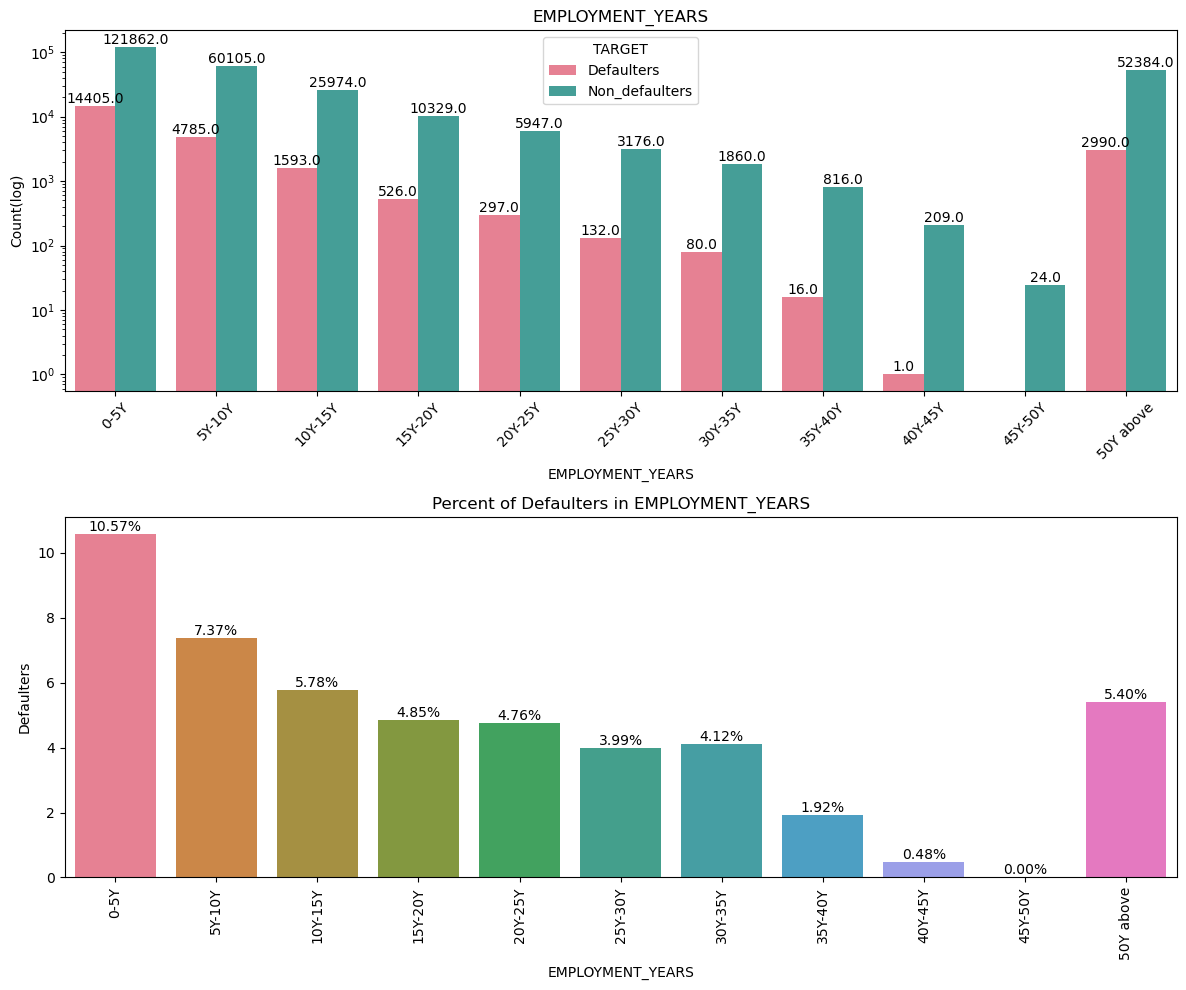

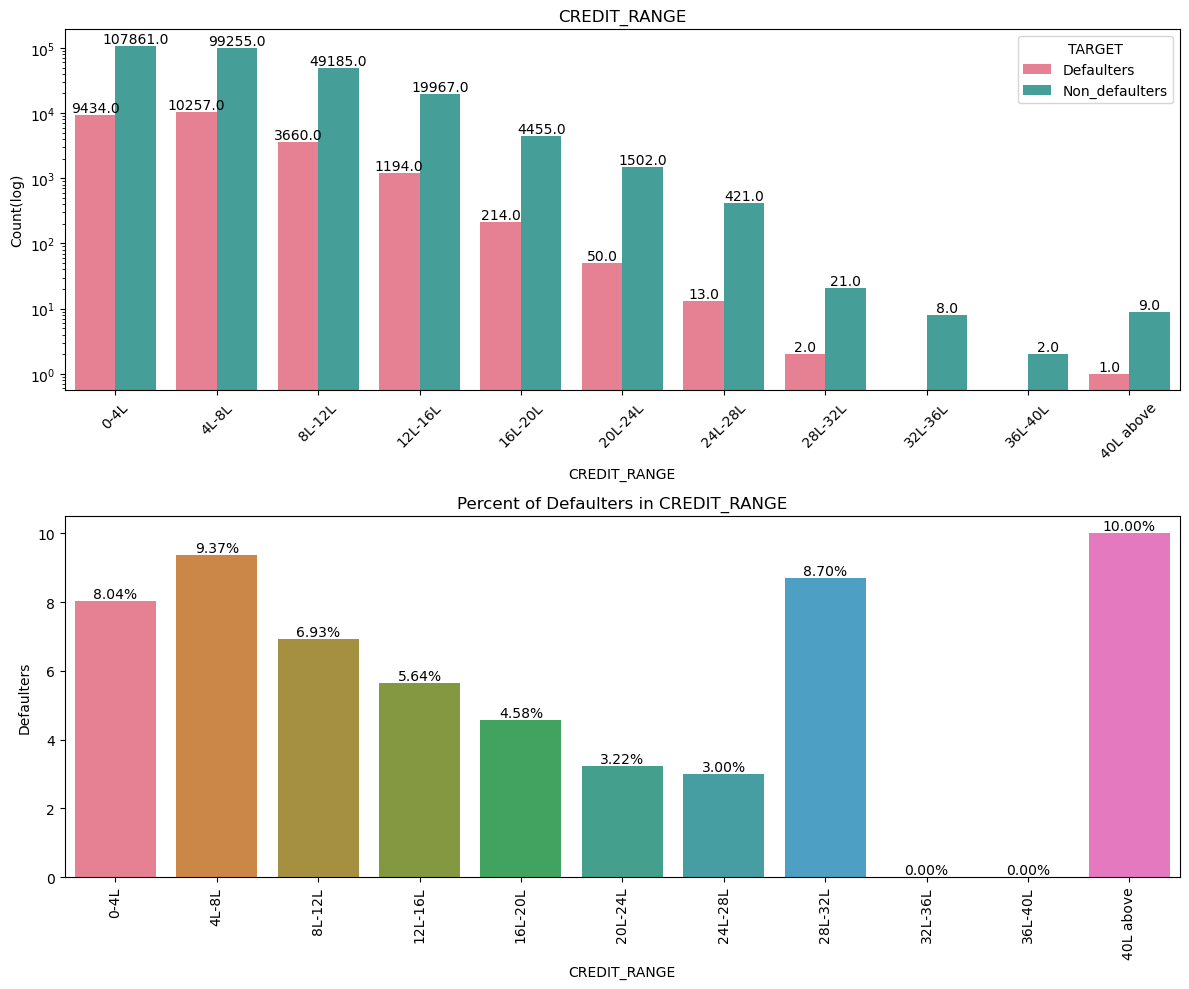

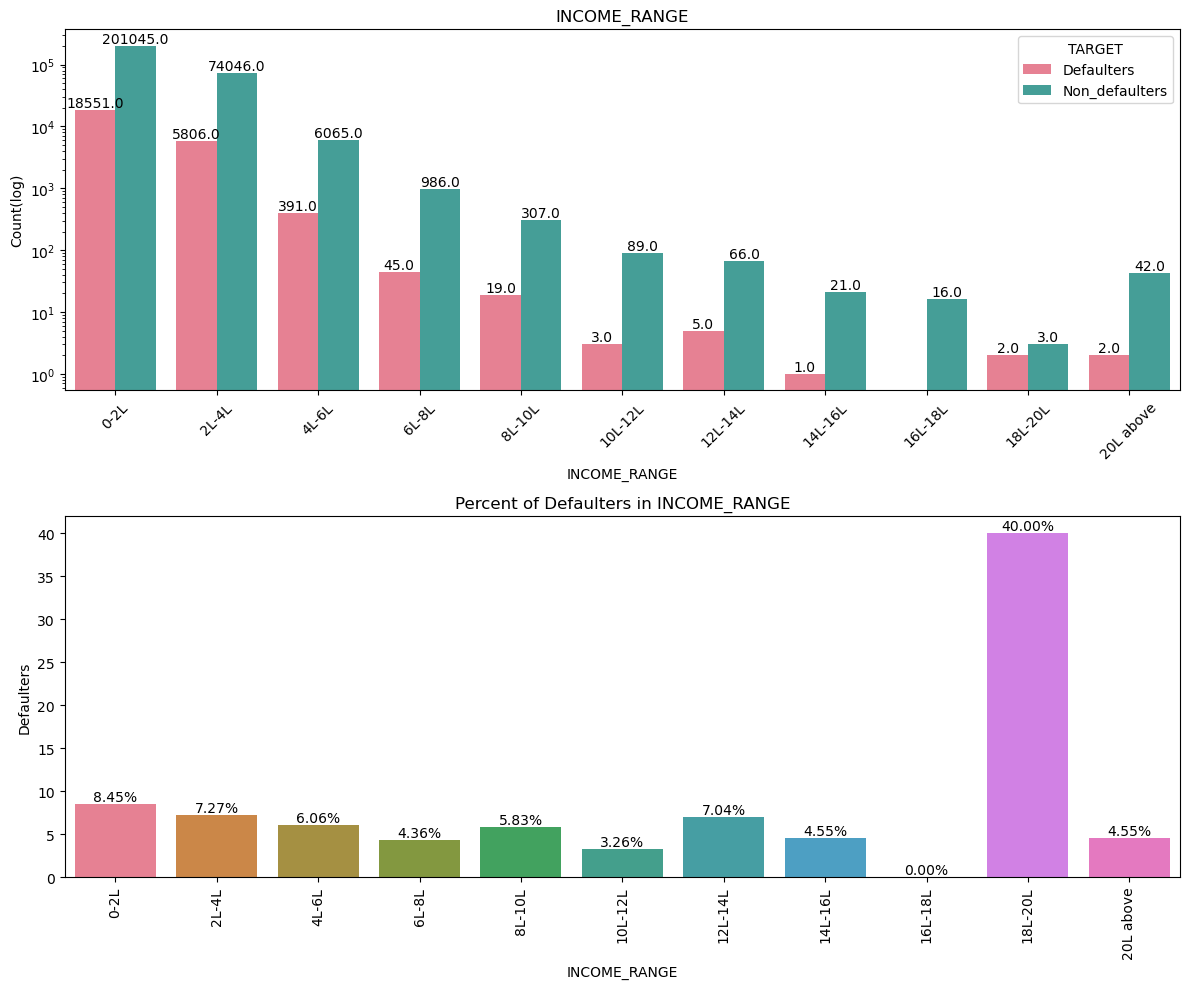

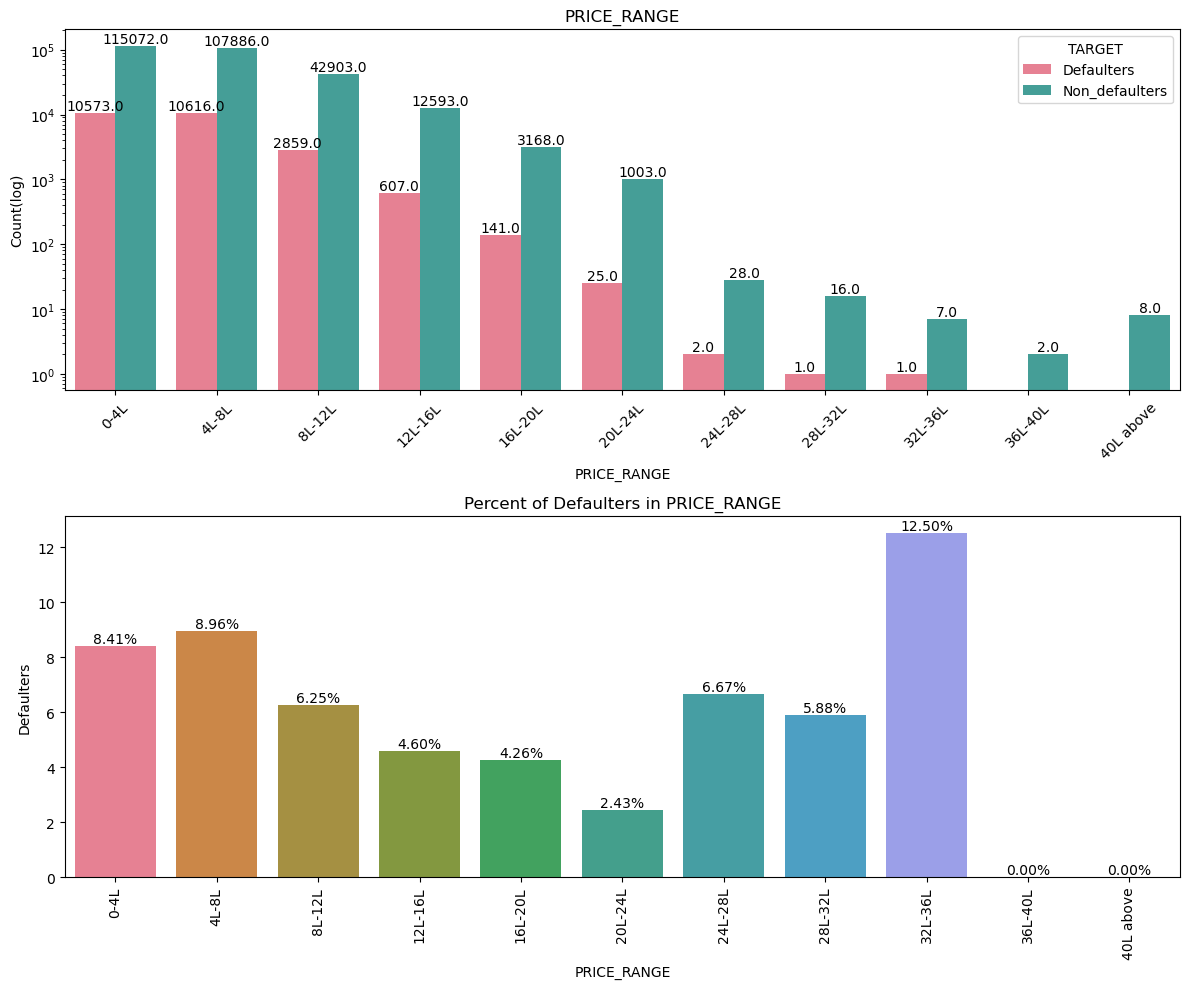

In [93]:
for i, cols in enumerate(cat_df.columns):
    univar_analysis(cat_df, cols)


Observations from univariate analysis of categorical columns:
- Most loans were of Cash type. 8.35% of the cash loans and 5.5% of revolving loan applicants turned out to be Defaulters.
- Number of Female clients were higher than Males. While most non-defaulters were females, 10% of the defaulters were male.
- Most non-defaulters were recorded to be clients who owned reality however defaulting percent for clients with and without realty were almost similar.
- We can observe a steady descrease in number of non-defaulting clients as the number of children increases with maximum non-defaulting clients having no children. At the same time, the defaulting rate is seen incresing with increase in children count, with clients with 10 or 13 children having almost 100% rate of defaulting. 
- Most of the clients were unaccompanied while applying for the loan and maxinmum defaulting rate was observed for other B.
- Working clients were found to have highest non-defaulting rate and clients on maternity leave recorded the highest rate (40%) of defaulting.
- Clients with secondary/secondary special education were highest in number and in terms of non-defaluters whereas clients having Lower secondary education were found with maximum defaulting rate of around 11% and lowest defaulters were recorded for clients having an Academic degree.
- Most clients were recorded to be Married while most defaulters were found to be clients who were in civil marriage and single. 
- Clients who lived in house/apartments were maximum in terms of loan applicants and non-defaulters whereas those who lived in rented apartments showed maximum rate of defaulting, around 12.3%, followed closely by those who lived with their parents (11.7%) compared to other defaulters.
- Almost all the applicants owned mobile phones so it doesn't contribute much to the rate of defaulting.
- Most of the clients had provided work phones however the defaulting rate for both were similar so this do not add much to the analysis.
- Most loan applicants, out of the knowns, were Labourers and the maximum default rate was recorded for low-skilled labourers(17.2%). Accountants had the lowest defaulting rate.
- With increase in number of family members there's a visible decrease in number of loan applicants and increase in defaulting rates, with clients having 11 or 13 family memebers almost 100% turning out be defaulters.
- Clients with region rating of 2 were highest in number and in terms of non-defaulters, however defaulting rate showed an increase with increase in region rating with rating 3 having maximum defaulting rate of 11%.
- Similar results was observed for client region rating with city.
- Except for Saturdays and Sundays, all days of the week recorded almost same number of clients and the defaulting rate fo all days were similar.
- For most of the clients, the permanent address matched their contact address and were non-defaulters however, most defaulters were the clients whose permanent address did not match the contact address.
- Similar results were found for 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',.
- Most clients were in Business Entity Type 3. Clients in Transport: Type 3 turned out to have maximum defaulters- 15.75% followed by Industry:Type 13- 13.43%. Trade:Type 4 and Industry: Type12 had lowest percentage of defaulters.
- Client distribution for all age grounp are almost similar however default rate is highest in the age group 20-25 and decrease steadily.
- Most clients are those with employment years 0-5 and decreases steadily. Similar is the case for defaulters with clients with 0-5 years of employment having maximum default rate of 11% and no defaulters for those in range of 40-45 years.
- Clients seems to decrease as the credit range increases with maximum being in 0-4L range but the maximum defaulters are the ones in credit range above 40L followed by 4-8L.
- The maximum number of loan applicants were the ones with income range of 0-2L and the minimum was 18L-20L. However the maximum default percentage, 40%, was recorded for the clients with income 18L-20L, whereas in 16L-18L range there were no defaulters.
- Maximum clients had goods price in the range 0-8L and minimum in 36L-40L. The default percentage was highest in the 36L-38L range and almost no defaulters for 38L and above price range.

In [94]:
Defaulters = app_dataf[app_dataf['TARGET']==1]
Non_defaulters = app_dataf[app_dataf['TARGET']==0]

Defaulters.drop(columns=['SK_ID_CURR','TARGET','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'AGE', 'YEARS_EMPLOYED'], inplace= True)
Non_defaulters.drop(columns=['SK_ID_CURR','TARGET','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','AGE', 'YEARS_EMPLOYED'], inplace= True)

Univariate Analysis of numerical columns
--

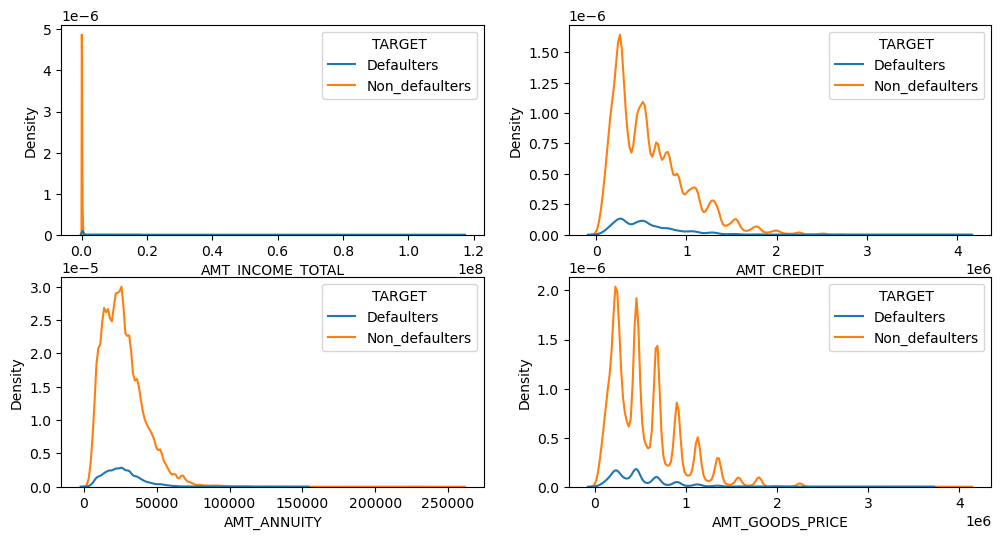

In [95]:
amt_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
df = num_df[amt_cols]
plt.figure(figsize=(12,6))
for i, cols in enumerate(df.columns):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_df, x=cols, hue= 'TARGET')
plt.show()

Observation from univariate analysis of numerical columns:
- Clients with income >10L are mostly defaulters
- The credit amount of the loan in mostly below 10L
- Most of the clients pay annuity amount below 50K
- Maximum number of loan have been recorded for goods price below 10L.

# 3. Bivariate and Multivariate Analysis

<Figure size 1200x1200 with 0 Axes>

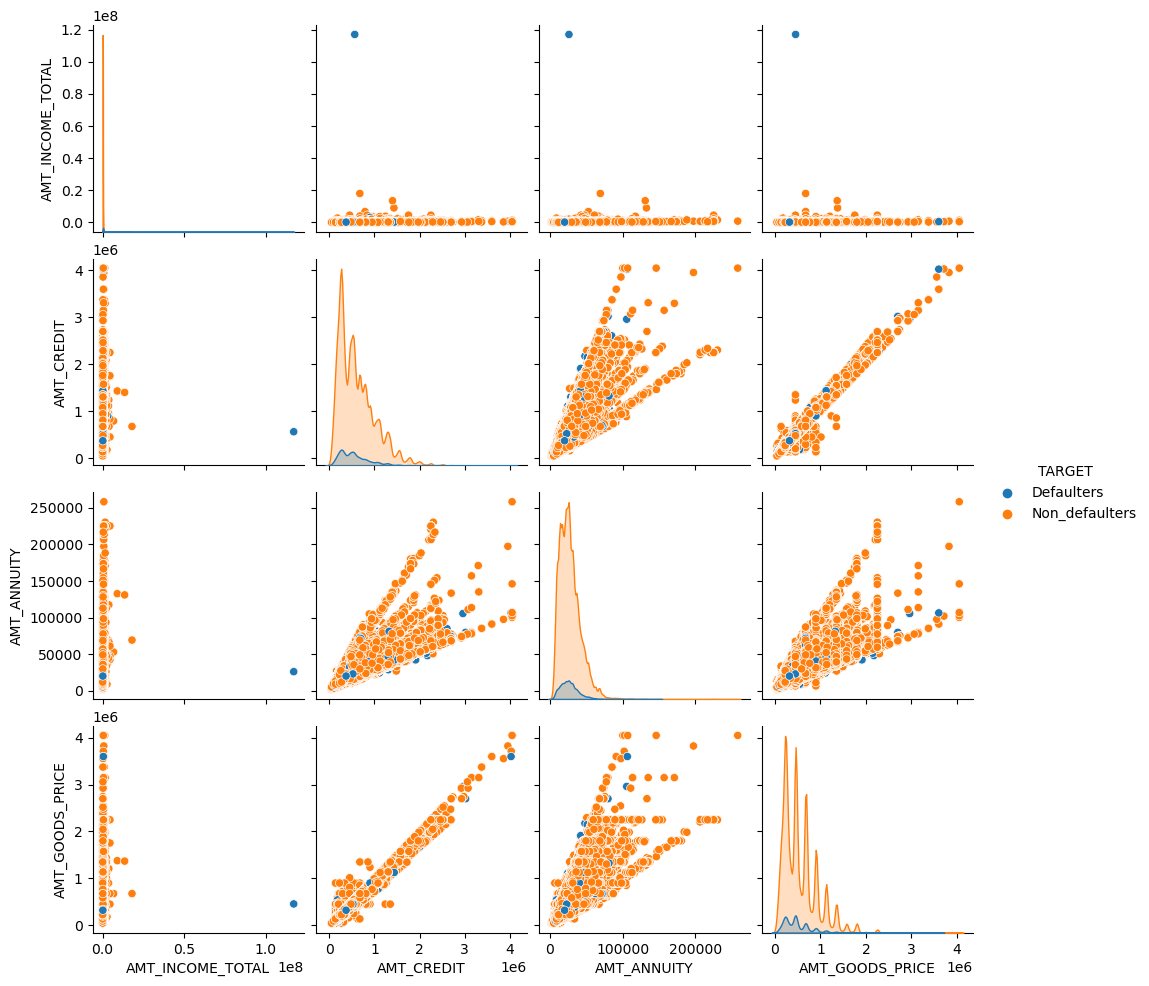

In [96]:
# Plotting a pairplot to get a bird's eye view of the relationship between the different variables
amt_tar_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']
amt_df = num_df[amt_tar_cols]
plt.figure(figsize=(12,12))
sns.pairplot(amt_df, hue='TARGET')
plt.show()

Observations:
- Clients with income >10L are mostly defaulters.
- For Credit and Annuity amount we can see a sort of positive dependency because as the loan credit increased so does the annuity amount, but it shows a dispersion which suggests that the relationship is not perfectly linear.
- However we can observe an almost linear cprrelation between the goods price and the credit amount.
- For the annuity amount below 50K and goods price below 20L there is a linear distribution which seems to disperse beyond that.

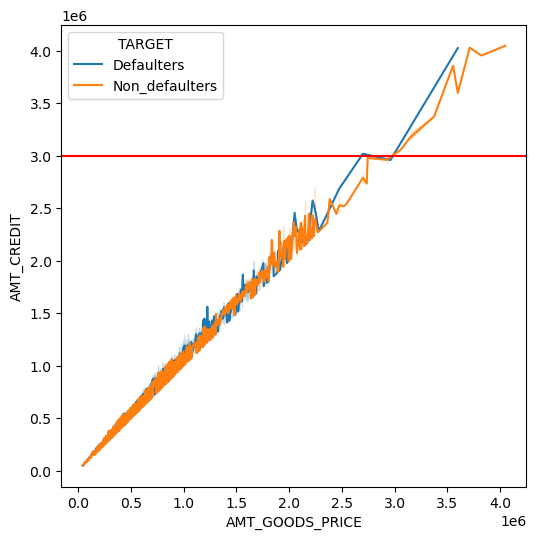

In [97]:
plt.figure(figsize=(6,6))
ax= sns.lineplot(data= num_df, x='AMT_GOODS_PRICE', y= 'AMT_CREDIT', hue= 'TARGET')
plt.axhline(y= 3000000, color='r')
plt.show()

- The number of defaulters in observed to increase as the credit amount goes beyond 30L.

In [98]:
cat_df.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'AGE_GRP', 'EMPLOYMENT_YEARS',
       'CREDIT_RANGE', 'INCOME_RANGE', 'PRICE_RANGE'],
      dtype='object')

In [99]:
num_df.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE',
       'YEARS_EMPLOYED'],
      dtype='object')

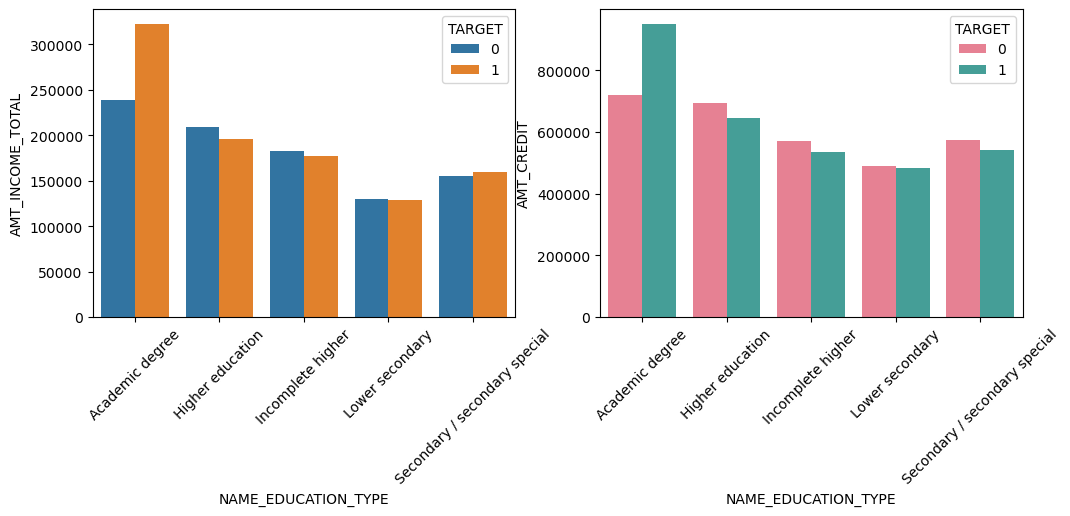

In [100]:
# Multivariate analysis between income, credit and education type of clients
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax= sns.barplot(app_dataf, x='NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue= 'TARGET', ci=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45 )

plt.subplot(1,2,2)
bx= sns.barplot(app_dataf, x='NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', hue= 'TARGET', ci=0, palette='husl')
bx.set_xticklabels(ax.get_xticklabels(), rotation= 45 )

plt.show()

- Most loan applicants have an Academic degree. Among such clients those with income > 2.4L and credit > 7L are found to be defaulters.  


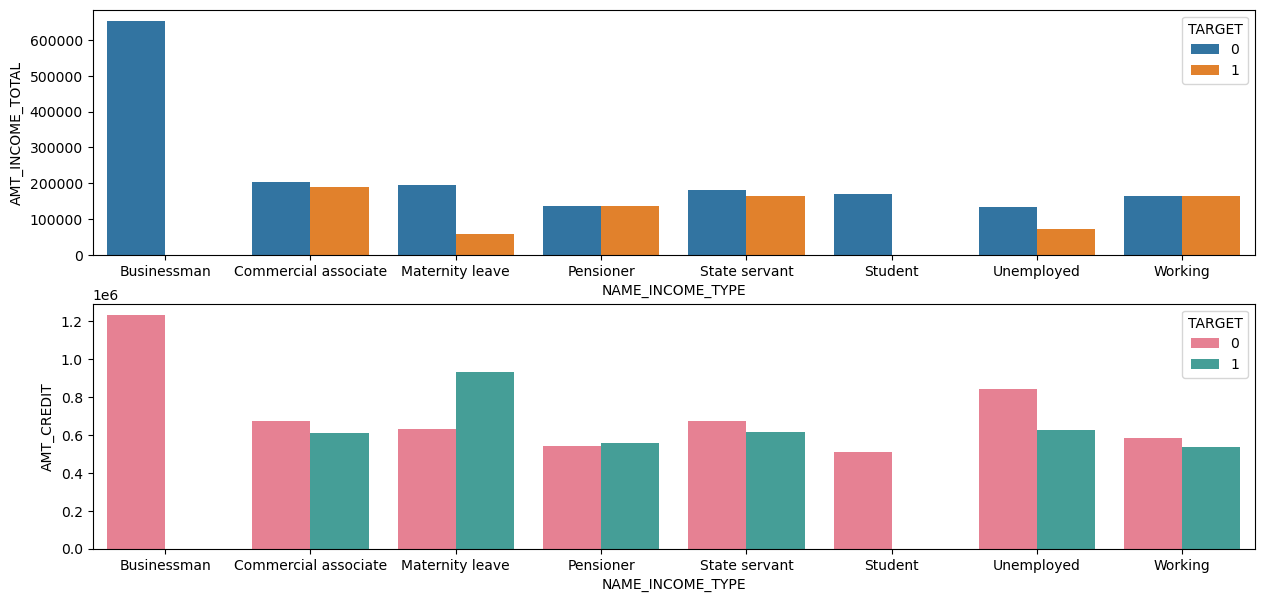

In [101]:
# Multivariate analysis between income, credit and income type of clients
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
ax= sns.barplot(app_dataf, x='NAME_INCOME_TYPE', y = 'AMT_INCOME_TOTAL', hue= 'TARGET', ci=0)

plt.subplot(2,1,2)
bx= sns.barplot(app_dataf, x='NAME_INCOME_TYPE', y = 'AMT_CREDIT', hue= 'TARGET', ci=0, palette='husl')

plt.show()

- Both income and credit amount for Businessman is highest and without any defaulters. 
- For students as well there are no defaulters.
- In all other cases if the credit amount goes beyond 6L the defaulting rate increases.

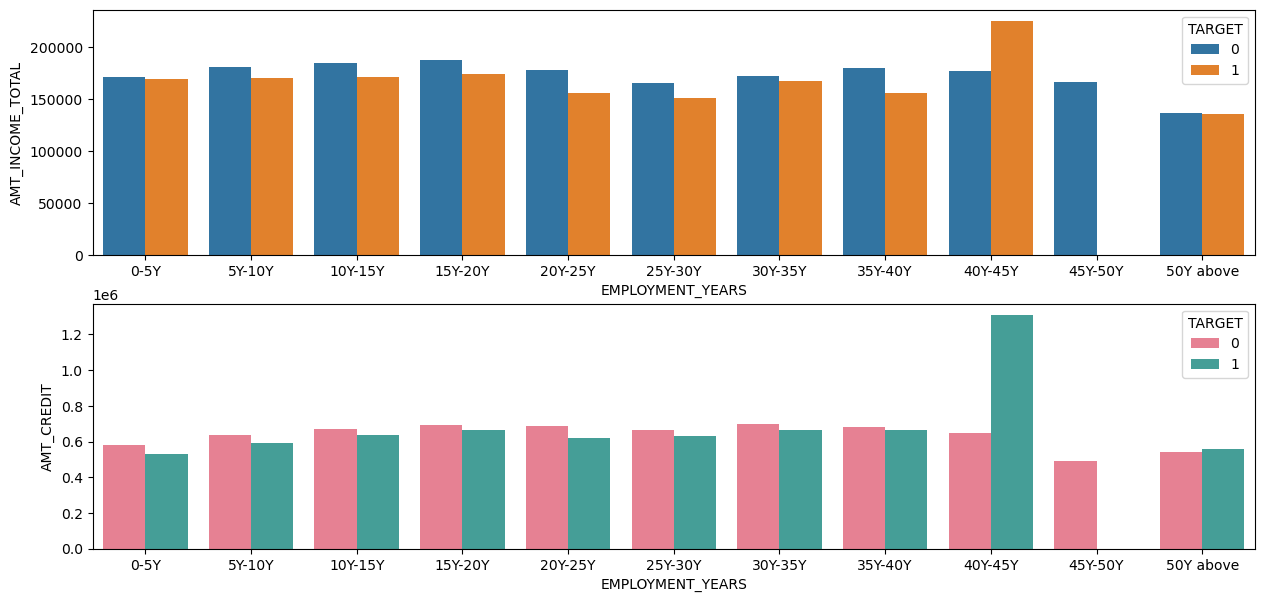

In [128]:
# Multivariate analysis between income, credit and employment years of clients
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
ax= sns.barplot(app_dataf, x='EMPLOYMENT_YEARS', y = 'AMT_INCOME_TOTAL', hue= 'TARGET', ci=0)

plt.subplot(2,1,2)
bx= sns.barplot(app_dataf, x='EMPLOYMENT_YEARS', y = 'AMT_CREDIT', hue= 'TARGET', ci=0, palette='husl')

plt.show()

- Maximum defaulters are found to be clients with 40-45 years of employment and income more than 2L. These clients are also the most defaulting when the credit amount is > 6L.
- There are no defaulters for clients with 45-50Y of employment.

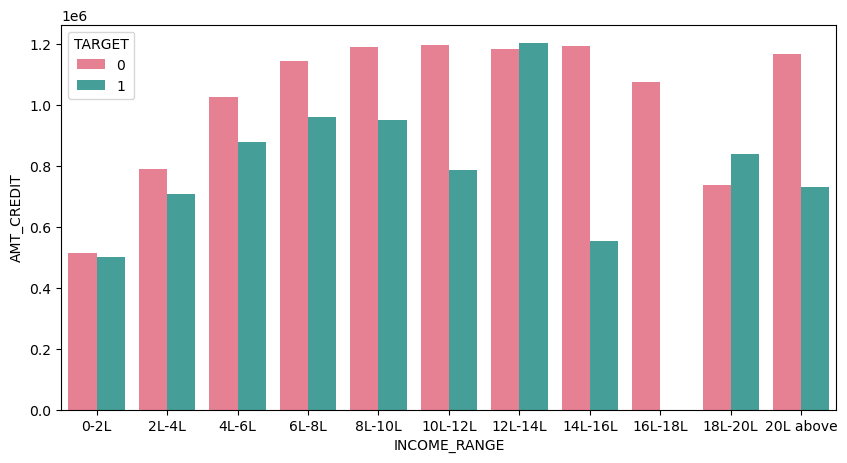

In [129]:
# Multivariate analysis between income, credit and employment years of clients
plt.figure(figsize=(10,5))
bx= sns.barplot(app_dataf, x='INCOME_RANGE', y = 'AMT_CREDIT', hue= 'TARGET', ci=0, palette='husl')

plt.show()

- Most credit amount is given to clients with income range of 8-16L.
- Most defaulters are those with income range of 12-14L and credit > 10L.

# 3. Correlation Analysis

In [130]:
# Defining a function to find out top 10 correlations
def top_10_corr(df):
    z = df.corr().where(np.triu(np.ones_like(df.corr()), k=1).astype(np.bool)).unstack().reset_index()
    z.columns= ['var1', 'var2', 'corr']
    z.dropna(subset='corr', inplace=True)
    z['corr']=z['corr'].abs()
    return z.sort_values(by='corr', ascending=False).head(10)

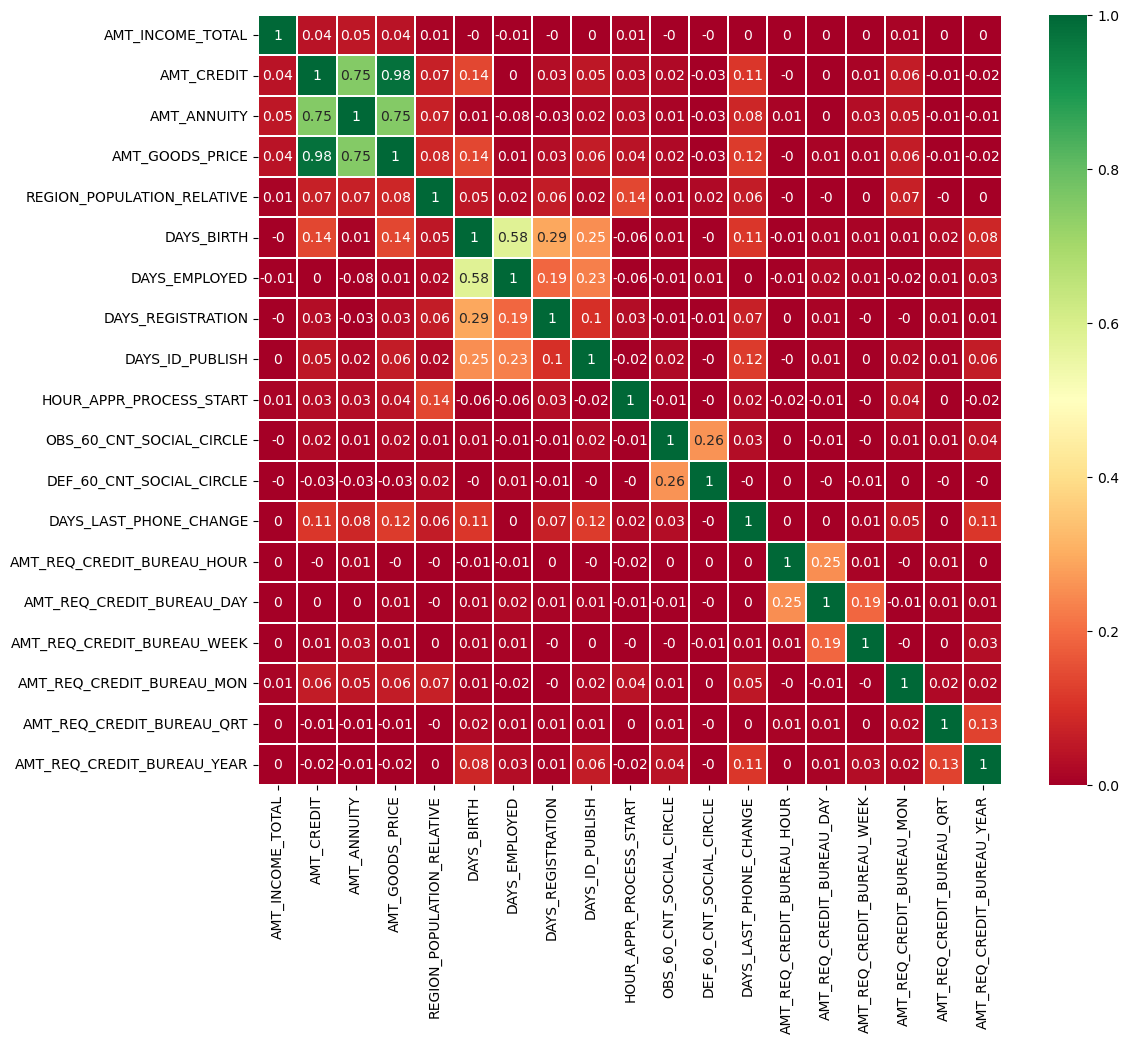

In [131]:
#Plotting correlation heatmap for Defaulters
plt.figure(figsize=(12,10))
sns.heatmap(round(Defaulters.corr(),2), cmap='RdYlGn', linewidth= 0.2, vmin=0, vmax=1, annot= True)
plt.show()

- There is a high correlation between 'AMT_CREDIT', 'AMT_ANNUITY' and 'AMT_GOODS_PRICE' in case of Defaulters.

In [132]:
top_10_corr(Defaulters)

var1                        var2      corr
58             AMT_GOODS_PRICE                  AMT_CREDIT  0.982783
59             AMT_GOODS_PRICE                 AMT_ANNUITY  0.752295
39                 AMT_ANNUITY                  AMT_CREDIT  0.752195
119              DAYS_EMPLOYED                  DAYS_BIRTH  0.582185
138          DAYS_REGISTRATION                  DAYS_BIRTH  0.289114
219   DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE  0.264357
157            DAYS_ID_PUBLISH                  DAYS_BIRTH  0.252863
279  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  0.247511
158            DAYS_ID_PUBLISH               DAYS_EMPLOYED  0.229090
139          DAYS_REGISTRATION               DAYS_EMPLOYED  0.192455

<Axes: >

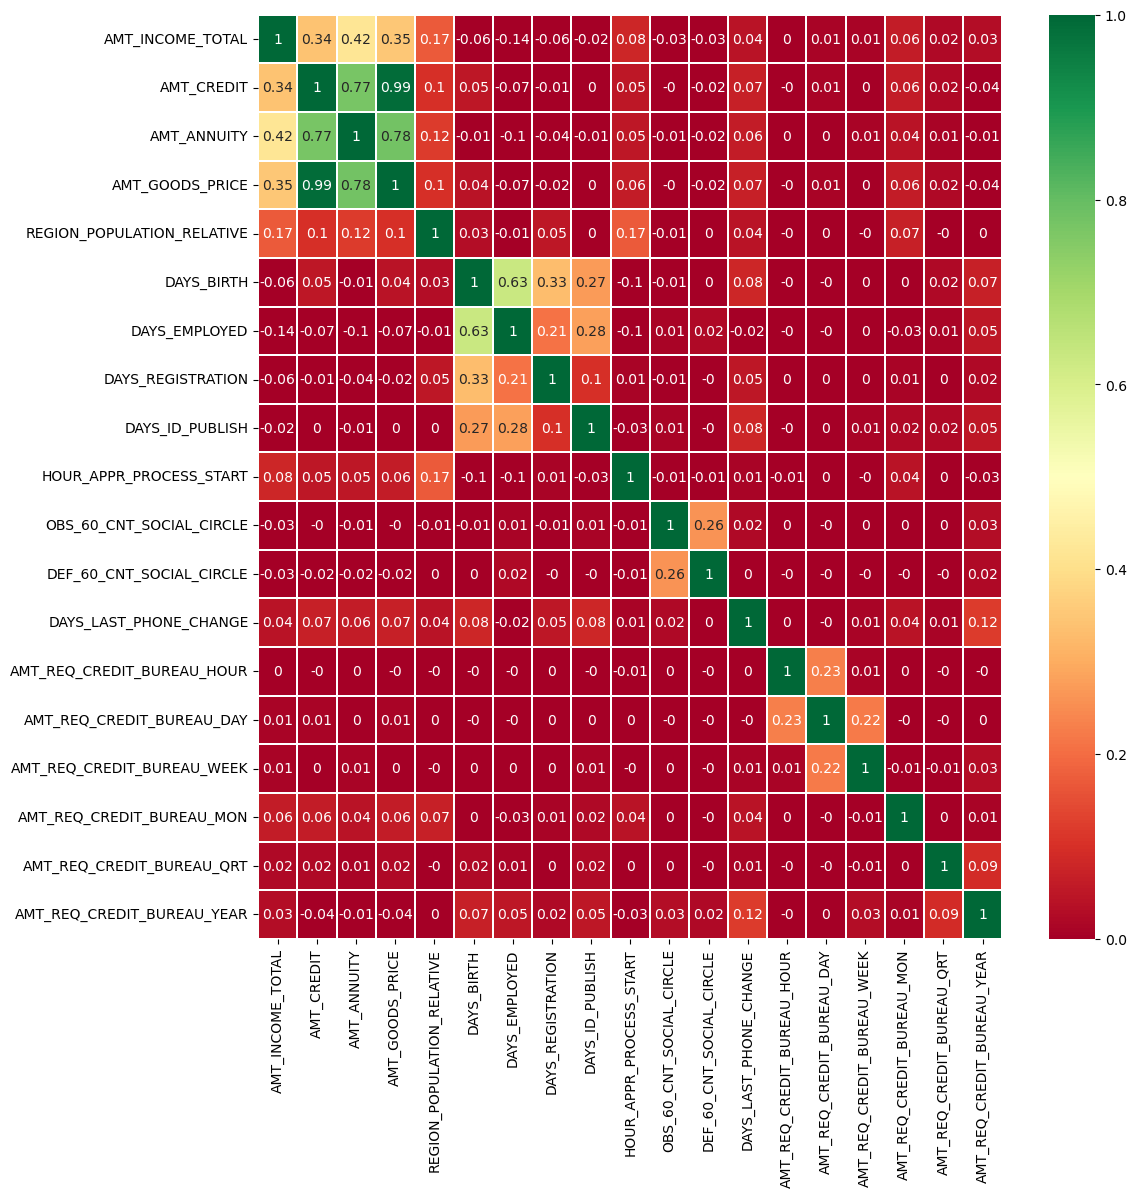

In [133]:
# PLotting a correlation heatmap for Non_defaulters
plt.figure(figsize=(12,12))
sns.heatmap(round(Non_defaulters.corr(),2), cmap='RdYlGn', linewidth= 0.2, vmin=0, vmax=1, annot= True)

Observations from correlation analysis for Defaulters and Non-defaulters:
- The correlation between 'AMT_CREDIT', 'AMT_ANNUITY' and 'AMT_GOODS_PRICE' is high in case of Non-defaulters as well however the correlation between Credit and Annuity in this case is slightly more compared to that in case of Defaulters suggesting that there is a more linear relationship between credit and annuity in case of non-defaulters.
- Non-defaulters have higher correlation to days employed than the defaulters suggesting that people who are employed for longer period are more likely to pay off their loans.  
- We can also see a higher correlation between income of the client and the credit and annuity amount for non-defaulters (0.35) compared to that of defaulters (0.05). 

In [134]:
top_10_corr(Non_defaulters)

var1              var2      corr
58     AMT_GOODS_PRICE        AMT_CREDIT  0.987022
59     AMT_GOODS_PRICE       AMT_ANNUITY  0.776421
39         AMT_ANNUITY        AMT_CREDIT  0.771297
119      DAYS_EMPLOYED        DAYS_BIRTH  0.626114
38         AMT_ANNUITY  AMT_INCOME_TOTAL  0.418949
57     AMT_GOODS_PRICE  AMT_INCOME_TOTAL  0.349426
19          AMT_CREDIT  AMT_INCOME_TOTAL  0.342799
138  DAYS_REGISTRATION        DAYS_BIRTH  0.333151
158    DAYS_ID_PUBLISH     DAYS_EMPLOYED  0.276663
157    DAYS_ID_PUBLISH        DAYS_BIRTH  0.271314

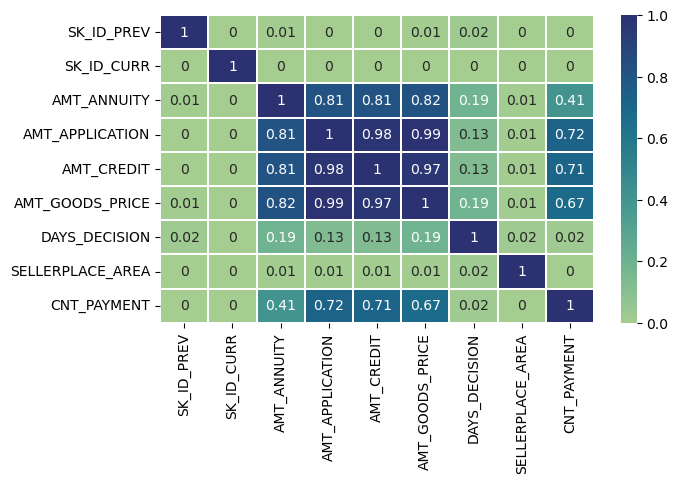

In [135]:
# Correlation analysis of prev_application dataset variables:

plt.figure(figsize=(7,4))
sns.heatmap(round(abs(prev_appf.corr()),2), vmin=0, vmax=1, annot= True, cmap='crest', linewidth=0.2)
plt.show()

- There is positive correlation among annuity, application amount, credit and goods price.
- Apart from that payment count is also closely correlated to application amount, credit and goods price. 

In [136]:
prev_appf.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [137]:
def univar_analysis2(df,var):
    plt.figure(figsize=(10,5))
    ax= sns.countplot(df, x= var, hue= 'NAME_CONTRACT_STATUS', palette='husl')
    ax.set_xticklabels(ax.get_xticklabels(), rotation= 80 )
    plt.yscale('log')
    plt.ylabel("Count (log)",fontsize=15)  
    return plt.show()

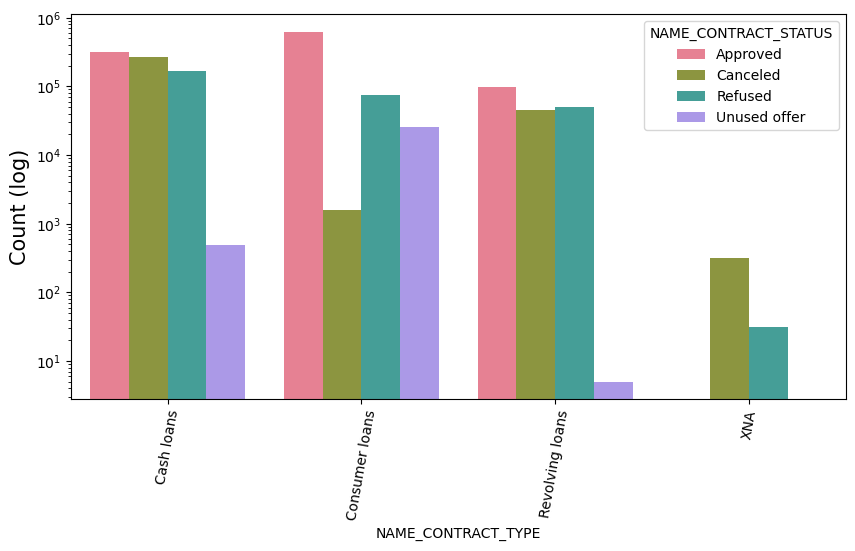

In [138]:
univar_analysis2(prev_appf, 'NAME_CONTRACT_TYPE')

- Most of the approved loans are Consumer loans, followed by Cash loans.
- Most cancelled loans are Cash loans, whereas almost no Consumer loans were cancelled.

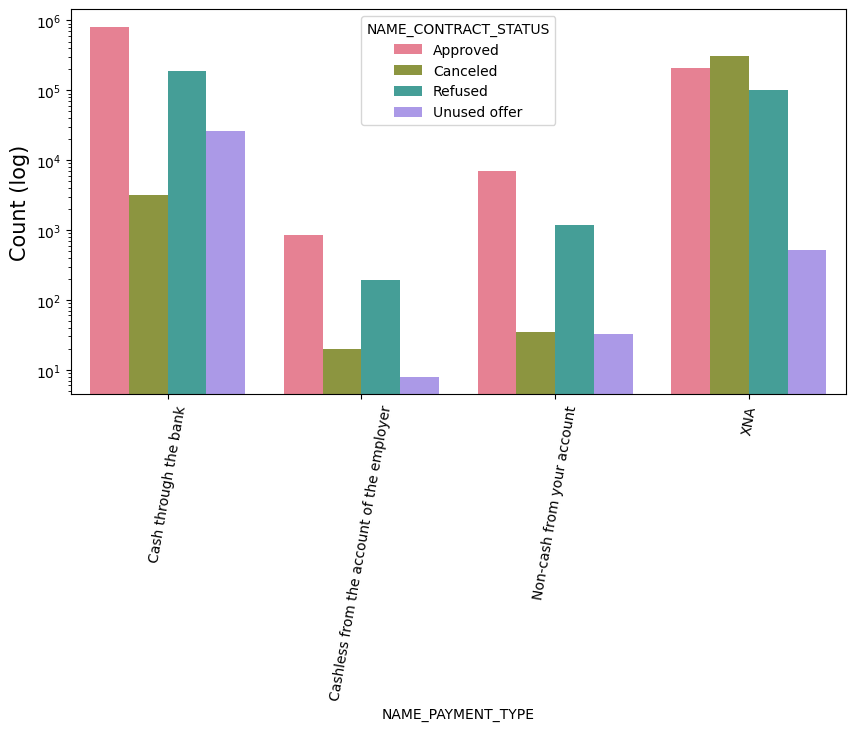

In [139]:
univar_analysis2(prev_appf, 'NAME_PAYMENT_TYPE')

- Most approved loans were of payment type cash through the bank and least was cashless from the employer account.

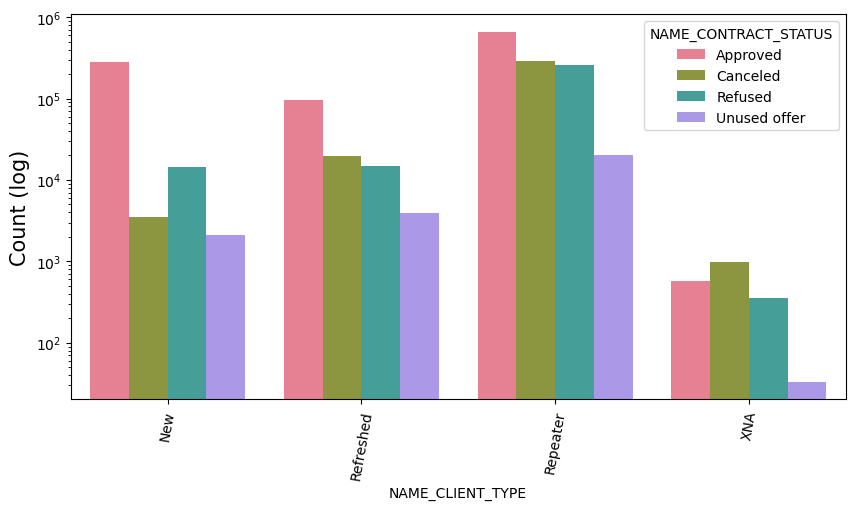

In [140]:
univar_analysis2(prev_appf, 'NAME_CLIENT_TYPE')

- Most of the clients were repeters who got their loans approved and least approved loans were for the refreshed clients.

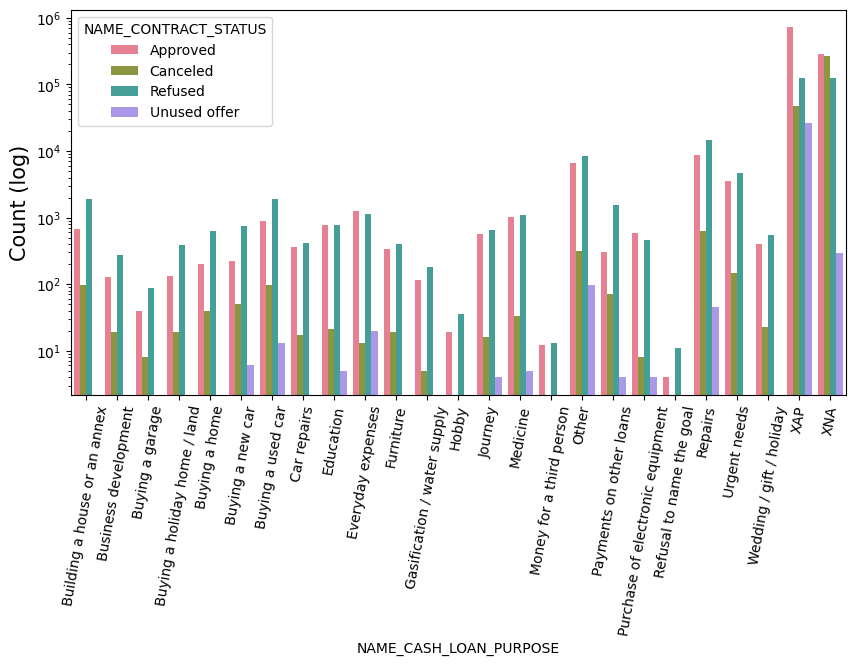

In [141]:
univar_analysis2(prev_appf, 'NAME_CASH_LOAN_PURPOSE')

- Most of the loan purpose was unknown(XAP, XNA)
- Out of the known, the most observed loan purpose was for Repairs which also had the highest number of refusals.
- The least approved loans are for not mentioning the goal of loan.

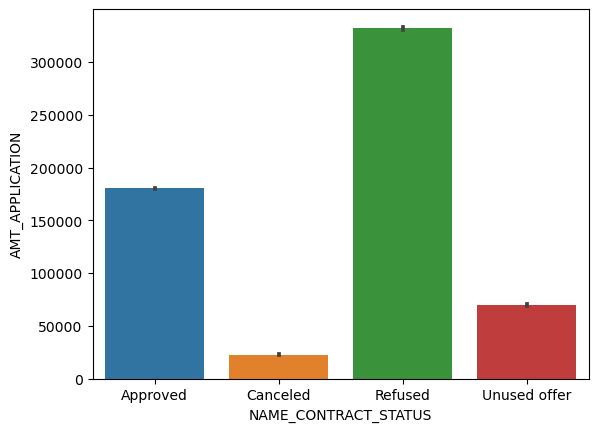

In [142]:
sns.barplot(prev_appf, x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION')
plt.show()

- Applied loan amount upto 1.8L were approved and those more than 3L were refused.

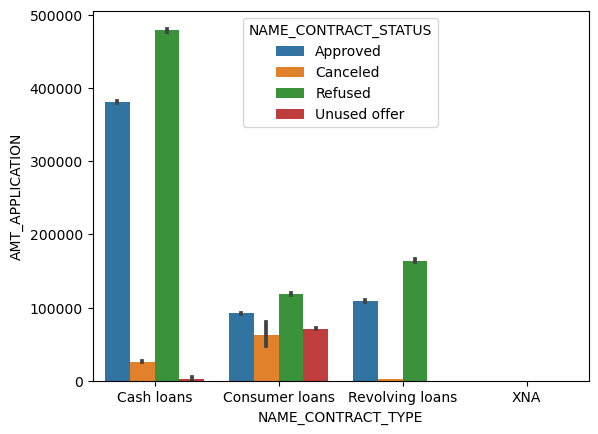

In [143]:
sns.barplot(prev_appf, x='NAME_CONTRACT_TYPE', y='AMT_APPLICATION', hue= 'NAME_CONTRACT_STATUS')
plt.show()

- Most loan application were for cash loans out of which loans above 3.8L were refused.

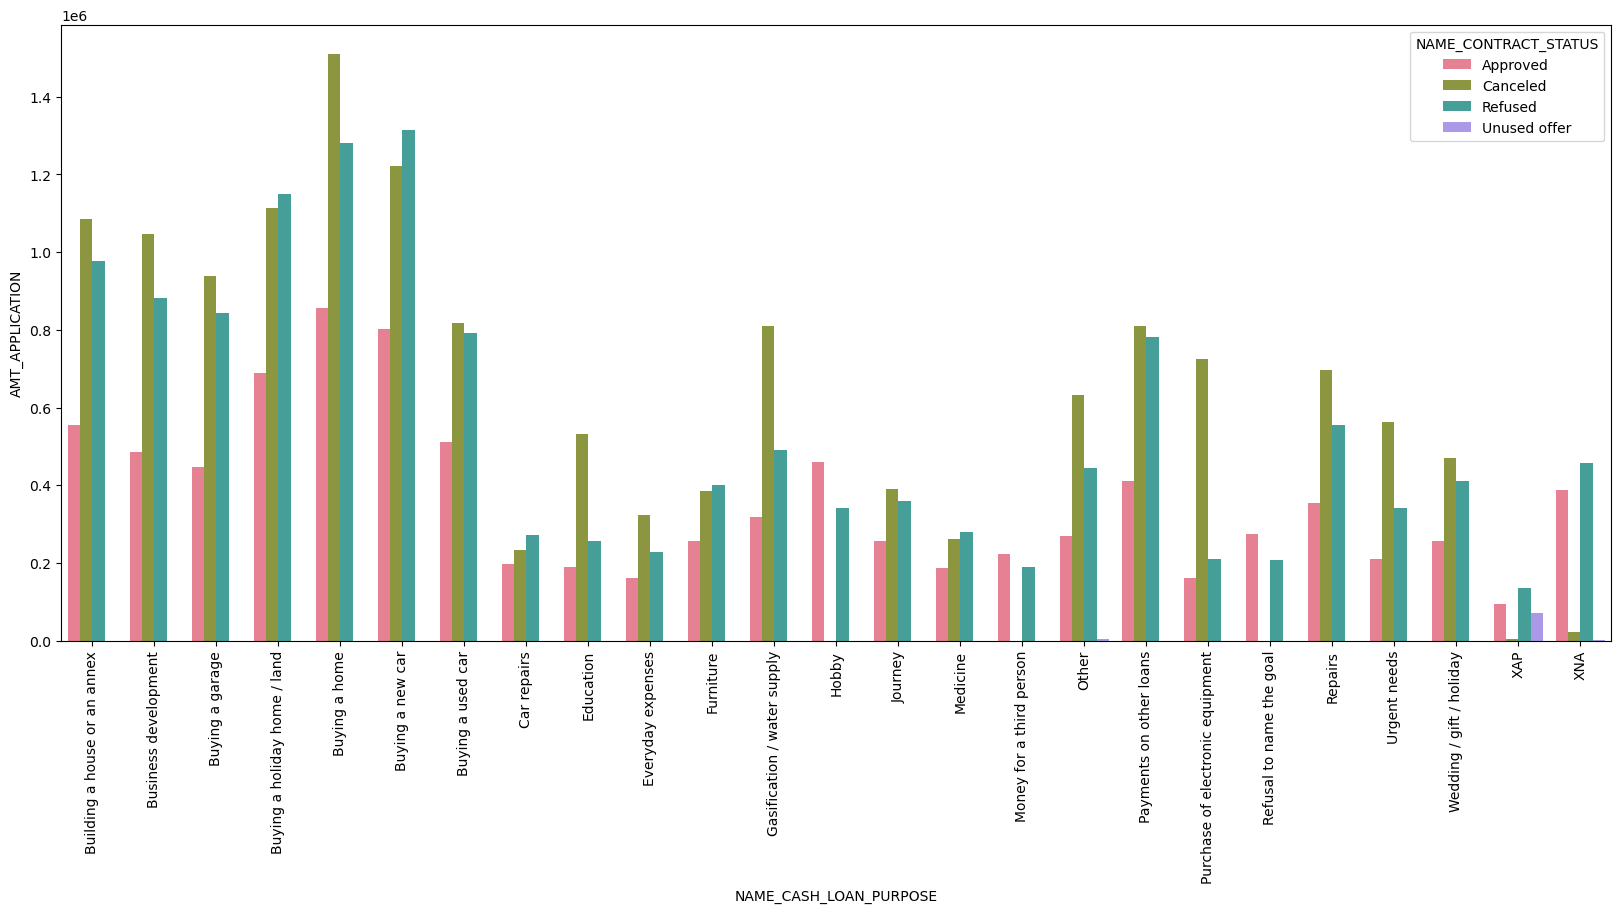

In [144]:
plt.figure(figsize=(20,8))
ax= sns.barplot(prev_appf, y= 'AMT_APPLICATION', x= 'NAME_CASH_LOAN_PURPOSE', hue= 'NAME_CONTRACT_STATUS', palette='husl', ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

- Most loans applied above 8L were either refused or cancelled.

# Merging Datasets for Analysis

In [145]:
merged_df = pd.merge(app_dataf, prev_appf, how='inner', on='SK_ID_CURR')
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1           Cash loans           M               Y   
1      100003       0           Cash loans           F               N   
2      100003       0           Cash loans           F               N   
3      100003       0           Cash loans           F               N   
4      100004       0      Revolving loans           M               Y   

  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0            0          202500.0      406597.5        24700.5   
1            0          270000.0     1293502.5        35698.5   
2            0          270000.0     1293502.5        35698.5   
3            0          270000.0     1293502.5        35698.5   
4            0           67500.0      135000.0         6750.0   

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0           351000.0   Unaccompanied          Working   
1          1129500.0          Family    State servant   
2          1129500.0          Family    State servant   
3          1129500.0          Family    State servant   
4           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_CONT_MOBILE OCCUPATION_TYPE  \
0             2120          1              1                1        Laborers   
1              291          1              1                1      Core staff   
2              291          1              1                1      Core staff   
3              291          1              1                1      Core staff   
4             2531          1              1                1        Laborers   

  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0             1.0                    2                           2   
1             2.0                    1                           1   
2             2.0                    1                           1   
3             2.0                    1                           1   
4             1.0                    2                           2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0              

In [146]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS

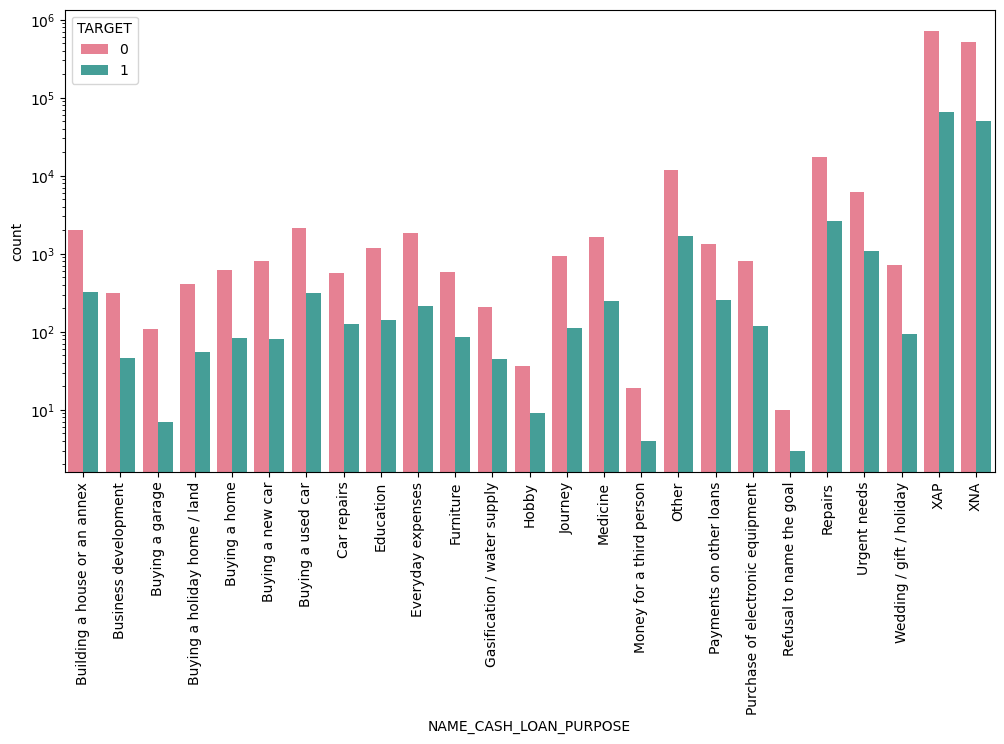

In [147]:
plt.figure(figsize=(12,6))
ax= sns.countplot(merged_df,x= 'NAME_CASH_LOAN_PURPOSE',hue = 'TARGET', palette= 'husl')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.yscale('log')
plt.show()

- The loan applications for Repairs have most default rates among the known loan purposes.
- Loan purpose of Buying a garage has signficantly lower defaulting rate compared to that of repaying rate.

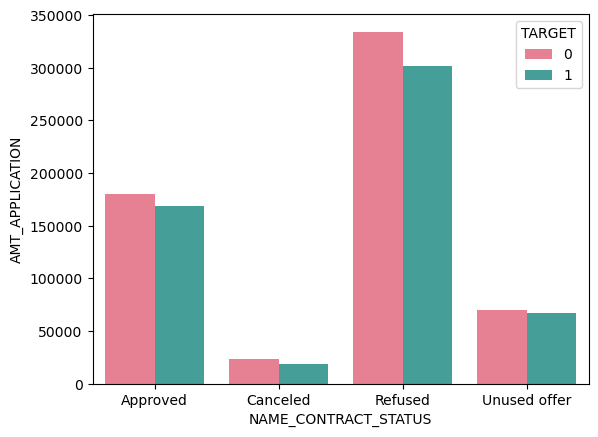

In [148]:

sns.barplot(merged_df, x='NAME_CONTRACT_STATUS', y ='AMT_APPLICATION', hue='TARGET', palette='husl', ci=None)
plt.show()

- Loan applications above 1.8L were mostly refused, however refused clients were observed to be non-defaulters for application amount up to 3.4L. Although the default rate for refused clients are also high for amount up to 3L. 

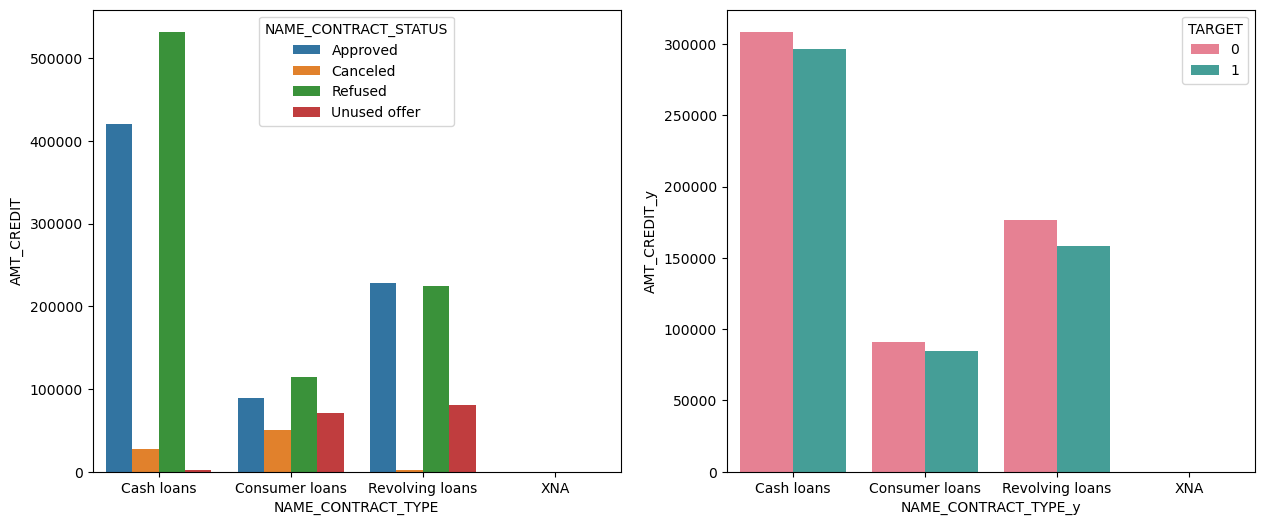

In [149]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(prev_appf, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', hue= 'NAME_CONTRACT_STATUS', ci=None)
plt.subplot(1,2,2)
sns.barplot(merged_df, x='NAME_CONTRACT_TYPE_y', y ='AMT_CREDIT_y', hue='TARGET', palette='husl', ci=None)
plt.show()

- Cash Loans for credit ~ 4.1L is being approved however clients are only returning credit amount upto 3L.   

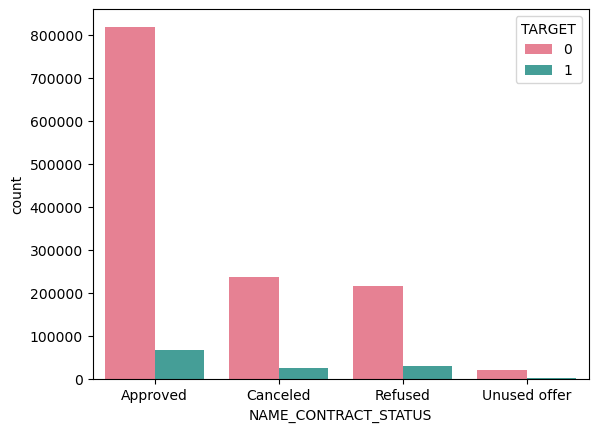

In [150]:
sns.countplot(merged_df, x='NAME_CONTRACT_STATUS', hue='TARGET', palette='husl')
plt.show()

In [151]:
contract_data= merged_df.groupby('NAME_CONTRACT_STATUS')['TARGET']
status_df= pd.concat([contract_data.value_counts(), round(contract_data.value_counts(normalize=True)*100,2)], axis=1, keys=('count', 'percent'))
status_df

count  percent
NAME_CONTRACT_STATUS TARGET                 
Approved             0       818856    92.41
                     1        67243     7.59
Canceled             0       235641    90.83
                     1        23800     9.17
Refused              0       215952    88.00
                     1        29438    12.00
Unused offer         0        20892    91.75
                     1         1879     8.25

- Overall almost 90% of the loans were repaid 
- 90% of  the clients, whose loan was cancelled previously, repaid the current loan and same obseravtion can be recorded for  88% of the clients whose loan was refused previously.
- 91.75% of the unused loan status applicants turned out to be non-defaulters.

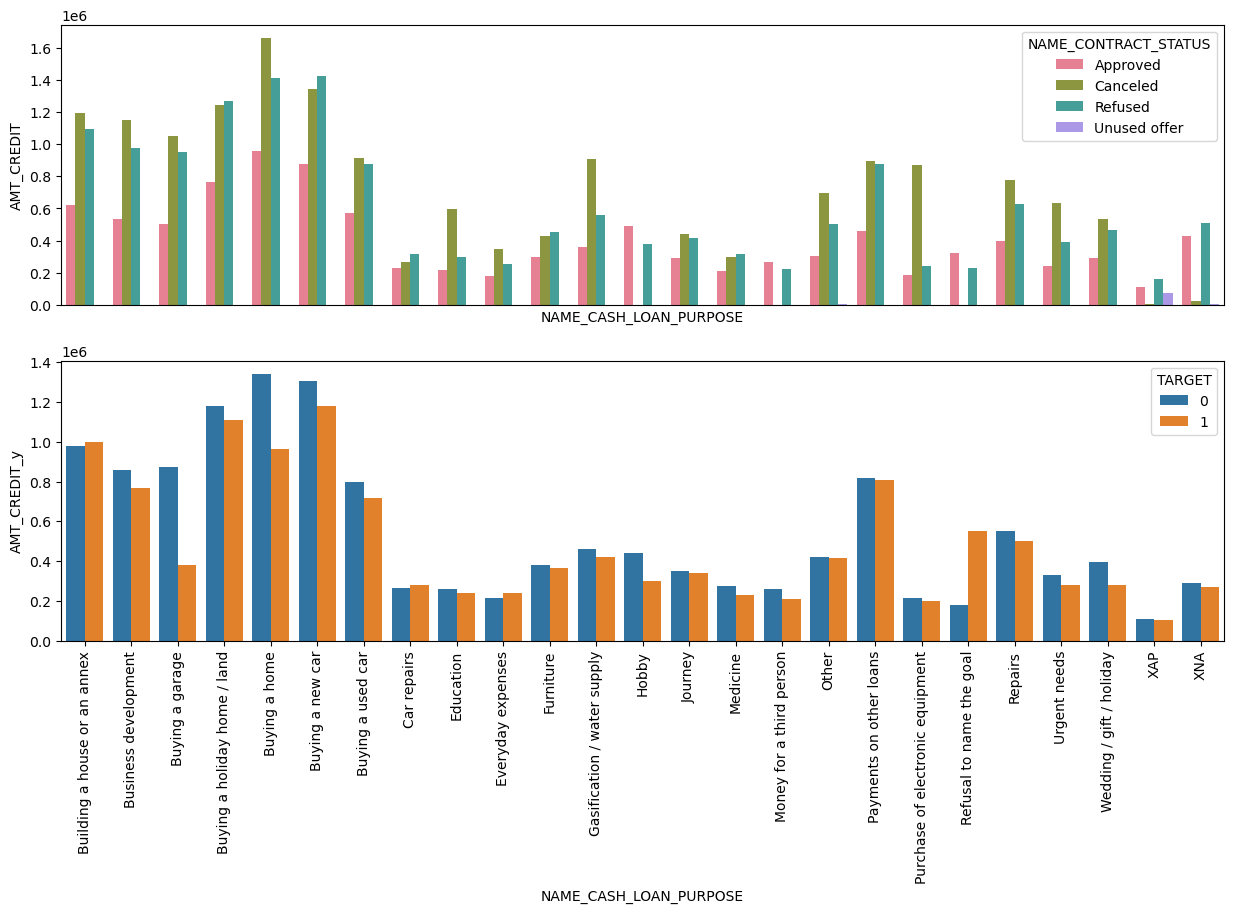

In [152]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
bx= sns.barplot(prev_appf, y= 'AMT_CREDIT', x= 'NAME_CASH_LOAN_PURPOSE', hue= 'NAME_CONTRACT_STATUS', palette='husl', ci=None)
plt.xticks([])
plt.subplot(2,1,2)
ax=sns.barplot(merged_df, x='NAME_CASH_LOAN_PURPOSE', y ='AMT_CREDIT_y', hue='TARGET',  ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

- Maximum credit amount (~13L) was given for the purpose of Buying a home.
- Clients who got credit of ~11L for buying a new car were reported to be most defaulters.
- When credit of more than 20K was given to clients who refused to name the goal of the loan, they turned out to be defaulters.
- Credit amount >8L for Buying a home for credit were cancelled or refused, however such clients are observed to be non-defaulters for credit amount up to ~13L.
- Loan amount for only ~5L was approved for purpose of buying a garage but those clients have high non-defaulting chance for upto 9L of loan.
- Similarly clients were approved loan of ~8L for buying a new car, while majority of them turned out to be non-defaulters for credit of >12L. 

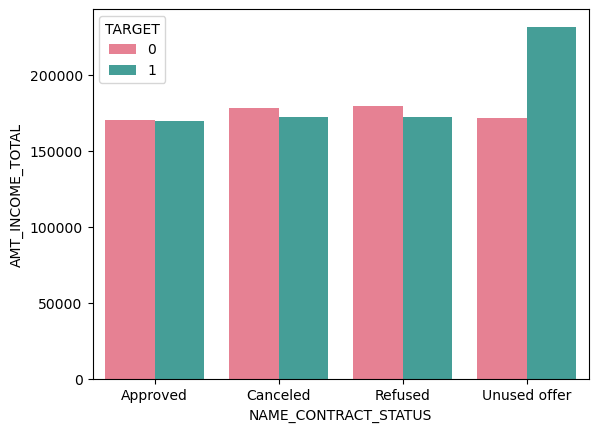

In [153]:
sns.barplot(merged_df, x='NAME_CONTRACT_STATUS', y= 'AMT_INCOME_TOTAL', hue= 'TARGET', palette='husl', ci=None)
plt.show()

- Highest rate of default is observed for clients with income >1.7L who didn't use the loan offer.

# CONCLUSIONS:

Contributing factors to Defaults:
--

- Male applicants are more likely to default compared to females.
- Clients not owning realty have more chances to default.
- People with higher number of children and family members are more likely to default.
- Clients with lower secondary and secondary education.
- People living in rented apartments and those living with parents.
- Applicants on maternity leaves or unemployed are more likely to default.
- Low skilled labourers, waiters/barman, cooking staff, cleaning staff and security have higher chances of defaulting.
- Orgainzations like transport: type 3, industry: type 1, 8, 13, construction, restaurants, cleaning, realtors, self-employed, trade type 3 have high chances of defaulting
- Clients in age group og 20-35 are highly defaulting
- If the employement yesrs is less than 5 there are highest chances of default
- If the income range of client is between 18-20L there are high chances of default
- Credit amount more than 30L results in higher rate of default
- Clients with income >10L are mostly defaulters 
- Clients with an academic degree mostly turn out to be defaulters when income is ~2.4L and credit amount is >7L
- If credit is >6L most of the clients with employment of 40-45Y will turn out to be defaulters
- Clients earning 12-14L may turn out to be defaulters if credit goes beyond 9L
- Applications of amount above 2.8L which were previously refused has highest rate of defaulting.
- Clients who took loan for repairs, urgent needs and other reasons are highly likely to default
- When credit of ~11L is given for buying a used car, most defaulters are observed, followed by those who took similar loan for buying a holiday home/land.
- Highest rate of default is observed for clients with income >1.7L who didn't use the loan offer.

Target Clients:
--
- Females clients
- Clients with Less or no children and 1 to 4 family members
- Businessman, Students
- Clients with academic degree or higher education
- Married or widow clients
- Clients with House/apartment
- Accountants, Core staff, HR staff, IT staff
- Clients with region rating 1
- Clients working in industry type 12, trade type 4 and 5
- Older clients (>55 years) and those with employment of 35-50 years. 
- Clients with income < 10L.
- Loan applicants for buying a home, buying a garage, hobby.

Strategies to mitigate default risk:
--

- Credit loan below 30L
- Clients with lower secondary and incomplete higher level of education can be given loan at higher interest rate
- There are lots of clients of age 20-45 years and those with employement of 0-15 years, however they are the ones with high default rate so their interest rate could be increased to avoid risk of loss.
- There is higher risk of defaulting when loan is taken for unknown purposes so in such cases the interest can be increased.
- Cash loans above 3L should be approved with a higher interest rate since there is high chances of defaulting.
- 90% of the cancelled loan and 88% of the refused loan applicants turned out to be non-defaulters so steps should be taken to allow such loans.
- Similarly, 92% of the unused offers were clients without default so the bank should find out the reasons behind that and target such clients.